# INFO 3401
## Problem Set #3
Jason Kibozi-Yocka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Download the data in the Data/Financial Data folder on Canvas. Open the file and take a peek at the data dictionary. What do you think this data is used for?

In [2]:
print("Q1 Answer: This is used to assess the likelihood that a borrower will pay back their loans.")

Q1 Answer: This is used to assess the likelihood that a borrower will pay back their loans.


2. Create a function called loadAndCleanData that takes as an argument a filename and returns a Pandas dataframe. That dataframe should contain the data from the CSV file cleaned such that any cells missing data, containing a NaN value or the string "NA" are filled with 0s (this is a technique called zero-filling that we will talk about shortly!)

In [3]:
def loadAndCleanData(myFile):
    myDF = pd.read_csv(myFile)
    myDF.fillna(value=0,inplace=True)
    return myDF

3. Add a line to your Python file that uses the function to load in the creditData.csv file from Canvas when the Python script is run.

In [4]:
myDataframe = loadAndCleanData("creditData.csv")

In [5]:
myDataframe.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,64,0,0.073539,11000.0,9,0,1,0,0.0
1,0,0.0,67,0,0.540984,3720.0,2,0,1,0,0.0
2,0,0.0,58,0,0.316145,4886.0,9,0,1,0,1.0
3,0,0.0,61,0,0.222660,3300.0,14,0,1,0,0.0
4,0,0.0,59,0,0.218854,19167.0,13,0,2,0,0.0


4. Now that you've got your data loading, you can generate probability density functions for each feature. These PDFs will tell you the probability of a given feature occurring based on our data. You can use Kernel Density Estimation (KDE) to do this. Write a function called computePDF that takes as arguments a target feature and a dataset and generates a KDE plot for each feature in your data (hint: check out the plot.kde function here (Links to an external site.)). You will need to import matplotlib.pyplot as plt and use plt.show() to make the graphs appear. Call that feature on each column of your dataset when you run your script.

In [6]:
def computePDF(myFeature,myDataset):
    myPlot = myDataset[myFeature].plot.kde()
    return myPlot

In [7]:
'''
for feature in myDataframe.columns.values:
    computePDF(feature,myDataframe)
'''

'\nfor feature in myDataframe.columns.values:\n    computePDF(feature,myDataframe)\n'

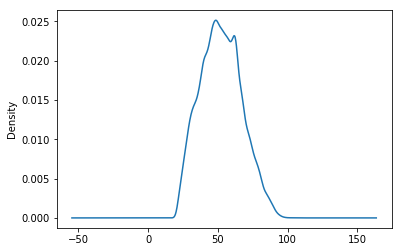

In [8]:
# Sample
computePDF('age',myDataframe)

5. Given the skews that you see in your data, you might want to step back and take a look at what's actually in your data. You can look at the distribution of values in the columns. This will help you understand what data you have. To do this, write a function called viewDistribution that takes in the name of a column and a dataframe and shows a histogram of values in that column (hint: check out the hist function here (Links to an external site.)).  Comment out your computePDF function call and instead use viewDistribution to look at the distribution of each column in your dataset when the Python script is run. This should come after you call the loadAndCleanData function. Notice anything strange about some of these histograms?

In [9]:
def viewDistribution(myCol,myDataset):
    myHistPlot = myDataset.hist(column=myCol)
    plt.show(myHistPlot)

In [10]:
'''
for feature in myDataframe.columns.values:
    viewDistribution(feature,myDataframe)
'''

'\nfor feature in myDataframe.columns.values:\n    viewDistribution(feature,myDataframe)\n'

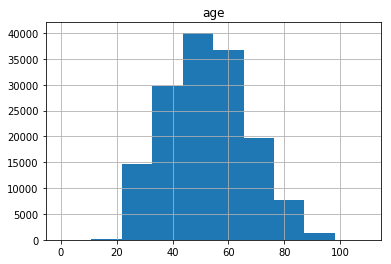

In [11]:
# Sample
viewDistribution('age',myDataframe)

6. When your data distributions are radically skewed, you can use a log scale to help reveal data that is otherwise too sparse to see. Write a new version of the viewDistribution function called viewLogDistribution to show the log distribution of each column. Add this function call after your viewDistribution call to view the regular and log distributions of each feature. 

In [12]:
def viewLogDistribution(myCol,myDataset):
    myHistPlot = myDataset.hist(column=myCol, log=True)
    plt.show(myHistPlot)

In [13]:
'''
for feature in myDataframe.columns.values:
    viewLogDistribution(feature,myDataframe)
'''

'\nfor feature in myDataframe.columns.values:\n    viewLogDistribution(feature,myDataframe)\n'

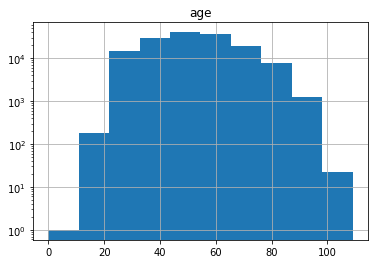

In [14]:
viewLogDistribution('age',myDataframe)

7. Use the two distributions to identify three bins per column that divide your data into roughly equal numbers. What are those bins? Note you do not need bins for "SeriousDlqin2yrs" as that is the feature you are modeling (it is your dependent variable).

In [15]:
def equalBins(myCol,myDataset):
    myBins = pd.qcut(myDataset[myCol], q=3, duplicates='drop', retbins=False).unique()
    return myBins

In [16]:
'''
for feature in myDataframe.columns.values:
    if feature != 'SeriousDlqin2yrs':
        equalBins(feature,myDataframe)
'''

"\nfor feature in myDataframe.columns.values:\n    if feature != 'SeriousDlqin2yrs':\n        equalBins(feature,myDataframe)\n"

In [17]:
# Sample
equalBins('age',myDataframe)

[(59.0, 109.0], (45.0, 59.0], (-0.001, 45.0]]
Categories (3, interval[float64]): [(-0.001, 45.0] < (45.0, 59.0] < (59.0, 109.0]]

8. Write a function called computeDefaultRisk that takes four arguments---a column name, a bin (as an array [start,end]), a target feature, and a dataframe---and returns the probability that someone will be at least 90 days delinquent on their account (in other words, "SeriousDlqin2yrs" = 1). Keep in mind that this probability is conditional, that means you'll want to use the equation for conditional probabilities to compute it. In plain English, you should compute the probability that a loan will become seriously delinquent given your target feature falls into the bin range. For example, if I'm looking at ages between 0 and 40, I want to compute the probability that a loan will go into serious delinquency given the applicant is between 0 and 40.

In [18]:
def bintoArray(myNum,myCol,myDataset):
    myBin = (equalBins(myCol,myDataset)[myNum].left,equalBins(myCol,myDataset)[myNum].right)
    return myBin

In [19]:
print('Left',bintoArray(2,'age',myDataframe))
print('Middle',bintoArray(1,'age',myDataframe))
print('Right',bintoArray(0,'age',myDataframe))

Left (-0.001, 45.0)
Middle (45.0, 59.0)
Right (59.0, 109.0)


In [20]:
def computeDefaultRisk(myCol,binLoc,myFeature,myDataset):
    
    if binLoc == 'right':
        myNum = 0
    if binLoc == 'middle':
        myNum = 1
    if binLoc == 'left':
        myNum = 2
    
    count = 0
    count2 = 0
    try:
        myBin = bintoArray(myNum,myFeature,myDataset)
    except:
        return 0.0
    
    for i, datapoint in myDataset.iterrows():
        if datapoint[myFeature] >= myBin[0] and datapoint[myFeature] < myBin[1]:
            count += 1
            if datapoint[myCol] == 1:
                count2 += 1
                
    
    totalSize = len(myDataset)
    prob = count / totalSize
    prob2 = count2 / totalSize
    finProb = prob2 / prob
    
    return finProb

In [21]:
# Sample
computeDefaultRisk('SeriousDlqin2yrs','left','age',myDataframe)

0.09905236073049808

In [22]:
# Sample
computeDefaultRisk('SeriousDlqin2yrs','middle','age',myDataframe)

0.07162196881361292

In [23]:
# Sample
computeDefaultRisk('SeriousDlqin2yrs','right','age',myDataframe)

0.032308706101248155

9. Print out the risk of default for each of the feature bins in your dataset. Note it's helpful to label these with the feature and bins such that you can better understand your output. 

In [24]:
myRisks = {}

for feature in myDataframe.columns.values:
    if feature != 'SeriousDlqin2yrs':
        print(feature)
        featDict = {}
        featDict['left'] = computeDefaultRisk('SeriousDlqin2yrs','left',feature,myDataframe)
        featDict['middle'] = computeDefaultRisk('SeriousDlqin2yrs','middle',feature,myDataframe)
        featDict['right'] = computeDefaultRisk('SeriousDlqin2yrs','right',feature,myDataframe)
        myRisks[feature] = featDict

RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [25]:
myRisks

{'RevolvingUtilizationOfUnsecuredLines': {'left': 0.15187214977198177,
  'middle': 0.031129415998560492,
  'right': 0.017524906973952706},
 'age': {'left': 0.09905236073049808,
  'middle': 0.07162196881361292,
  'right': 0.032308706101248155},
 'NumberOfTime30-59DaysPastDueNotWorse': {'left': 0.0,
  'middle': 0.0,
  'right': 0.06600283165037131},
 'DebtRatio': {'left': 0.07660612849027923,
  'middle': 0.0635091926458833,
  'right': 0.060404699477613434},
 'MonthlyIncome': {'left': 0.06911264515869342,
  'middle': 0.08056052474657126,
  'right': 0.050777968881244744},
 'NumberOfOpenCreditLinesAndLoans': {'left': 0.06332529021716414,
  'middle': 0.08418115475423911,
  'right': 0.0545730266267528},
 'NumberOfTimes90DaysLate': {'left': 0.0,
  'middle': 0.0,
  'right': 0.06600283165037131},
 'NumberRealEstateLoansOrLines': {'left': 0.0,
  'middle': 0.05707219835626952,
  'right': 0.08314942692389833},
 'NumberOfTime60-89DaysPastDueNotWorse': {'left': 0.0,
  'middle': 0.0,
  'right': 0.06600

10. In your main file, use your loadAndCleanData function to load in newLoans.csv.

In [26]:
myLoanData = loadAndCleanData("newLoans.csv")
myLoanData.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.0,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,0.0,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


11. Use your conditional probabilities to predict the probability of default for each row in your CSV file. To do this, write a function called predictDefaultRisk that takes a row from your dataset as a parameter and returns the risk of default based on that data and the probabilities you computed from creditData.csv (hint: you might want to have predictDefaultRisk take a second parameter representing the risk of default for various data features computed from creditData.csv). You will want to compute the risk of default using a weighted sum with the following weights:

| Feature | Weight |
| ------- | ------ |
| Age | 2.5% |
| Number of Dependents | 2.5% |
| Monthly Income | 10% |
| Debt Ratio | 10% |
| Revolving Utilization | 10% |
| Number of Credit Lines & Loans | 10% |
| Number of Real Estate Loans or Lines | 10% |
| Number of Times 30-59 Days Late | 15% |
| Number of Times 60-89 Days Late | 15% |
| Number of Times 90 Days Late | 15% |

In [27]:
myWeights = {'age':0.025,'NumberOfDependents':0.025,'MonthlyIncome':0.1,'DebtRatio':0.1,
             'RevolvingUtilizationOfUnsecuredLines':0.1,'NumberOfOpenCreditLinesAndLoans':0.1,
             'NumberRealEstateLoansOrLines':0.1,'NumberOfTime30-59DaysPastDueNotWorse':0.15,
             'NumberOfTime60-89DaysPastDueNotWorse':0.15,'NumberOfTimes90DaysLate':0.15}

In [28]:
myBinDict = {}

for feature in myDataframe.columns:
    if feature != 'SeriousDlqin2yrs':
        mySideDict = {}
        try:
            mySideDict['right'] = equalBins(feature,myDataframe)[0]
        except:
            mySideDict['right'] = None
        try:
            mySideDict['middle'] = equalBins(feature,myDataframe)[1]
        except:
            mySideDict['middle'] = None
        try:
            mySideDict['left'] = equalBins(feature,myDataframe)[2]
        except:
            mySideDict['left'] = None
        myBinDict[feature] = mySideDict

myBinDict

{'RevolvingUtilizationOfUnsecuredLines': {'right': Interval(-0.001, 0.0544, closed='right'),
  'middle': Interval(0.0544, 0.38, closed='right'),
  'left': Interval(0.38, 50708.0, closed='right')},
 'age': {'right': Interval(59.0, 109.0, closed='right'),
  'middle': Interval(45.0, 59.0, closed='right'),
  'left': Interval(-0.001, 45.0, closed='right')},
 'NumberOfTime30-59DaysPastDueNotWorse': {'right': Interval(-0.001, 98.0, closed='right'),
  'middle': None,
  'left': None},
 'DebtRatio': {'right': Interval(-0.001, 0.238, closed='right'),
  'middle': Interval(0.238, 0.57, closed='right'),
  'left': Interval(0.57, 329664.0, closed='right')},
 'MonthlyIncome': {'right': Interval(6161.0, 3008750.0, closed='right'),
  'middle': Interval(2700.0, 6161.0, closed='right'),
  'left': Interval(-0.001, 2700.0, closed='right')},
 'NumberOfOpenCreditLinesAndLoans': {'right': Interval(6.0, 10.0, closed='right'),
  'middle': Interval(-0.001, 6.0, closed='right'),
  'left': Interval(10.0, 58.0, close

In [46]:
def predictDefaultRisk(myRow,defaults,weights):
    probTable = []
    for feature in myRow.index:
        if feature != 'SeriousDlqin2yrs':
            # check which bin its in
            mybin = ''
            if myRow[feature] in myBinDict[feature]['right']:
                mybin = 'right'
            elif myRow[feature] in myBinDict[feature]['middle']:
                mybin = 'middle'
            elif myRow[feature] in myBinDict[feature]['left']:
                mybin = 'left'
            # get default prob and muliply it by weight
            myNum = defaults[feature][mybin] * weights[feature]
            # add to my probability sum table
            probTable.append(myNum)
    return sum(probTable)

In [30]:
'''
def predictDefaultRisk(myRow,defaults,weights):
    probTable = []
    for feature in myRow.index:
        if feature != 'SeriousDlqin2yrs':
            # check which bin its in
            mybin = ''
            if myRow[feature] in equalBins(feature,myDataframe)[0]:
                mybin = 'right'
            elif myRow[feature] in equalBins(feature,myDataframe)[1]:
                mybin = 'middle'
            elif myRow[feature] in equalBins(feature,myDataframe)[2]:
                mybin = 'left'
            # get default prob and muliply it by weight
            myNum = defaults[feature][mybin] * weights[feature]
            # add to my probability sum table
            probTable.append(myNum)
    return sum(probTable)
'''

"\ndef predictDefaultRisk(myRow,defaults,weights):\n    probTable = []\n    for feature in myRow.index:\n        if feature != 'SeriousDlqin2yrs':\n            # check which bin its in\n            mybin = ''\n            if myRow[feature] in equalBins(feature,myDataframe)[0]:\n                mybin = 'right'\n            elif myRow[feature] in equalBins(feature,myDataframe)[1]:\n                mybin = 'middle'\n            elif myRow[feature] in equalBins(feature,myDataframe)[2]:\n                mybin = 'left'\n            # get default prob and muliply it by weight\n            myNum = defaults[feature][mybin] * weights[feature]\n            # add to my probability sum table\n            probTable.append(myNum)\n    return sum(probTable)\n"

12. Store the result of this function in the SeriousDlqin2yrs column.

In [31]:
for row in range(len(myLoanData.index)):
    val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
    myLoanData['SeriousDlqin2yrs'][row] = val
    print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Done: 0
Done: 1
Done: 2
Done: 3
Done: 4
Done: 5
Done: 6
Done: 7
Done: 8
Done: 9
Done: 10
Done: 11
Done: 12
Done: 13
Done: 14
Done: 15
Done: 16
Done: 17
Done: 18
Done: 19
Done: 20
Done: 21
Done: 22
Done: 23
Done: 24
Done: 25
Done: 26
Done: 27
Done: 28
Done: 29
Done: 30
Done: 31
Done: 32
Done: 33
Done: 34
Done: 35
Done: 36
Done: 37
Done: 38
Done: 39
Done: 40
Done: 41
Done: 42
Done: 43
Done: 44
Done: 45
Done: 46
Done: 47
Done: 48
Done: 49
Done: 50
Done: 51
Done: 52
Done: 53
Done: 54
Done: 55
Done: 56
Done: 57
Done: 58
Done: 59
Done: 60
Done: 61
Done: 62
Done: 63
Done: 64
Done: 65
Done: 66
Done: 67
Done: 68
Done: 69
Done: 70
Done: 71
Done: 72
Done: 73
Done: 74
Done: 75
Done: 76
Done: 77
Done: 78
Done: 79
Done: 80
Done: 81
Done: 82
Done: 83
Done: 84
Done: 85
Done: 86
Done: 87
Done: 88
Done: 89
Done: 90
Done: 91
Done: 92
Done: 93
Done: 94
Done: 95
Done: 96
Done: 97
Done: 98
Done: 99
Done: 100
Done: 101
Done: 102
Done: 103
Done: 104
Done: 105
Done: 106
Done: 107
Done: 108
Done: 109
Done: 110


Done: 853
Done: 854
Done: 855
Done: 856
Done: 857
Done: 858
Done: 859
Done: 860
Done: 861
Done: 862
Done: 863
Done: 864
Done: 865
Done: 866
Done: 867
Done: 868
Done: 869
Done: 870
Done: 871
Done: 872
Done: 873
Done: 874
Done: 875
Done: 876
Done: 877
Done: 878
Done: 879
Done: 880
Done: 881
Done: 882
Done: 883
Done: 884
Done: 885
Done: 886
Done: 887
Done: 888
Done: 889
Done: 890
Done: 891
Done: 892
Done: 893
Done: 894
Done: 895
Done: 896
Done: 897
Done: 898
Done: 899
Done: 900
Done: 901
Done: 902
Done: 903
Done: 904
Done: 905
Done: 906
Done: 907
Done: 908
Done: 909
Done: 910
Done: 911
Done: 912
Done: 913
Done: 914
Done: 915
Done: 916
Done: 917
Done: 918
Done: 919
Done: 920
Done: 921
Done: 922
Done: 923
Done: 924
Done: 925
Done: 926
Done: 927
Done: 928
Done: 929
Done: 930
Done: 931
Done: 932
Done: 933
Done: 934
Done: 935
Done: 936
Done: 937
Done: 938
Done: 939
Done: 940
Done: 941
Done: 942
Done: 943
Done: 944
Done: 945
Done: 946
Done: 947
Done: 948
Done: 949
Done: 950
Done: 951
Done: 952


Done: 1639
Done: 1640
Done: 1641
Done: 1642
Done: 1643
Done: 1644
Done: 1645
Done: 1646
Done: 1647
Done: 1648
Done: 1649
Done: 1650
Done: 1651
Done: 1652
Done: 1653
Done: 1654
Done: 1655
Done: 1656
Done: 1657
Done: 1658
Done: 1659
Done: 1660
Done: 1661
Done: 1662
Done: 1663
Done: 1664
Done: 1665
Done: 1666
Done: 1667
Done: 1668
Done: 1669
Done: 1670
Done: 1671
Done: 1672
Done: 1673
Done: 1674
Done: 1675
Done: 1676
Done: 1677
Done: 1678
Done: 1679
Done: 1680
Done: 1681
Done: 1682
Done: 1683
Done: 1684
Done: 1685
Done: 1686
Done: 1687
Done: 1688
Done: 1689
Done: 1690
Done: 1691
Done: 1692
Done: 1693
Done: 1694
Done: 1695
Done: 1696
Done: 1697
Done: 1698
Done: 1699
Done: 1700
Done: 1701
Done: 1702
Done: 1703
Done: 1704
Done: 1705
Done: 1706
Done: 1707
Done: 1708
Done: 1709
Done: 1710
Done: 1711
Done: 1712
Done: 1713
Done: 1714
Done: 1715
Done: 1716
Done: 1717
Done: 1718
Done: 1719
Done: 1720
Done: 1721
Done: 1722
Done: 1723
Done: 1724
Done: 1725
Done: 1726
Done: 1727
Done: 1728
Done: 1729

Done: 2405
Done: 2406
Done: 2407
Done: 2408
Done: 2409
Done: 2410
Done: 2411
Done: 2412
Done: 2413
Done: 2414
Done: 2415
Done: 2416
Done: 2417
Done: 2418
Done: 2419
Done: 2420
Done: 2421
Done: 2422
Done: 2423
Done: 2424
Done: 2425
Done: 2426
Done: 2427
Done: 2428
Done: 2429
Done: 2430
Done: 2431
Done: 2432
Done: 2433
Done: 2434
Done: 2435
Done: 2436
Done: 2437
Done: 2438
Done: 2439
Done: 2440
Done: 2441
Done: 2442
Done: 2443
Done: 2444
Done: 2445
Done: 2446
Done: 2447
Done: 2448
Done: 2449
Done: 2450
Done: 2451
Done: 2452
Done: 2453
Done: 2454
Done: 2455
Done: 2456
Done: 2457
Done: 2458
Done: 2459
Done: 2460
Done: 2461
Done: 2462
Done: 2463
Done: 2464
Done: 2465
Done: 2466
Done: 2467
Done: 2468
Done: 2469
Done: 2470
Done: 2471
Done: 2472
Done: 2473
Done: 2474
Done: 2475
Done: 2476
Done: 2477
Done: 2478
Done: 2479
Done: 2480
Done: 2481
Done: 2482
Done: 2483
Done: 2484
Done: 2485
Done: 2486
Done: 2487
Done: 2488
Done: 2489
Done: 2490
Done: 2491
Done: 2492
Done: 2493
Done: 2494
Done: 2495

Done: 3165
Done: 3166
Done: 3167
Done: 3168
Done: 3169
Done: 3170
Done: 3171
Done: 3172
Done: 3173
Done: 3174
Done: 3175
Done: 3176
Done: 3177
Done: 3178
Done: 3179
Done: 3180
Done: 3181
Done: 3182
Done: 3183
Done: 3184
Done: 3185
Done: 3186
Done: 3187
Done: 3188
Done: 3189
Done: 3190
Done: 3191
Done: 3192
Done: 3193
Done: 3194
Done: 3195
Done: 3196
Done: 3197
Done: 3198
Done: 3199
Done: 3200
Done: 3201
Done: 3202
Done: 3203
Done: 3204
Done: 3205
Done: 3206
Done: 3207
Done: 3208
Done: 3209
Done: 3210
Done: 3211
Done: 3212
Done: 3213
Done: 3214
Done: 3215
Done: 3216
Done: 3217
Done: 3218
Done: 3219
Done: 3220
Done: 3221
Done: 3222
Done: 3223
Done: 3224
Done: 3225
Done: 3226
Done: 3227
Done: 3228
Done: 3229
Done: 3230
Done: 3231
Done: 3232
Done: 3233
Done: 3234
Done: 3235
Done: 3236
Done: 3237
Done: 3238
Done: 3239
Done: 3240
Done: 3241
Done: 3242
Done: 3243
Done: 3244
Done: 3245
Done: 3246
Done: 3247
Done: 3248
Done: 3249
Done: 3250
Done: 3251
Done: 3252
Done: 3253
Done: 3254
Done: 3255

Done: 3926
Done: 3927
Done: 3928
Done: 3929
Done: 3930
Done: 3931
Done: 3932
Done: 3933
Done: 3934
Done: 3935
Done: 3936
Done: 3937
Done: 3938
Done: 3939
Done: 3940
Done: 3941
Done: 3942
Done: 3943
Done: 3944
Done: 3945
Done: 3946
Done: 3947
Done: 3948
Done: 3949
Done: 3950
Done: 3951
Done: 3952
Done: 3953
Done: 3954
Done: 3955
Done: 3956
Done: 3957
Done: 3958
Done: 3959
Done: 3960
Done: 3961
Done: 3962
Done: 3963
Done: 3964
Done: 3965
Done: 3966
Done: 3967
Done: 3968
Done: 3969
Done: 3970
Done: 3971
Done: 3972
Done: 3973
Done: 3974
Done: 3975
Done: 3976
Done: 3977
Done: 3978
Done: 3979
Done: 3980
Done: 3981
Done: 3982
Done: 3983
Done: 3984
Done: 3985
Done: 3986
Done: 3987
Done: 3988
Done: 3989
Done: 3990
Done: 3991
Done: 3992
Done: 3993
Done: 3994
Done: 3995
Done: 3996
Done: 3997
Done: 3998
Done: 3999
Done: 4000
Done: 4001
Done: 4002
Done: 4003
Done: 4004
Done: 4005
Done: 4006
Done: 4007
Done: 4008
Done: 4009
Done: 4010
Done: 4011
Done: 4012
Done: 4013
Done: 4014
Done: 4015
Done: 4016

Done: 4693
Done: 4694
Done: 4695
Done: 4696
Done: 4697
Done: 4698
Done: 4699
Done: 4700
Done: 4701
Done: 4702
Done: 4703
Done: 4704
Done: 4705
Done: 4706
Done: 4707
Done: 4708
Done: 4709
Done: 4710
Done: 4711
Done: 4712
Done: 4713
Done: 4714
Done: 4715
Done: 4716
Done: 4717
Done: 4718
Done: 4719
Done: 4720
Done: 4721
Done: 4722
Done: 4723
Done: 4724
Done: 4725
Done: 4726
Done: 4727
Done: 4728
Done: 4729
Done: 4730
Done: 4731
Done: 4732
Done: 4733
Done: 4734
Done: 4735
Done: 4736
Done: 4737
Done: 4738
Done: 4739
Done: 4740
Done: 4741
Done: 4742
Done: 4743
Done: 4744
Done: 4745
Done: 4746
Done: 4747
Done: 4748
Done: 4749
Done: 4750
Done: 4751
Done: 4752
Done: 4753
Done: 4754
Done: 4755
Done: 4756
Done: 4757
Done: 4758
Done: 4759
Done: 4760
Done: 4761
Done: 4762
Done: 4763
Done: 4764
Done: 4765
Done: 4766
Done: 4767
Done: 4768
Done: 4769
Done: 4770
Done: 4771
Done: 4772
Done: 4773
Done: 4774
Done: 4775
Done: 4776
Done: 4777
Done: 4778
Done: 4779
Done: 4780
Done: 4781
Done: 4782
Done: 4783

Done: 5469
Done: 5470
Done: 5471
Done: 5472
Done: 5473
Done: 5474
Done: 5475
Done: 5476
Done: 5477
Done: 5478
Done: 5479
Done: 5480
Done: 5481
Done: 5482
Done: 5483
Done: 5484
Done: 5485
Done: 5486
Done: 5487
Done: 5488
Done: 5489
Done: 5490
Done: 5491
Done: 5492
Done: 5493
Done: 5494
Done: 5495
Done: 5496
Done: 5497
Done: 5498
Done: 5499
Done: 5500
Done: 5501
Done: 5502
Done: 5503
Done: 5504
Done: 5505
Done: 5506
Done: 5507
Done: 5508
Done: 5509
Done: 5510
Done: 5511
Done: 5512
Done: 5513
Done: 5514
Done: 5515
Done: 5516
Done: 5517
Done: 5518
Done: 5519
Done: 5520
Done: 5521
Done: 5522
Done: 5523
Done: 5524
Done: 5525
Done: 5526
Done: 5527
Done: 5528
Done: 5529
Done: 5530
Done: 5531
Done: 5532
Done: 5533
Done: 5534
Done: 5535
Done: 5536
Done: 5537
Done: 5538
Done: 5539
Done: 5540
Done: 5541
Done: 5542
Done: 5543
Done: 5544
Done: 5545
Done: 5546
Done: 5547
Done: 5548
Done: 5549
Done: 5550
Done: 5551
Done: 5552
Done: 5553
Done: 5554
Done: 5555
Done: 5556
Done: 5557
Done: 5558
Done: 5559

Done: 6249
Done: 6250
Done: 6251
Done: 6252
Done: 6253
Done: 6254
Done: 6255
Done: 6256
Done: 6257
Done: 6258
Done: 6259
Done: 6260
Done: 6261
Done: 6262
Done: 6263
Done: 6264
Done: 6265
Done: 6266
Done: 6267
Done: 6268
Done: 6269
Done: 6270
Done: 6271
Done: 6272
Done: 6273
Done: 6274
Done: 6275
Done: 6276
Done: 6277
Done: 6278
Done: 6279
Done: 6280
Done: 6281
Done: 6282
Done: 6283
Done: 6284
Done: 6285
Done: 6286
Done: 6287
Done: 6288
Done: 6289
Done: 6290
Done: 6291
Done: 6292
Done: 6293
Done: 6294
Done: 6295
Done: 6296
Done: 6297
Done: 6298
Done: 6299
Done: 6300
Done: 6301
Done: 6302
Done: 6303
Done: 6304
Done: 6305
Done: 6306
Done: 6307
Done: 6308
Done: 6309
Done: 6310
Done: 6311
Done: 6312
Done: 6313
Done: 6314
Done: 6315
Done: 6316
Done: 6317
Done: 6318
Done: 6319
Done: 6320
Done: 6321
Done: 6322
Done: 6323
Done: 6324
Done: 6325
Done: 6326
Done: 6327
Done: 6328
Done: 6329
Done: 6330
Done: 6331
Done: 6332
Done: 6333
Done: 6334
Done: 6335
Done: 6336
Done: 6337
Done: 6338
Done: 6339

Done: 7051
Done: 7052
Done: 7053
Done: 7054
Done: 7055
Done: 7056
Done: 7057
Done: 7058
Done: 7059
Done: 7060
Done: 7061
Done: 7062
Done: 7063
Done: 7064
Done: 7065
Done: 7066
Done: 7067
Done: 7068
Done: 7069
Done: 7070
Done: 7071
Done: 7072
Done: 7073
Done: 7074
Done: 7075
Done: 7076
Done: 7077
Done: 7078
Done: 7079
Done: 7080
Done: 7081
Done: 7082
Done: 7083
Done: 7084
Done: 7085
Done: 7086
Done: 7087
Done: 7088
Done: 7089
Done: 7090
Done: 7091
Done: 7092
Done: 7093
Done: 7094
Done: 7095
Done: 7096
Done: 7097
Done: 7098
Done: 7099
Done: 7100
Done: 7101
Done: 7102
Done: 7103
Done: 7104
Done: 7105
Done: 7106
Done: 7107
Done: 7108
Done: 7109
Done: 7110
Done: 7111
Done: 7112
Done: 7113
Done: 7114
Done: 7115
Done: 7116
Done: 7117
Done: 7118
Done: 7119
Done: 7120
Done: 7121
Done: 7122
Done: 7123
Done: 7124
Done: 7125
Done: 7126
Done: 7127
Done: 7128
Done: 7129
Done: 7130
Done: 7131
Done: 7132
Done: 7133
Done: 7134
Done: 7135
Done: 7136
Done: 7137
Done: 7138
Done: 7139
Done: 7140
Done: 7141

Done: 7836
Done: 7837
Done: 7838
Done: 7839
Done: 7840
Done: 7841
Done: 7842
Done: 7843
Done: 7844
Done: 7845
Done: 7846
Done: 7847
Done: 7848
Done: 7849
Done: 7850
Done: 7851
Done: 7852
Done: 7853
Done: 7854
Done: 7855
Done: 7856
Done: 7857
Done: 7858
Done: 7859
Done: 7860
Done: 7861
Done: 7862
Done: 7863
Done: 7864
Done: 7865
Done: 7866
Done: 7867
Done: 7868
Done: 7869
Done: 7870
Done: 7871
Done: 7872
Done: 7873
Done: 7874
Done: 7875
Done: 7876
Done: 7877
Done: 7878
Done: 7879
Done: 7880
Done: 7881
Done: 7882
Done: 7883
Done: 7884
Done: 7885
Done: 7886
Done: 7887
Done: 7888
Done: 7889
Done: 7890
Done: 7891
Done: 7892
Done: 7893
Done: 7894
Done: 7895
Done: 7896
Done: 7897
Done: 7898
Done: 7899
Done: 7900
Done: 7901
Done: 7902
Done: 7903
Done: 7904
Done: 7905
Done: 7906
Done: 7907
Done: 7908
Done: 7909
Done: 7910
Done: 7911
Done: 7912
Done: 7913
Done: 7914
Done: 7915
Done: 7916
Done: 7917
Done: 7918
Done: 7919
Done: 7920
Done: 7921
Done: 7922
Done: 7923
Done: 7924
Done: 7925
Done: 7926

Done: 8584
Done: 8585
Done: 8586
Done: 8587
Done: 8588
Done: 8589
Done: 8590
Done: 8591
Done: 8592
Done: 8593
Done: 8594
Done: 8595
Done: 8596
Done: 8597
Done: 8598
Done: 8599
Done: 8600
Done: 8601
Done: 8602
Done: 8603
Done: 8604
Done: 8605
Done: 8606
Done: 8607
Done: 8608
Done: 8609
Done: 8610
Done: 8611
Done: 8612
Done: 8613
Done: 8614
Done: 8615
Done: 8616
Done: 8617
Done: 8618
Done: 8619
Done: 8620
Done: 8621
Done: 8622
Done: 8623
Done: 8624
Done: 8625
Done: 8626
Done: 8627
Done: 8628
Done: 8629
Done: 8630
Done: 8631
Done: 8632
Done: 8633
Done: 8634
Done: 8635
Done: 8636
Done: 8637
Done: 8638
Done: 8639
Done: 8640
Done: 8641
Done: 8642
Done: 8643
Done: 8644
Done: 8645
Done: 8646
Done: 8647
Done: 8648
Done: 8649
Done: 8650
Done: 8651
Done: 8652
Done: 8653
Done: 8654
Done: 8655
Done: 8656
Done: 8657
Done: 8658
Done: 8659
Done: 8660
Done: 8661
Done: 8662
Done: 8663
Done: 8664
Done: 8665
Done: 8666
Done: 8667
Done: 8668
Done: 8669
Done: 8670
Done: 8671
Done: 8672
Done: 8673
Done: 8674

Done: 9332
Done: 9333
Done: 9334
Done: 9335
Done: 9336
Done: 9337
Done: 9338
Done: 9339
Done: 9340
Done: 9341
Done: 9342
Done: 9343
Done: 9344
Done: 9345
Done: 9346
Done: 9347
Done: 9348
Done: 9349
Done: 9350
Done: 9351
Done: 9352
Done: 9353
Done: 9354
Done: 9355
Done: 9356
Done: 9357
Done: 9358
Done: 9359
Done: 9360
Done: 9361
Done: 9362
Done: 9363
Done: 9364
Done: 9365
Done: 9366
Done: 9367
Done: 9368
Done: 9369
Done: 9370
Done: 9371
Done: 9372
Done: 9373
Done: 9374
Done: 9375
Done: 9376
Done: 9377
Done: 9378
Done: 9379
Done: 9380
Done: 9381
Done: 9382
Done: 9383
Done: 9384
Done: 9385
Done: 9386
Done: 9387
Done: 9388
Done: 9389
Done: 9390
Done: 9391
Done: 9392
Done: 9393
Done: 9394
Done: 9395
Done: 9396
Done: 9397
Done: 9398
Done: 9399
Done: 9400
Done: 9401
Done: 9402
Done: 9403
Done: 9404
Done: 9405
Done: 9406
Done: 9407
Done: 9408
Done: 9409
Done: 9410
Done: 9411
Done: 9412
Done: 9413
Done: 9414
Done: 9415
Done: 9416
Done: 9417
Done: 9418
Done: 9419
Done: 9420
Done: 9421
Done: 9422

Done: 10080
Done: 10081
Done: 10082
Done: 10083
Done: 10084
Done: 10085
Done: 10086
Done: 10087
Done: 10088
Done: 10089
Done: 10090
Done: 10091
Done: 10092
Done: 10093
Done: 10094
Done: 10095
Done: 10096
Done: 10097
Done: 10098
Done: 10099
Done: 10100
Done: 10101
Done: 10102
Done: 10103
Done: 10104
Done: 10105
Done: 10106
Done: 10107
Done: 10108
Done: 10109
Done: 10110
Done: 10111
Done: 10112
Done: 10113
Done: 10114
Done: 10115
Done: 10116
Done: 10117
Done: 10118
Done: 10119
Done: 10120
Done: 10121
Done: 10122
Done: 10123
Done: 10124
Done: 10125
Done: 10126
Done: 10127
Done: 10128
Done: 10129
Done: 10130
Done: 10131
Done: 10132
Done: 10133
Done: 10134
Done: 10135
Done: 10136
Done: 10137
Done: 10138
Done: 10139
Done: 10140
Done: 10141
Done: 10142
Done: 10143
Done: 10144
Done: 10145
Done: 10146
Done: 10147
Done: 10148
Done: 10149
Done: 10150
Done: 10151
Done: 10152
Done: 10153
Done: 10154
Done: 10155
Done: 10156
Done: 10157
Done: 10158
Done: 10159
Done: 10160
Done: 10161
Done: 10162
Done

Done: 10779
Done: 10780
Done: 10781
Done: 10782
Done: 10783
Done: 10784
Done: 10785
Done: 10786
Done: 10787
Done: 10788
Done: 10789
Done: 10790
Done: 10791
Done: 10792
Done: 10793
Done: 10794
Done: 10795
Done: 10796
Done: 10797
Done: 10798
Done: 10799
Done: 10800
Done: 10801
Done: 10802
Done: 10803
Done: 10804
Done: 10805
Done: 10806
Done: 10807
Done: 10808
Done: 10809
Done: 10810
Done: 10811
Done: 10812
Done: 10813
Done: 10814
Done: 10815
Done: 10816
Done: 10817
Done: 10818
Done: 10819
Done: 10820
Done: 10821
Done: 10822
Done: 10823
Done: 10824
Done: 10825
Done: 10826
Done: 10827
Done: 10828
Done: 10829
Done: 10830
Done: 10831
Done: 10832
Done: 10833
Done: 10834
Done: 10835
Done: 10836
Done: 10837
Done: 10838
Done: 10839
Done: 10840
Done: 10841
Done: 10842
Done: 10843
Done: 10844
Done: 10845
Done: 10846
Done: 10847
Done: 10848
Done: 10849
Done: 10850
Done: 10851
Done: 10852
Done: 10853
Done: 10854
Done: 10855
Done: 10856
Done: 10857
Done: 10858
Done: 10859
Done: 10860
Done: 10861
Done

Done: 11471
Done: 11472
Done: 11473
Done: 11474
Done: 11475
Done: 11476
Done: 11477
Done: 11478
Done: 11479
Done: 11480
Done: 11481
Done: 11482
Done: 11483
Done: 11484
Done: 11485
Done: 11486
Done: 11487
Done: 11488
Done: 11489
Done: 11490
Done: 11491
Done: 11492
Done: 11493
Done: 11494
Done: 11495
Done: 11496
Done: 11497
Done: 11498
Done: 11499
Done: 11500
Done: 11501
Done: 11502
Done: 11503
Done: 11504
Done: 11505
Done: 11506
Done: 11507
Done: 11508
Done: 11509
Done: 11510
Done: 11511
Done: 11512
Done: 11513
Done: 11514
Done: 11515
Done: 11516
Done: 11517
Done: 11518
Done: 11519
Done: 11520
Done: 11521
Done: 11522
Done: 11523
Done: 11524
Done: 11525
Done: 11526
Done: 11527
Done: 11528
Done: 11529
Done: 11530
Done: 11531
Done: 11532
Done: 11533
Done: 11534
Done: 11535
Done: 11536
Done: 11537
Done: 11538
Done: 11539
Done: 11540
Done: 11541
Done: 11542
Done: 11543
Done: 11544
Done: 11545
Done: 11546
Done: 11547
Done: 11548
Done: 11549
Done: 11550
Done: 11551
Done: 11552
Done: 11553
Done

Done: 12210
Done: 12211
Done: 12212
Done: 12213
Done: 12214
Done: 12215
Done: 12216
Done: 12217
Done: 12218
Done: 12219
Done: 12220
Done: 12221
Done: 12222
Done: 12223
Done: 12224
Done: 12225
Done: 12226
Done: 12227
Done: 12228
Done: 12229
Done: 12230
Done: 12231
Done: 12232
Done: 12233
Done: 12234
Done: 12235
Done: 12236
Done: 12237
Done: 12238
Done: 12239
Done: 12240
Done: 12241
Done: 12242
Done: 12243
Done: 12244
Done: 12245
Done: 12246
Done: 12247
Done: 12248
Done: 12249
Done: 12250
Done: 12251
Done: 12252
Done: 12253
Done: 12254
Done: 12255
Done: 12256
Done: 12257
Done: 12258
Done: 12259
Done: 12260
Done: 12261
Done: 12262
Done: 12263
Done: 12264
Done: 12265
Done: 12266
Done: 12267
Done: 12268
Done: 12269
Done: 12270
Done: 12271
Done: 12272
Done: 12273
Done: 12274
Done: 12275
Done: 12276
Done: 12277
Done: 12278
Done: 12279
Done: 12280
Done: 12281
Done: 12282
Done: 12283
Done: 12284
Done: 12285
Done: 12286
Done: 12287
Done: 12288
Done: 12289
Done: 12290
Done: 12291
Done: 12292
Done

Done: 12965
Done: 12966
Done: 12967
Done: 12968
Done: 12969
Done: 12970
Done: 12971
Done: 12972
Done: 12973
Done: 12974
Done: 12975
Done: 12976
Done: 12977
Done: 12978
Done: 12979
Done: 12980
Done: 12981
Done: 12982
Done: 12983
Done: 12984
Done: 12985
Done: 12986
Done: 12987
Done: 12988
Done: 12989
Done: 12990
Done: 12991
Done: 12992
Done: 12993
Done: 12994
Done: 12995
Done: 12996
Done: 12997
Done: 12998
Done: 12999
Done: 13000
Done: 13001
Done: 13002
Done: 13003
Done: 13004
Done: 13005
Done: 13006
Done: 13007
Done: 13008
Done: 13009
Done: 13010
Done: 13011
Done: 13012
Done: 13013
Done: 13014
Done: 13015
Done: 13016
Done: 13017
Done: 13018
Done: 13019
Done: 13020
Done: 13021
Done: 13022
Done: 13023
Done: 13024
Done: 13025
Done: 13026
Done: 13027
Done: 13028
Done: 13029
Done: 13030
Done: 13031
Done: 13032
Done: 13033
Done: 13034
Done: 13035
Done: 13036
Done: 13037
Done: 13038
Done: 13039
Done: 13040
Done: 13041
Done: 13042
Done: 13043
Done: 13044
Done: 13045
Done: 13046
Done: 13047
Done

Done: 13683
Done: 13684
Done: 13685
Done: 13686
Done: 13687
Done: 13688
Done: 13689
Done: 13690
Done: 13691
Done: 13692
Done: 13693
Done: 13694
Done: 13695
Done: 13696
Done: 13697
Done: 13698
Done: 13699
Done: 13700
Done: 13701
Done: 13702
Done: 13703
Done: 13704
Done: 13705
Done: 13706
Done: 13707
Done: 13708
Done: 13709
Done: 13710
Done: 13711
Done: 13712
Done: 13713
Done: 13714
Done: 13715
Done: 13716
Done: 13717
Done: 13718
Done: 13719
Done: 13720
Done: 13721
Done: 13722
Done: 13723
Done: 13724
Done: 13725
Done: 13726
Done: 13727
Done: 13728
Done: 13729
Done: 13730
Done: 13731
Done: 13732
Done: 13733
Done: 13734
Done: 13735
Done: 13736
Done: 13737
Done: 13738
Done: 13739
Done: 13740
Done: 13741
Done: 13742
Done: 13743
Done: 13744
Done: 13745
Done: 13746
Done: 13747
Done: 13748
Done: 13749
Done: 13750
Done: 13751
Done: 13752
Done: 13753
Done: 13754
Done: 13755
Done: 13756
Done: 13757
Done: 13758
Done: 13759
Done: 13760
Done: 13761
Done: 13762
Done: 13763
Done: 13764
Done: 13765
Done

Done: 14472
Done: 14473
Done: 14474
Done: 14475
Done: 14476
Done: 14477
Done: 14478
Done: 14479
Done: 14480
Done: 14481
Done: 14482
Done: 14483
Done: 14484
Done: 14485
Done: 14486
Done: 14487
Done: 14488
Done: 14489
Done: 14490
Done: 14491
Done: 14492
Done: 14493
Done: 14494
Done: 14495
Done: 14496
Done: 14497
Done: 14498
Done: 14499
Done: 14500
Done: 14501
Done: 14502
Done: 14503
Done: 14504
Done: 14505
Done: 14506
Done: 14507
Done: 14508
Done: 14509
Done: 14510
Done: 14511
Done: 14512
Done: 14513
Done: 14514
Done: 14515
Done: 14516
Done: 14517
Done: 14518
Done: 14519
Done: 14520
Done: 14521
Done: 14522
Done: 14523
Done: 14524
Done: 14525
Done: 14526
Done: 14527
Done: 14528
Done: 14529
Done: 14530
Done: 14531
Done: 14532
Done: 14533
Done: 14534
Done: 14535
Done: 14536
Done: 14537
Done: 14538
Done: 14539
Done: 14540
Done: 14541
Done: 14542
Done: 14543
Done: 14544
Done: 14545
Done: 14546
Done: 14547
Done: 14548
Done: 14549
Done: 14550
Done: 14551
Done: 14552
Done: 14553
Done: 14554
Done

KeyError: ''

In [47]:
# row 14594 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 14594:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Done: 14595
Done: 14596
Done: 14597
Done: 14598
Done: 14599
Done: 14600
Done: 14601
Done: 14602
Done: 14603
Done: 14604
Done: 14605
Done: 14606
Done: 14607
Done: 14608
Done: 14609
Done: 14610
Done: 14611
Done: 14612
Done: 14613
Done: 14614
Done: 14615
Done: 14616
Done: 14617
Done: 14618
Done: 14619
Done: 14620
Done: 14621
Done: 14622
Done: 14623
Done: 14624
Done: 14625
Done: 14626
Done: 14627
Done: 14628
Done: 14629
Done: 14630
Done: 14631
Done: 14632
Done: 14633
Done: 14634
Done: 14635
Done: 14636
Done: 14637
Done: 14638
Done: 14639
Done: 14640
Done: 14641
Done: 14642
Done: 14643
Done: 14644
Done: 14645
Done: 14646
Done: 14647
Done: 14648
Done: 14649
Done: 14650
Done: 14651
Done: 14652
Done: 14653
Done: 14654
Done: 14655
Done: 14656
Done: 14657
Done: 14658
Done: 14659
Done: 14660
Done: 14661
Done: 14662
Done: 14663
Done: 14664
Done: 14665
Done: 14666
Done: 14667
Done: 14668
Done: 14669
Done: 14670
Done: 14671
Done: 14672
Done: 14673
Done: 14674
Done: 14675
Done: 14676
Done: 14677
Done

Done: 15280
Done: 15281
Done: 15282
Done: 15283
Done: 15284
Done: 15285
Done: 15286
Done: 15287
Done: 15288
Done: 15289
Done: 15290
Done: 15291
Done: 15292
Done: 15293
Done: 15294
Done: 15295
Done: 15296
Done: 15297
Done: 15298
Done: 15299
Done: 15300
Done: 15301
Done: 15302
Done: 15303
Done: 15304
Done: 15305
Done: 15306
Done: 15307
Done: 15308
Done: 15309
Done: 15310
Done: 15311
Done: 15312
Done: 15313
Done: 15314
Done: 15315
Done: 15316
Done: 15317
Done: 15318
Done: 15319
Done: 15320
Done: 15321
Done: 15322
Done: 15323
Done: 15324
Done: 15325
Done: 15326
Done: 15327
Done: 15328
Done: 15329
Done: 15330
Done: 15331
Done: 15332
Done: 15333
Done: 15334
Done: 15335
Done: 15336
Done: 15337
Done: 15338
Done: 15339
Done: 15340
Done: 15341
Done: 15342
Done: 15343
Done: 15344
Done: 15345
Done: 15346
Done: 15347
Done: 15348
Done: 15349
Done: 15350
Done: 15351
Done: 15352
Done: 15353
Done: 15354
Done: 15355
Done: 15356
Done: 15357
Done: 15358
Done: 15359
Done: 15360
Done: 15361
Done: 15362
Done

Done: 15987
Done: 15988
Done: 15989
Done: 15990
Done: 15991
Done: 15992
Done: 15993
Done: 15994
Done: 15995
Done: 15996
Done: 15997
Done: 15998
Done: 15999
Done: 16000
Done: 16001
Done: 16002
Done: 16003
Done: 16004
Done: 16005
Done: 16006
Done: 16007
Done: 16008
Done: 16009
Done: 16010
Done: 16011
Done: 16012
Done: 16013
Done: 16014
Done: 16015
Done: 16016
Done: 16017
Done: 16018
Done: 16019
Done: 16020
Done: 16021
Done: 16022
Done: 16023
Done: 16024
Done: 16025
Done: 16026
Done: 16027
Done: 16028
Done: 16029
Done: 16030
Done: 16031
Done: 16032
Done: 16033
Done: 16034
Done: 16035
Done: 16036
Done: 16037
Done: 16038
Done: 16039
Done: 16040
Done: 16041
Done: 16042
Done: 16043
Done: 16044
Done: 16045
Done: 16046
Done: 16047
Done: 16048
Done: 16049
Done: 16050
Done: 16051
Done: 16052
Done: 16053
Done: 16054
Done: 16055
Done: 16056
Done: 16057
Done: 16058
Done: 16059
Done: 16060
Done: 16061
Done: 16062
Done: 16063
Done: 16064
Done: 16065
Done: 16066
Done: 16067
Done: 16068
Done: 16069
Done

Done: 16671
Done: 16672
Done: 16673
Done: 16674
Done: 16675
Done: 16676
Done: 16677
Done: 16678
Done: 16679
Done: 16680
Done: 16681
Done: 16682
Done: 16683
Done: 16684
Done: 16685
Done: 16686
Done: 16687
Done: 16688
Done: 16689
Done: 16690
Done: 16691
Done: 16692
Done: 16693
Done: 16694
Done: 16695
Done: 16696
Done: 16697
Done: 16698
Done: 16699
Done: 16700
Done: 16701
Done: 16702
Done: 16703
Done: 16704
Done: 16705
Done: 16706
Done: 16707
Done: 16708
Done: 16709
Done: 16710
Done: 16711
Done: 16712
Done: 16713
Done: 16714
Done: 16715
Done: 16716
Done: 16717
Done: 16718
Done: 16719
Done: 16720
Done: 16721
Done: 16722
Done: 16723
Done: 16724
Done: 16725
Done: 16726
Done: 16727
Done: 16728
Done: 16729
Done: 16730
Done: 16731
Done: 16732
Done: 16733
Done: 16734
Done: 16735
Done: 16736
Done: 16737
Done: 16738
Done: 16739
Done: 16740
Done: 16741
Done: 16742
Done: 16743
Done: 16744
Done: 16745
Done: 16746
Done: 16747
Done: 16748
Done: 16749
Done: 16750
Done: 16751
Done: 16752
Done: 16753
Done

Done: 17389
Done: 17390
Done: 17391
Done: 17392
Done: 17393
Done: 17394
Done: 17395
Done: 17396
Done: 17397
Done: 17398
Done: 17399
Done: 17400
Done: 17401
Done: 17402
Done: 17403
Done: 17404
Done: 17405
Done: 17406
Done: 17407
Done: 17408
Done: 17409
Done: 17410
Done: 17411
Done: 17412
Done: 17413
Done: 17414
Done: 17415
Done: 17416
Done: 17417
Done: 17418
Done: 17419
Done: 17420
Done: 17421
Done: 17422
Done: 17423
Done: 17424
Done: 17425
Done: 17426
Done: 17427
Done: 17428
Done: 17429
Done: 17430
Done: 17431
Done: 17432
Done: 17433
Done: 17434
Done: 17435
Done: 17436
Done: 17437
Done: 17438
Done: 17439
Done: 17440
Done: 17441
Done: 17442
Done: 17443
Done: 17444
Done: 17445
Done: 17446
Done: 17447
Done: 17448
Done: 17449
Done: 17450
Done: 17451
Done: 17452
Done: 17453
Done: 17454
Done: 17455
Done: 17456
Done: 17457
Done: 17458
Done: 17459
Done: 17460
Done: 17461
Done: 17462
Done: 17463
Done: 17464
Done: 17465
Done: 17466
Done: 17467
Done: 17468
Done: 17469
Done: 17470
Done: 17471
Done

KeyError: ''

In [48]:
# row 17867 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 17867:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 17868
Done: 17869
Done: 17870
Done: 17871
Done: 17872
Done: 17873
Done: 17874
Done: 17875
Done: 17876
Done: 17877
Done: 17878
Done: 17879
Done: 17880
Done: 17881
Done: 17882
Done: 17883
Done: 17884
Done: 17885
Done: 17886
Done: 17887
Done: 17888
Done: 17889
Done: 17890
Done: 17891
Done: 17892
Done: 17893
Done: 17894
Done: 17895
Done: 17896
Done: 17897
Done: 17898
Done: 17899
Done: 17900
Done: 17901
Done: 17902
Done: 17903
Done: 17904
Done: 17905
Done: 17906
Done: 17907
Done: 17908
Done: 17909
Done: 17910
Done: 17911
Done: 17912
Done: 17913
Done: 17914
Done: 17915
Done: 17916
Done: 17917
Done: 17918
Done: 17919
Done: 17920
Done: 17921
Done: 17922
Done: 17923
Done: 17924
Done: 17925
Done: 17926
Done: 17927
Done: 17928
Done: 17929
Done: 17930
Done: 17931
Done: 17932
Done: 17933
Done: 17934
Done: 17935
Done: 17936
Done: 17937
Done: 17938
Done: 17939
Done: 17940
Done: 17941
Done: 17942
Done: 17943
Done: 17944
Done: 17945
Done: 17946
Done: 17947
Done: 17948
Done: 17949
Done: 17950
Done

Done: 18568
Done: 18569
Done: 18570
Done: 18571
Done: 18572
Done: 18573
Done: 18574
Done: 18575
Done: 18576
Done: 18577
Done: 18578
Done: 18579
Done: 18580
Done: 18581
Done: 18582
Done: 18583
Done: 18584
Done: 18585
Done: 18586
Done: 18587
Done: 18588
Done: 18589
Done: 18590
Done: 18591
Done: 18592
Done: 18593
Done: 18594
Done: 18595
Done: 18596
Done: 18597
Done: 18598
Done: 18599
Done: 18600
Done: 18601
Done: 18602
Done: 18603
Done: 18604
Done: 18605
Done: 18606
Done: 18607
Done: 18608
Done: 18609
Done: 18610
Done: 18611
Done: 18612
Done: 18613
Done: 18614
Done: 18615
Done: 18616
Done: 18617
Done: 18618
Done: 18619
Done: 18620
Done: 18621
Done: 18622
Done: 18623
Done: 18624
Done: 18625
Done: 18626
Done: 18627
Done: 18628
Done: 18629
Done: 18630
Done: 18631
Done: 18632
Done: 18633
Done: 18634
Done: 18635
Done: 18636
Done: 18637
Done: 18638
Done: 18639
Done: 18640
Done: 18641
Done: 18642
Done: 18643
Done: 18644
Done: 18645
Done: 18646
Done: 18647
Done: 18648
Done: 18649
Done: 18650
Done

Done: 19251
Done: 19252
Done: 19253
Done: 19254
Done: 19255
Done: 19256
Done: 19257
Done: 19258
Done: 19259
Done: 19260
Done: 19261
Done: 19262
Done: 19263
Done: 19264
Done: 19265
Done: 19266
Done: 19267
Done: 19268
Done: 19269
Done: 19270
Done: 19271
Done: 19272
Done: 19273
Done: 19274
Done: 19275
Done: 19276
Done: 19277
Done: 19278
Done: 19279
Done: 19280
Done: 19281
Done: 19282
Done: 19283
Done: 19284
Done: 19285
Done: 19286
Done: 19287
Done: 19288
Done: 19289
Done: 19290
Done: 19291
Done: 19292
Done: 19293
Done: 19294
Done: 19295
Done: 19296
Done: 19297
Done: 19298
Done: 19299
Done: 19300
Done: 19301
Done: 19302
Done: 19303
Done: 19304
Done: 19305
Done: 19306
Done: 19307
Done: 19308
Done: 19309
Done: 19310
Done: 19311
Done: 19312
Done: 19313
Done: 19314
Done: 19315
Done: 19316
Done: 19317
Done: 19318
Done: 19319
Done: 19320
Done: 19321
Done: 19322
Done: 19323
Done: 19324
Done: 19325
Done: 19326
Done: 19327
Done: 19328
Done: 19329
Done: 19330
Done: 19331
Done: 19332
Done: 19333
Done

Done: 19956
Done: 19957
Done: 19958
Done: 19959
Done: 19960
Done: 19961
Done: 19962
Done: 19963
Done: 19964
Done: 19965
Done: 19966
Done: 19967
Done: 19968
Done: 19969
Done: 19970
Done: 19971
Done: 19972
Done: 19973
Done: 19974
Done: 19975
Done: 19976
Done: 19977
Done: 19978
Done: 19979
Done: 19980
Done: 19981
Done: 19982
Done: 19983
Done: 19984
Done: 19985
Done: 19986
Done: 19987
Done: 19988
Done: 19989
Done: 19990
Done: 19991
Done: 19992
Done: 19993
Done: 19994
Done: 19995
Done: 19996
Done: 19997
Done: 19998
Done: 19999
Done: 20000
Done: 20001
Done: 20002
Done: 20003
Done: 20004
Done: 20005
Done: 20006
Done: 20007
Done: 20008
Done: 20009
Done: 20010
Done: 20011
Done: 20012
Done: 20013
Done: 20014
Done: 20015
Done: 20016
Done: 20017
Done: 20018
Done: 20019
Done: 20020
Done: 20021
Done: 20022
Done: 20023
Done: 20024
Done: 20025
Done: 20026
Done: 20027
Done: 20028
Done: 20029
Done: 20030
Done: 20031
Done: 20032
Done: 20033
Done: 20034
Done: 20035
Done: 20036
Done: 20037
Done: 20038
Done

Done: 20652
Done: 20653
Done: 20654
Done: 20655
Done: 20656
Done: 20657
Done: 20658
Done: 20659
Done: 20660
Done: 20661
Done: 20662
Done: 20663
Done: 20664
Done: 20665
Done: 20666
Done: 20667
Done: 20668
Done: 20669
Done: 20670
Done: 20671
Done: 20672
Done: 20673
Done: 20674
Done: 20675
Done: 20676
Done: 20677
Done: 20678
Done: 20679
Done: 20680
Done: 20681
Done: 20682
Done: 20683
Done: 20684
Done: 20685
Done: 20686
Done: 20687
Done: 20688
Done: 20689
Done: 20690
Done: 20691
Done: 20692
Done: 20693
Done: 20694
Done: 20695
Done: 20696
Done: 20697
Done: 20698
Done: 20699
Done: 20700
Done: 20701
Done: 20702
Done: 20703
Done: 20704
Done: 20705
Done: 20706
Done: 20707
Done: 20708
Done: 20709
Done: 20710
Done: 20711
Done: 20712
Done: 20713
Done: 20714
Done: 20715
Done: 20716
Done: 20717
Done: 20718
Done: 20719
Done: 20720
Done: 20721
Done: 20722
Done: 20723
Done: 20724
Done: 20725
Done: 20726
Done: 20727
Done: 20728
Done: 20729
Done: 20730
Done: 20731
Done: 20732
Done: 20733
Done: 20734
Done

Done: 21345
Done: 21346
Done: 21347
Done: 21348
Done: 21349
Done: 21350
Done: 21351
Done: 21352
Done: 21353
Done: 21354
Done: 21355
Done: 21356
Done: 21357
Done: 21358
Done: 21359
Done: 21360
Done: 21361
Done: 21362
Done: 21363
Done: 21364
Done: 21365
Done: 21366
Done: 21367
Done: 21368
Done: 21369
Done: 21370
Done: 21371
Done: 21372
Done: 21373
Done: 21374
Done: 21375
Done: 21376
Done: 21377
Done: 21378
Done: 21379
Done: 21380
Done: 21381
Done: 21382
Done: 21383
Done: 21384
Done: 21385
Done: 21386
Done: 21387
Done: 21388
Done: 21389
Done: 21390
Done: 21391
Done: 21392
Done: 21393
Done: 21394
Done: 21395
Done: 21396
Done: 21397
Done: 21398
Done: 21399
Done: 21400
Done: 21401
Done: 21402
Done: 21403
Done: 21404
Done: 21405
Done: 21406
Done: 21407
Done: 21408
Done: 21409
Done: 21410
Done: 21411
Done: 21412
Done: 21413
Done: 21414
Done: 21415
Done: 21416
Done: 21417
Done: 21418
Done: 21419
Done: 21420
Done: 21421
Done: 21422
Done: 21423
Done: 21424
Done: 21425
Done: 21426
Done: 21427
Done

Done: 22034
Done: 22035
Done: 22036
Done: 22037
Done: 22038
Done: 22039
Done: 22040
Done: 22041
Done: 22042
Done: 22043
Done: 22044
Done: 22045
Done: 22046
Done: 22047
Done: 22048
Done: 22049
Done: 22050
Done: 22051
Done: 22052
Done: 22053
Done: 22054
Done: 22055
Done: 22056
Done: 22057
Done: 22058
Done: 22059
Done: 22060
Done: 22061
Done: 22062
Done: 22063
Done: 22064
Done: 22065
Done: 22066
Done: 22067
Done: 22068
Done: 22069
Done: 22070
Done: 22071
Done: 22072
Done: 22073
Done: 22074
Done: 22075
Done: 22076
Done: 22077
Done: 22078
Done: 22079
Done: 22080
Done: 22081
Done: 22082
Done: 22083
Done: 22084
Done: 22085
Done: 22086
Done: 22087
Done: 22088
Done: 22089
Done: 22090
Done: 22091
Done: 22092
Done: 22093
Done: 22094
Done: 22095
Done: 22096
Done: 22097
Done: 22098
Done: 22099
Done: 22100
Done: 22101
Done: 22102
Done: 22103
Done: 22104
Done: 22105
Done: 22106
Done: 22107
Done: 22108
Done: 22109
Done: 22110
Done: 22111
Done: 22112
Done: 22113
Done: 22114
Done: 22115
Done: 22116
Done

Done: 22764
Done: 22765
Done: 22766
Done: 22767
Done: 22768
Done: 22769
Done: 22770
Done: 22771
Done: 22772
Done: 22773
Done: 22774
Done: 22775
Done: 22776
Done: 22777
Done: 22778
Done: 22779
Done: 22780
Done: 22781
Done: 22782
Done: 22783
Done: 22784
Done: 22785
Done: 22786
Done: 22787
Done: 22788
Done: 22789
Done: 22790
Done: 22791
Done: 22792
Done: 22793
Done: 22794
Done: 22795
Done: 22796
Done: 22797
Done: 22798
Done: 22799
Done: 22800
Done: 22801
Done: 22802
Done: 22803
Done: 22804
Done: 22805
Done: 22806
Done: 22807
Done: 22808
Done: 22809
Done: 22810
Done: 22811
Done: 22812
Done: 22813
Done: 22814
Done: 22815
Done: 22816
Done: 22817
Done: 22818
Done: 22819
Done: 22820
Done: 22821
Done: 22822
Done: 22823
Done: 22824
Done: 22825
Done: 22826
Done: 22827
Done: 22828
Done: 22829
Done: 22830
Done: 22831
Done: 22832
Done: 22833
Done: 22834
Done: 22835
Done: 22836
Done: 22837
Done: 22838
Done: 22839
Done: 22840
Done: 22841
Done: 22842
Done: 22843
Done: 22844
Done: 22845
Done: 22846
Done

Done: 23534
Done: 23535
Done: 23536
Done: 23537
Done: 23538
Done: 23539
Done: 23540
Done: 23541
Done: 23542
Done: 23543
Done: 23544
Done: 23545
Done: 23546
Done: 23547
Done: 23548
Done: 23549
Done: 23550
Done: 23551
Done: 23552
Done: 23553
Done: 23554
Done: 23555
Done: 23556
Done: 23557
Done: 23558
Done: 23559
Done: 23560
Done: 23561
Done: 23562
Done: 23563
Done: 23564
Done: 23565
Done: 23566
Done: 23567
Done: 23568
Done: 23569
Done: 23570
Done: 23571
Done: 23572
Done: 23573
Done: 23574
Done: 23575
Done: 23576
Done: 23577
Done: 23578
Done: 23579
Done: 23580
Done: 23581
Done: 23582
Done: 23583
Done: 23584
Done: 23585
Done: 23586
Done: 23587
Done: 23588
Done: 23589
Done: 23590
Done: 23591
Done: 23592
Done: 23593
Done: 23594
Done: 23595
Done: 23596
Done: 23597
Done: 23598
Done: 23599
Done: 23600
Done: 23601
Done: 23602
Done: 23603
Done: 23604
Done: 23605
Done: 23606
Done: 23607
Done: 23608
Done: 23609
Done: 23610
Done: 23611
Done: 23612
Done: 23613
Done: 23614
Done: 23615
Done: 23616
Done

KeyError: ''

In [49]:
# row 24162 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 24162:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 24163
Done: 24164
Done: 24165
Done: 24166
Done: 24167
Done: 24168
Done: 24169
Done: 24170
Done: 24171
Done: 24172
Done: 24173
Done: 24174
Done: 24175
Done: 24176
Done: 24177
Done: 24178
Done: 24179
Done: 24180
Done: 24181
Done: 24182
Done: 24183
Done: 24184
Done: 24185
Done: 24186
Done: 24187
Done: 24188
Done: 24189
Done: 24190
Done: 24191
Done: 24192
Done: 24193
Done: 24194
Done: 24195
Done: 24196
Done: 24197
Done: 24198
Done: 24199
Done: 24200
Done: 24201
Done: 24202
Done: 24203
Done: 24204
Done: 24205
Done: 24206
Done: 24207
Done: 24208
Done: 24209
Done: 24210
Done: 24211
Done: 24212
Done: 24213
Done: 24214
Done: 24215
Done: 24216
Done: 24217
Done: 24218
Done: 24219
Done: 24220
Done: 24221
Done: 24222
Done: 24223
Done: 24224
Done: 24225
Done: 24226
Done: 24227
Done: 24228
Done: 24229
Done: 24230
Done: 24231
Done: 24232
Done: 24233
Done: 24234
Done: 24235
Done: 24236
Done: 24237
Done: 24238
Done: 24239
Done: 24240
Done: 24241
Done: 24242
Done: 24243
Done: 24244
Done: 24245
Done

Done: 24848
Done: 24849
Done: 24850
Done: 24851
Done: 24852
Done: 24853
Done: 24854
Done: 24855
Done: 24856
Done: 24857
Done: 24858
Done: 24859
Done: 24860
Done: 24861
Done: 24862
Done: 24863
Done: 24864
Done: 24865
Done: 24866
Done: 24867
Done: 24868
Done: 24869
Done: 24870
Done: 24871
Done: 24872
Done: 24873
Done: 24874
Done: 24875
Done: 24876
Done: 24877
Done: 24878
Done: 24879
Done: 24880
Done: 24881
Done: 24882
Done: 24883
Done: 24884
Done: 24885
Done: 24886
Done: 24887
Done: 24888
Done: 24889
Done: 24890
Done: 24891
Done: 24892
Done: 24893
Done: 24894
Done: 24895
Done: 24896
Done: 24897
Done: 24898
Done: 24899
Done: 24900
Done: 24901
Done: 24902
Done: 24903
Done: 24904
Done: 24905
Done: 24906
Done: 24907
Done: 24908
Done: 24909
Done: 24910
Done: 24911
Done: 24912
Done: 24913
Done: 24914
Done: 24915
Done: 24916
Done: 24917
Done: 24918
Done: 24919
Done: 24920
Done: 24921
Done: 24922
Done: 24923
Done: 24924
Done: 24925
Done: 24926
Done: 24927
Done: 24928
Done: 24929
Done: 24930
Done

Done: 25558
Done: 25559
Done: 25560
Done: 25561
Done: 25562
Done: 25563
Done: 25564
Done: 25565
Done: 25566
Done: 25567
Done: 25568
Done: 25569
Done: 25570
Done: 25571
Done: 25572
Done: 25573
Done: 25574
Done: 25575
Done: 25576
Done: 25577
Done: 25578
Done: 25579
Done: 25580
Done: 25581
Done: 25582
Done: 25583
Done: 25584
Done: 25585
Done: 25586
Done: 25587
Done: 25588
Done: 25589
Done: 25590
Done: 25591
Done: 25592
Done: 25593
Done: 25594
Done: 25595
Done: 25596
Done: 25597
Done: 25598
Done: 25599
Done: 25600
Done: 25601
Done: 25602
Done: 25603
Done: 25604
Done: 25605
Done: 25606
Done: 25607
Done: 25608
Done: 25609
Done: 25610
Done: 25611
Done: 25612
Done: 25613
Done: 25614
Done: 25615
Done: 25616
Done: 25617
Done: 25618
Done: 25619
Done: 25620
Done: 25621
Done: 25622
Done: 25623
Done: 25624
Done: 25625
Done: 25626
Done: 25627
Done: 25628
Done: 25629
Done: 25630
Done: 25631
Done: 25632
Done: 25633
Done: 25634
Done: 25635
Done: 25636
Done: 25637
Done: 25638
Done: 25639
Done: 25640
Done

Done: 26260
Done: 26261
Done: 26262
Done: 26263
Done: 26264
Done: 26265
Done: 26266
Done: 26267
Done: 26268
Done: 26269
Done: 26270
Done: 26271
Done: 26272
Done: 26273
Done: 26274
Done: 26275
Done: 26276
Done: 26277
Done: 26278
Done: 26279
Done: 26280
Done: 26281
Done: 26282
Done: 26283
Done: 26284
Done: 26285
Done: 26286
Done: 26287
Done: 26288
Done: 26289
Done: 26290
Done: 26291
Done: 26292
Done: 26293
Done: 26294
Done: 26295
Done: 26296
Done: 26297
Done: 26298
Done: 26299
Done: 26300
Done: 26301
Done: 26302
Done: 26303
Done: 26304
Done: 26305
Done: 26306
Done: 26307
Done: 26308
Done: 26309
Done: 26310
Done: 26311
Done: 26312
Done: 26313
Done: 26314
Done: 26315
Done: 26316
Done: 26317
Done: 26318
Done: 26319
Done: 26320
Done: 26321
Done: 26322
Done: 26323
Done: 26324
Done: 26325
Done: 26326
Done: 26327
Done: 26328
Done: 26329
Done: 26330
Done: 26331
Done: 26332
Done: 26333
Done: 26334
Done: 26335
Done: 26336
Done: 26337
Done: 26338
Done: 26339
Done: 26340
Done: 26341
Done: 26342
Done

Done: 26954
Done: 26955
Done: 26956
Done: 26957
Done: 26958
Done: 26959
Done: 26960
Done: 26961
Done: 26962
Done: 26963
Done: 26964
Done: 26965
Done: 26966
Done: 26967
Done: 26968
Done: 26969
Done: 26970
Done: 26971
Done: 26972
Done: 26973
Done: 26974
Done: 26975
Done: 26976
Done: 26977
Done: 26978
Done: 26979
Done: 26980
Done: 26981
Done: 26982
Done: 26983
Done: 26984
Done: 26985
Done: 26986
Done: 26987
Done: 26988
Done: 26989
Done: 26990
Done: 26991
Done: 26992
Done: 26993
Done: 26994
Done: 26995
Done: 26996
Done: 26997
Done: 26998
Done: 26999
Done: 27000
Done: 27001
Done: 27002
Done: 27003
Done: 27004
Done: 27005
Done: 27006
Done: 27007
Done: 27008
Done: 27009
Done: 27010
Done: 27011
Done: 27012
Done: 27013
Done: 27014
Done: 27015
Done: 27016
Done: 27017
Done: 27018
Done: 27019
Done: 27020
Done: 27021
Done: 27022
Done: 27023
Done: 27024
Done: 27025
Done: 27026
Done: 27027
Done: 27028
Done: 27029
Done: 27030
Done: 27031
Done: 27032
Done: 27033
Done: 27034
Done: 27035
Done: 27036
Done

Done: 27660
Done: 27661
Done: 27662
Done: 27663
Done: 27664
Done: 27665
Done: 27666
Done: 27667
Done: 27668
Done: 27669
Done: 27670
Done: 27671
Done: 27672
Done: 27673
Done: 27674
Done: 27675
Done: 27676
Done: 27677
Done: 27678
Done: 27679
Done: 27680
Done: 27681
Done: 27682
Done: 27683
Done: 27684
Done: 27685
Done: 27686
Done: 27687
Done: 27688
Done: 27689
Done: 27690
Done: 27691
Done: 27692
Done: 27693
Done: 27694
Done: 27695
Done: 27696
Done: 27697
Done: 27698
Done: 27699
Done: 27700
Done: 27701
Done: 27702
Done: 27703
Done: 27704
Done: 27705
Done: 27706
Done: 27707
Done: 27708
Done: 27709
Done: 27710
Done: 27711
Done: 27712
Done: 27713
Done: 27714
Done: 27715
Done: 27716
Done: 27717
Done: 27718
Done: 27719
Done: 27720
Done: 27721
Done: 27722
Done: 27723
Done: 27724
Done: 27725
Done: 27726
Done: 27727
Done: 27728
Done: 27729
Done: 27730
Done: 27731
Done: 27732
Done: 27733
Done: 27734
Done: 27735
Done: 27736
Done: 27737
Done: 27738
Done: 27739
Done: 27740
Done: 27741
Done: 27742
Done

Done: 28392
Done: 28393
Done: 28394
Done: 28395
Done: 28396
Done: 28397
Done: 28398
Done: 28399
Done: 28400
Done: 28401
Done: 28402
Done: 28403
Done: 28404
Done: 28405
Done: 28406
Done: 28407
Done: 28408
Done: 28409
Done: 28410
Done: 28411
Done: 28412
Done: 28413
Done: 28414
Done: 28415
Done: 28416
Done: 28417
Done: 28418
Done: 28419
Done: 28420
Done: 28421
Done: 28422
Done: 28423
Done: 28424
Done: 28425
Done: 28426
Done: 28427
Done: 28428
Done: 28429
Done: 28430
Done: 28431
Done: 28432
Done: 28433
Done: 28434
Done: 28435
Done: 28436
Done: 28437
Done: 28438
Done: 28439
Done: 28440
Done: 28441
Done: 28442
Done: 28443
Done: 28444
Done: 28445
Done: 28446
Done: 28447
Done: 28448
Done: 28449
Done: 28450
Done: 28451
Done: 28452
Done: 28453
Done: 28454
Done: 28455
Done: 28456
Done: 28457
Done: 28458
Done: 28459
Done: 28460
Done: 28461
Done: 28462
Done: 28463
Done: 28464
Done: 28465
Done: 28466
Done: 28467
Done: 28468
Done: 28469
Done: 28470
Done: 28471
Done: 28472
Done: 28473
Done: 28474
Done

Done: 29077
Done: 29078
Done: 29079
Done: 29080
Done: 29081
Done: 29082
Done: 29083
Done: 29084
Done: 29085
Done: 29086
Done: 29087
Done: 29088
Done: 29089
Done: 29090
Done: 29091
Done: 29092
Done: 29093
Done: 29094
Done: 29095
Done: 29096
Done: 29097
Done: 29098
Done: 29099
Done: 29100
Done: 29101
Done: 29102
Done: 29103
Done: 29104
Done: 29105
Done: 29106
Done: 29107
Done: 29108
Done: 29109
Done: 29110
Done: 29111
Done: 29112
Done: 29113
Done: 29114
Done: 29115
Done: 29116
Done: 29117
Done: 29118
Done: 29119
Done: 29120
Done: 29121
Done: 29122
Done: 29123
Done: 29124
Done: 29125
Done: 29126
Done: 29127
Done: 29128
Done: 29129
Done: 29130
Done: 29131
Done: 29132
Done: 29133
Done: 29134
Done: 29135
Done: 29136
Done: 29137
Done: 29138
Done: 29139
Done: 29140
Done: 29141
Done: 29142
Done: 29143
Done: 29144
Done: 29145
Done: 29146
Done: 29147
Done: 29148
Done: 29149
Done: 29150
Done: 29151
Done: 29152
Done: 29153
Done: 29154
Done: 29155
Done: 29156
Done: 29157
Done: 29158
Done: 29159
Done

Done: 29792
Done: 29793
Done: 29794
Done: 29795
Done: 29796
Done: 29797
Done: 29798
Done: 29799
Done: 29800
Done: 29801
Done: 29802
Done: 29803
Done: 29804
Done: 29805
Done: 29806
Done: 29807
Done: 29808
Done: 29809
Done: 29810
Done: 29811
Done: 29812
Done: 29813
Done: 29814
Done: 29815
Done: 29816
Done: 29817
Done: 29818
Done: 29819
Done: 29820
Done: 29821
Done: 29822
Done: 29823
Done: 29824
Done: 29825
Done: 29826
Done: 29827
Done: 29828
Done: 29829
Done: 29830
Done: 29831
Done: 29832
Done: 29833
Done: 29834
Done: 29835
Done: 29836
Done: 29837
Done: 29838
Done: 29839
Done: 29840
Done: 29841
Done: 29842
Done: 29843
Done: 29844
Done: 29845
Done: 29846
Done: 29847
Done: 29848
Done: 29849
Done: 29850
Done: 29851
Done: 29852
Done: 29853
Done: 29854
Done: 29855
Done: 29856
Done: 29857
Done: 29858
Done: 29859
Done: 29860
Done: 29861
Done: 29862
Done: 29863
Done: 29864
Done: 29865
Done: 29866
Done: 29867
Done: 29868
Done: 29869
Done: 29870
Done: 29871
Done: 29872
Done: 29873
Done: 29874
Done

Done: 30538
Done: 30539
Done: 30540
Done: 30541
Done: 30542
Done: 30543
Done: 30544
Done: 30545
Done: 30546
Done: 30547
Done: 30548
Done: 30549
Done: 30550
Done: 30551
Done: 30552
Done: 30553
Done: 30554
Done: 30555
Done: 30556
Done: 30557
Done: 30558
Done: 30559
Done: 30560
Done: 30561
Done: 30562
Done: 30563
Done: 30564
Done: 30565
Done: 30566
Done: 30567
Done: 30568
Done: 30569
Done: 30570
Done: 30571
Done: 30572
Done: 30573
Done: 30574
Done: 30575
Done: 30576
Done: 30577
Done: 30578
Done: 30579
Done: 30580
Done: 30581
Done: 30582
Done: 30583
Done: 30584
Done: 30585
Done: 30586
Done: 30587
Done: 30588
Done: 30589
Done: 30590
Done: 30591
Done: 30592
Done: 30593
Done: 30594
Done: 30595
Done: 30596
Done: 30597
Done: 30598
Done: 30599
Done: 30600
Done: 30601
Done: 30602
Done: 30603
Done: 30604
Done: 30605
Done: 30606
Done: 30607
Done: 30608
Done: 30609
Done: 30610
Done: 30611
Done: 30612
Done: 30613
Done: 30614
Done: 30615
Done: 30616
Done: 30617
Done: 30618
Done: 30619
Done: 30620
Done

Done: 31257
Done: 31258
Done: 31259
Done: 31260
Done: 31261
Done: 31262
Done: 31263
Done: 31264
Done: 31265
Done: 31266
Done: 31267
Done: 31268
Done: 31269
Done: 31270
Done: 31271
Done: 31272
Done: 31273
Done: 31274
Done: 31275
Done: 31276
Done: 31277
Done: 31278
Done: 31279
Done: 31280
Done: 31281
Done: 31282
Done: 31283
Done: 31284
Done: 31285
Done: 31286
Done: 31287
Done: 31288
Done: 31289
Done: 31290
Done: 31291
Done: 31292
Done: 31293
Done: 31294
Done: 31295
Done: 31296
Done: 31297
Done: 31298
Done: 31299
Done: 31300
Done: 31301
Done: 31302
Done: 31303
Done: 31304
Done: 31305
Done: 31306
Done: 31307
Done: 31308
Done: 31309
Done: 31310
Done: 31311
Done: 31312
Done: 31313
Done: 31314
Done: 31315
Done: 31316
Done: 31317
Done: 31318
Done: 31319
Done: 31320
Done: 31321
Done: 31322
Done: 31323
Done: 31324
Done: 31325
Done: 31326
Done: 31327
Done: 31328
Done: 31329
Done: 31330
Done: 31331
Done: 31332
Done: 31333
Done: 31334
Done: 31335
Done: 31336
Done: 31337
Done: 31338
Done: 31339
Done

Done: 31982
Done: 31983
Done: 31984
Done: 31985
Done: 31986
Done: 31987
Done: 31988
Done: 31989
Done: 31990
Done: 31991
Done: 31992
Done: 31993
Done: 31994
Done: 31995
Done: 31996
Done: 31997
Done: 31998
Done: 31999
Done: 32000
Done: 32001
Done: 32002
Done: 32003
Done: 32004
Done: 32005
Done: 32006
Done: 32007
Done: 32008
Done: 32009
Done: 32010
Done: 32011
Done: 32012
Done: 32013
Done: 32014
Done: 32015
Done: 32016
Done: 32017
Done: 32018
Done: 32019
Done: 32020
Done: 32021
Done: 32022
Done: 32023
Done: 32024
Done: 32025
Done: 32026
Done: 32027
Done: 32028
Done: 32029
Done: 32030
Done: 32031
Done: 32032
Done: 32033
Done: 32034
Done: 32035
Done: 32036
Done: 32037
Done: 32038
Done: 32039
Done: 32040
Done: 32041
Done: 32042
Done: 32043
Done: 32044
Done: 32045
Done: 32046
Done: 32047
Done: 32048
Done: 32049
Done: 32050
Done: 32051
Done: 32052
Done: 32053
Done: 32054
Done: 32055
Done: 32056
Done: 32057
Done: 32058
Done: 32059
Done: 32060
Done: 32061
Done: 32062
Done: 32063
Done: 32064
Done

Done: 32721
Done: 32722
Done: 32723
Done: 32724
Done: 32725
Done: 32726
Done: 32727
Done: 32728
Done: 32729
Done: 32730
Done: 32731
Done: 32732
Done: 32733
Done: 32734
Done: 32735
Done: 32736
Done: 32737
Done: 32738
Done: 32739
Done: 32740
Done: 32741
Done: 32742
Done: 32743
Done: 32744
Done: 32745
Done: 32746
Done: 32747
Done: 32748
Done: 32749
Done: 32750
Done: 32751
Done: 32752
Done: 32753
Done: 32754
Done: 32755
Done: 32756
Done: 32757
Done: 32758
Done: 32759
Done: 32760
Done: 32761
Done: 32762
Done: 32763
Done: 32764
Done: 32765
Done: 32766
Done: 32767
Done: 32768
Done: 32769
Done: 32770
Done: 32771
Done: 32772
Done: 32773
Done: 32774
Done: 32775
Done: 32776
Done: 32777
Done: 32778
Done: 32779
Done: 32780
Done: 32781
Done: 32782
Done: 32783
Done: 32784
Done: 32785
Done: 32786
Done: 32787
Done: 32788
Done: 32789
Done: 32790
Done: 32791
Done: 32792
Done: 32793
Done: 32794
Done: 32795
Done: 32796
Done: 32797
Done: 32798
Done: 32799
Done: 32800
Done: 32801
Done: 32802
Done: 32803
Done

Done: 33516
Done: 33517
Done: 33518
Done: 33519
Done: 33520
Done: 33521
Done: 33522
Done: 33523
Done: 33524
Done: 33525
Done: 33526
Done: 33527
Done: 33528
Done: 33529
Done: 33530
Done: 33531
Done: 33532
Done: 33533
Done: 33534
Done: 33535
Done: 33536
Done: 33537
Done: 33538
Done: 33539
Done: 33540
Done: 33541
Done: 33542
Done: 33543
Done: 33544
Done: 33545
Done: 33546
Done: 33547
Done: 33548
Done: 33549
Done: 33550
Done: 33551
Done: 33552
Done: 33553
Done: 33554
Done: 33555
Done: 33556
Done: 33557
Done: 33558
Done: 33559
Done: 33560
Done: 33561
Done: 33562
Done: 33563
Done: 33564
Done: 33565
Done: 33566
Done: 33567
Done: 33568
Done: 33569
Done: 33570
Done: 33571
Done: 33572
Done: 33573
Done: 33574
Done: 33575
Done: 33576
Done: 33577
Done: 33578
Done: 33579
Done: 33580
Done: 33581
Done: 33582
Done: 33583
Done: 33584
Done: 33585
Done: 33586
Done: 33587
Done: 33588
Done: 33589
Done: 33590
Done: 33591
Done: 33592
Done: 33593
Done: 33594
Done: 33595
Done: 33596
Done: 33597
Done: 33598
Done

Done: 34227
Done: 34228
Done: 34229
Done: 34230
Done: 34231
Done: 34232
Done: 34233
Done: 34234
Done: 34235
Done: 34236
Done: 34237
Done: 34238
Done: 34239
Done: 34240
Done: 34241
Done: 34242
Done: 34243
Done: 34244
Done: 34245
Done: 34246
Done: 34247
Done: 34248
Done: 34249
Done: 34250
Done: 34251
Done: 34252
Done: 34253
Done: 34254
Done: 34255
Done: 34256
Done: 34257
Done: 34258
Done: 34259
Done: 34260
Done: 34261
Done: 34262
Done: 34263
Done: 34264
Done: 34265
Done: 34266
Done: 34267
Done: 34268
Done: 34269
Done: 34270
Done: 34271
Done: 34272
Done: 34273
Done: 34274
Done: 34275
Done: 34276
Done: 34277
Done: 34278
Done: 34279
Done: 34280
Done: 34281
Done: 34282
Done: 34283
Done: 34284
Done: 34285
Done: 34286
Done: 34287
Done: 34288
Done: 34289
Done: 34290
Done: 34291
Done: 34292
Done: 34293
Done: 34294
Done: 34295
Done: 34296
Done: 34297
Done: 34298
Done: 34299
Done: 34300
Done: 34301
Done: 34302
Done: 34303
Done: 34304
Done: 34305
Done: 34306
Done: 34307
Done: 34308
Done: 34309
Done

Done: 34979
Done: 34980
Done: 34981
Done: 34982
Done: 34983
Done: 34984
Done: 34985
Done: 34986
Done: 34987
Done: 34988
Done: 34989
Done: 34990
Done: 34991
Done: 34992
Done: 34993
Done: 34994
Done: 34995
Done: 34996
Done: 34997
Done: 34998
Done: 34999
Done: 35000
Done: 35001
Done: 35002
Done: 35003
Done: 35004
Done: 35005
Done: 35006
Done: 35007
Done: 35008
Done: 35009
Done: 35010
Done: 35011
Done: 35012
Done: 35013
Done: 35014
Done: 35015
Done: 35016
Done: 35017
Done: 35018
Done: 35019
Done: 35020
Done: 35021
Done: 35022
Done: 35023
Done: 35024
Done: 35025
Done: 35026
Done: 35027
Done: 35028
Done: 35029
Done: 35030
Done: 35031
Done: 35032
Done: 35033
Done: 35034
Done: 35035
Done: 35036
Done: 35037
Done: 35038
Done: 35039
Done: 35040
Done: 35041
Done: 35042
Done: 35043
Done: 35044
Done: 35045
Done: 35046
Done: 35047
Done: 35048
Done: 35049
Done: 35050
Done: 35051
Done: 35052
Done: 35053
Done: 35054
Done: 35055
Done: 35056
Done: 35057
Done: 35058
Done: 35059
Done: 35060
Done: 35061
Done

TypeError: argument of type 'NoneType' is not iterable

In [51]:
# row 35247 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 35247:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 35248
Done: 35249
Done: 35250
Done: 35251
Done: 35252
Done: 35253
Done: 35254
Done: 35255
Done: 35256
Done: 35257
Done: 35258
Done: 35259
Done: 35260
Done: 35261
Done: 35262
Done: 35263
Done: 35264
Done: 35265
Done: 35266
Done: 35267
Done: 35268
Done: 35269
Done: 35270
Done: 35271
Done: 35272
Done: 35273
Done: 35274
Done: 35275
Done: 35276
Done: 35277
Done: 35278
Done: 35279
Done: 35280
Done: 35281
Done: 35282
Done: 35283
Done: 35284
Done: 35285
Done: 35286
Done: 35287
Done: 35288
Done: 35289
Done: 35290
Done: 35291
Done: 35292
Done: 35293
Done: 35294
Done: 35295
Done: 35296
Done: 35297
Done: 35298
Done: 35299
Done: 35300
Done: 35301
Done: 35302
Done: 35303
Done: 35304
Done: 35305
Done: 35306
Done: 35307
Done: 35308
Done: 35309
Done: 35310
Done: 35311
Done: 35312
Done: 35313
Done: 35314
Done: 35315
Done: 35316
Done: 35317
Done: 35318
Done: 35319
Done: 35320
Done: 35321
Done: 35322
Done: 35323
Done: 35324
Done: 35325
Done: 35326
Done: 35327
Done: 35328
Done: 35329
Done: 35330
Done

Done: 35952
Done: 35953
Done: 35954
Done: 35955
Done: 35956
Done: 35957
Done: 35958
Done: 35959
Done: 35960
Done: 35961
Done: 35962
Done: 35963
Done: 35964
Done: 35965
Done: 35966
Done: 35967
Done: 35968
Done: 35969
Done: 35970
Done: 35971
Done: 35972
Done: 35973
Done: 35974
Done: 35975
Done: 35976
Done: 35977
Done: 35978
Done: 35979
Done: 35980
Done: 35981
Done: 35982
Done: 35983
Done: 35984
Done: 35985
Done: 35986
Done: 35987
Done: 35988
Done: 35989
Done: 35990
Done: 35991
Done: 35992
Done: 35993
Done: 35994
Done: 35995
Done: 35996
Done: 35997
Done: 35998
Done: 35999
Done: 36000
Done: 36001
Done: 36002
Done: 36003
Done: 36004
Done: 36005
Done: 36006
Done: 36007
Done: 36008
Done: 36009
Done: 36010
Done: 36011
Done: 36012
Done: 36013
Done: 36014
Done: 36015
Done: 36016
Done: 36017
Done: 36018
Done: 36019
Done: 36020
Done: 36021
Done: 36022
Done: 36023
Done: 36024
Done: 36025
Done: 36026
Done: 36027
Done: 36028
Done: 36029
Done: 36030
Done: 36031
Done: 36032
Done: 36033
Done: 36034
Done

Done: 36639
Done: 36640
Done: 36641
Done: 36642
Done: 36643
Done: 36644
Done: 36645
Done: 36646
Done: 36647
Done: 36648
Done: 36649
Done: 36650
Done: 36651
Done: 36652
Done: 36653
Done: 36654
Done: 36655
Done: 36656
Done: 36657
Done: 36658
Done: 36659
Done: 36660
Done: 36661
Done: 36662
Done: 36663
Done: 36664
Done: 36665
Done: 36666
Done: 36667
Done: 36668
Done: 36669
Done: 36670
Done: 36671
Done: 36672
Done: 36673
Done: 36674
Done: 36675
Done: 36676
Done: 36677
Done: 36678
Done: 36679
Done: 36680
Done: 36681
Done: 36682
Done: 36683
Done: 36684
Done: 36685
Done: 36686
Done: 36687
Done: 36688
Done: 36689
Done: 36690
Done: 36691
Done: 36692
Done: 36693
Done: 36694
Done: 36695
Done: 36696
Done: 36697
Done: 36698
Done: 36699
Done: 36700
Done: 36701
Done: 36702
Done: 36703
Done: 36704
Done: 36705
Done: 36706
Done: 36707
Done: 36708
Done: 36709
Done: 36710
Done: 36711
Done: 36712
Done: 36713
Done: 36714
Done: 36715
Done: 36716
Done: 36717
Done: 36718
Done: 36719
Done: 36720
Done: 36721
Done

Done: 37360
Done: 37361
Done: 37362
Done: 37363
Done: 37364
Done: 37365
Done: 37366
Done: 37367
Done: 37368
Done: 37369
Done: 37370
Done: 37371
Done: 37372
Done: 37373
Done: 37374
Done: 37375
Done: 37376
Done: 37377
Done: 37378
Done: 37379
Done: 37380
Done: 37381
Done: 37382
Done: 37383
Done: 37384
Done: 37385
Done: 37386
Done: 37387
Done: 37388
Done: 37389
Done: 37390
Done: 37391
Done: 37392
Done: 37393
Done: 37394
Done: 37395
Done: 37396
Done: 37397
Done: 37398
Done: 37399
Done: 37400
Done: 37401
Done: 37402
Done: 37403
Done: 37404
Done: 37405
Done: 37406
Done: 37407
Done: 37408
Done: 37409
Done: 37410
Done: 37411
Done: 37412
Done: 37413
Done: 37414
Done: 37415
Done: 37416
Done: 37417
Done: 37418
Done: 37419
Done: 37420
Done: 37421
Done: 37422
Done: 37423
Done: 37424
Done: 37425
Done: 37426
Done: 37427
Done: 37428
Done: 37429
Done: 37430
Done: 37431
Done: 37432
Done: 37433
Done: 37434
Done: 37435
Done: 37436
Done: 37437
Done: 37438
Done: 37439
Done: 37440
Done: 37441
Done: 37442
Done

Done: 38044
Done: 38045
Done: 38046
Done: 38047
Done: 38048
Done: 38049
Done: 38050
Done: 38051
Done: 38052
Done: 38053
Done: 38054
Done: 38055
Done: 38056
Done: 38057
Done: 38058
Done: 38059
Done: 38060
Done: 38061
Done: 38062
Done: 38063
Done: 38064
Done: 38065
Done: 38066
Done: 38067
Done: 38068
Done: 38069
Done: 38070
Done: 38071
Done: 38072
Done: 38073
Done: 38074
Done: 38075
Done: 38076
Done: 38077
Done: 38078
Done: 38079
Done: 38080
Done: 38081
Done: 38082
Done: 38083
Done: 38084
Done: 38085
Done: 38086
Done: 38087
Done: 38088
Done: 38089
Done: 38090
Done: 38091
Done: 38092
Done: 38093
Done: 38094
Done: 38095
Done: 38096
Done: 38097
Done: 38098
Done: 38099
Done: 38100
Done: 38101
Done: 38102
Done: 38103
Done: 38104
Done: 38105
Done: 38106
Done: 38107
Done: 38108
Done: 38109
Done: 38110
Done: 38111
Done: 38112
Done: 38113
Done: 38114
Done: 38115
Done: 38116
Done: 38117
Done: 38118
Done: 38119
Done: 38120
Done: 38121
Done: 38122
Done: 38123
Done: 38124
Done: 38125
Done: 38126
Done

Done: 38748
Done: 38749
Done: 38750
Done: 38751
Done: 38752
Done: 38753
Done: 38754
Done: 38755
Done: 38756
Done: 38757
Done: 38758
Done: 38759
Done: 38760
Done: 38761
Done: 38762
Done: 38763
Done: 38764
Done: 38765
Done: 38766
Done: 38767
Done: 38768
Done: 38769
Done: 38770
Done: 38771
Done: 38772
Done: 38773
Done: 38774
Done: 38775
Done: 38776
Done: 38777
Done: 38778
Done: 38779
Done: 38780
Done: 38781
Done: 38782
Done: 38783
Done: 38784
Done: 38785
Done: 38786
Done: 38787
Done: 38788
Done: 38789
Done: 38790
Done: 38791
Done: 38792
Done: 38793
Done: 38794
Done: 38795
Done: 38796
Done: 38797
Done: 38798
Done: 38799
Done: 38800
Done: 38801
Done: 38802
Done: 38803
Done: 38804
Done: 38805
Done: 38806
Done: 38807
Done: 38808
Done: 38809
Done: 38810
Done: 38811
Done: 38812
Done: 38813
Done: 38814
Done: 38815
Done: 38816
Done: 38817
Done: 38818
Done: 38819
Done: 38820
Done: 38821
Done: 38822
Done: 38823
Done: 38824
Done: 38825
Done: 38826
Done: 38827
Done: 38828
Done: 38829
Done: 38830
Done

Done: 39470
Done: 39471
Done: 39472
Done: 39473
Done: 39474
Done: 39475
Done: 39476
Done: 39477
Done: 39478
Done: 39479
Done: 39480
Done: 39481
Done: 39482
Done: 39483
Done: 39484
Done: 39485
Done: 39486
Done: 39487
Done: 39488
Done: 39489
Done: 39490
Done: 39491
Done: 39492
Done: 39493
Done: 39494
Done: 39495
Done: 39496
Done: 39497
Done: 39498
Done: 39499
Done: 39500
Done: 39501
Done: 39502
Done: 39503
Done: 39504
Done: 39505
Done: 39506
Done: 39507
Done: 39508
Done: 39509
Done: 39510
Done: 39511
Done: 39512
Done: 39513
Done: 39514
Done: 39515
Done: 39516
Done: 39517
Done: 39518
Done: 39519
Done: 39520
Done: 39521
Done: 39522
Done: 39523
Done: 39524
Done: 39525
Done: 39526
Done: 39527
Done: 39528
Done: 39529
Done: 39530
Done: 39531
Done: 39532
Done: 39533
Done: 39534
Done: 39535
Done: 39536
Done: 39537
Done: 39538
Done: 39539
Done: 39540
Done: 39541
Done: 39542
Done: 39543
Done: 39544
Done: 39545
Done: 39546
Done: 39547
Done: 39548
Done: 39549
Done: 39550
Done: 39551
Done: 39552
Done

Done: 40169
Done: 40170
Done: 40171
Done: 40172
Done: 40173
Done: 40174
Done: 40175
Done: 40176
Done: 40177
Done: 40178
Done: 40179
Done: 40180
Done: 40181
Done: 40182
Done: 40183
Done: 40184
Done: 40185
Done: 40186
Done: 40187
Done: 40188
Done: 40189
Done: 40190
Done: 40191
Done: 40192
Done: 40193
Done: 40194
Done: 40195
Done: 40196
Done: 40197
Done: 40198
Done: 40199
Done: 40200
Done: 40201
Done: 40202
Done: 40203
Done: 40204
Done: 40205
Done: 40206
Done: 40207
Done: 40208
Done: 40209
Done: 40210
Done: 40211
Done: 40212
Done: 40213
Done: 40214
Done: 40215
Done: 40216
Done: 40217
Done: 40218
Done: 40219
Done: 40220
Done: 40221
Done: 40222
Done: 40223
Done: 40224
Done: 40225
Done: 40226
Done: 40227
Done: 40228
Done: 40229
Done: 40230
Done: 40231
Done: 40232
Done: 40233
Done: 40234
Done: 40235
Done: 40236
Done: 40237
Done: 40238
Done: 40239
Done: 40240
Done: 40241
Done: 40242
Done: 40243
Done: 40244
Done: 40245
Done: 40246
Done: 40247
Done: 40248
Done: 40249
Done: 40250
Done: 40251
Done

KeyError: ''

In [52]:
# row 40507 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 40507:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 40508
Done: 40509
Done: 40510
Done: 40511
Done: 40512
Done: 40513
Done: 40514
Done: 40515
Done: 40516
Done: 40517
Done: 40518
Done: 40519
Done: 40520
Done: 40521
Done: 40522
Done: 40523
Done: 40524
Done: 40525
Done: 40526
Done: 40527
Done: 40528
Done: 40529
Done: 40530
Done: 40531
Done: 40532
Done: 40533
Done: 40534
Done: 40535
Done: 40536
Done: 40537
Done: 40538
Done: 40539
Done: 40540
Done: 40541
Done: 40542
Done: 40543
Done: 40544
Done: 40545
Done: 40546
Done: 40547
Done: 40548
Done: 40549
Done: 40550
Done: 40551
Done: 40552
Done: 40553
Done: 40554
Done: 40555
Done: 40556
Done: 40557
Done: 40558
Done: 40559
Done: 40560
Done: 40561
Done: 40562
Done: 40563
Done: 40564
Done: 40565
Done: 40566
Done: 40567
Done: 40568
Done: 40569
Done: 40570
Done: 40571
Done: 40572
Done: 40573
Done: 40574
Done: 40575
Done: 40576
Done: 40577
Done: 40578
Done: 40579
Done: 40580
Done: 40581
Done: 40582
Done: 40583
Done: 40584
Done: 40585
Done: 40586
Done: 40587
Done: 40588
Done: 40589
Done: 40590
Done

Done: 41206
Done: 41207
Done: 41208
Done: 41209
Done: 41210
Done: 41211
Done: 41212
Done: 41213
Done: 41214
Done: 41215
Done: 41216
Done: 41217
Done: 41218
Done: 41219
Done: 41220
Done: 41221
Done: 41222
Done: 41223
Done: 41224
Done: 41225
Done: 41226
Done: 41227
Done: 41228
Done: 41229
Done: 41230
Done: 41231
Done: 41232
Done: 41233
Done: 41234
Done: 41235
Done: 41236
Done: 41237
Done: 41238
Done: 41239
Done: 41240
Done: 41241
Done: 41242
Done: 41243
Done: 41244
Done: 41245
Done: 41246
Done: 41247
Done: 41248
Done: 41249
Done: 41250
Done: 41251
Done: 41252
Done: 41253
Done: 41254
Done: 41255
Done: 41256
Done: 41257
Done: 41258
Done: 41259
Done: 41260
Done: 41261
Done: 41262
Done: 41263
Done: 41264
Done: 41265
Done: 41266
Done: 41267
Done: 41268
Done: 41269
Done: 41270
Done: 41271
Done: 41272
Done: 41273
Done: 41274
Done: 41275
Done: 41276
Done: 41277
Done: 41278
Done: 41279
Done: 41280
Done: 41281
Done: 41282
Done: 41283
Done: 41284
Done: 41285
Done: 41286
Done: 41287
Done: 41288
Done

Done: 41920
Done: 41921
Done: 41922
Done: 41923
Done: 41924
Done: 41925
Done: 41926
Done: 41927
Done: 41928
Done: 41929
Done: 41930
Done: 41931
Done: 41932
Done: 41933
Done: 41934
Done: 41935
Done: 41936
Done: 41937
Done: 41938
Done: 41939
Done: 41940
Done: 41941
Done: 41942
Done: 41943
Done: 41944
Done: 41945
Done: 41946
Done: 41947
Done: 41948
Done: 41949
Done: 41950
Done: 41951
Done: 41952
Done: 41953
Done: 41954
Done: 41955
Done: 41956
Done: 41957
Done: 41958
Done: 41959
Done: 41960
Done: 41961
Done: 41962
Done: 41963
Done: 41964
Done: 41965
Done: 41966
Done: 41967
Done: 41968
Done: 41969
Done: 41970
Done: 41971
Done: 41972
Done: 41973
Done: 41974
Done: 41975
Done: 41976
Done: 41977
Done: 41978
Done: 41979
Done: 41980
Done: 41981
Done: 41982
Done: 41983
Done: 41984
Done: 41985
Done: 41986
Done: 41987
Done: 41988
Done: 41989
Done: 41990
Done: 41991
Done: 41992
Done: 41993
Done: 41994
Done: 41995
Done: 41996
Done: 41997
Done: 41998
Done: 41999
Done: 42000
Done: 42001
Done: 42002
Done

Done: 42636
Done: 42637
Done: 42638
Done: 42639
Done: 42640
Done: 42641
Done: 42642
Done: 42643
Done: 42644
Done: 42645
Done: 42646
Done: 42647
Done: 42648
Done: 42649
Done: 42650
Done: 42651
Done: 42652
Done: 42653
Done: 42654
Done: 42655
Done: 42656
Done: 42657
Done: 42658
Done: 42659
Done: 42660
Done: 42661
Done: 42662
Done: 42663
Done: 42664
Done: 42665
Done: 42666
Done: 42667
Done: 42668
Done: 42669
Done: 42670
Done: 42671
Done: 42672
Done: 42673
Done: 42674
Done: 42675
Done: 42676
Done: 42677
Done: 42678
Done: 42679
Done: 42680
Done: 42681
Done: 42682
Done: 42683
Done: 42684
Done: 42685
Done: 42686
Done: 42687
Done: 42688
Done: 42689
Done: 42690
Done: 42691
Done: 42692
Done: 42693
Done: 42694
Done: 42695
Done: 42696
Done: 42697
Done: 42698
Done: 42699
Done: 42700
Done: 42701
Done: 42702
Done: 42703
Done: 42704
Done: 42705
Done: 42706
Done: 42707
Done: 42708
Done: 42709
Done: 42710
Done: 42711
Done: 42712
Done: 42713
Done: 42714
Done: 42715
Done: 42716
Done: 42717
Done: 42718
Done

Done: 43321
Done: 43322
Done: 43323
Done: 43324
Done: 43325
Done: 43326
Done: 43327
Done: 43328
Done: 43329
Done: 43330
Done: 43331
Done: 43332
Done: 43333
Done: 43334
Done: 43335
Done: 43336
Done: 43337
Done: 43338
Done: 43339
Done: 43340
Done: 43341
Done: 43342
Done: 43343
Done: 43344
Done: 43345
Done: 43346
Done: 43347
Done: 43348
Done: 43349
Done: 43350
Done: 43351
Done: 43352
Done: 43353
Done: 43354
Done: 43355
Done: 43356
Done: 43357
Done: 43358
Done: 43359
Done: 43360
Done: 43361
Done: 43362
Done: 43363
Done: 43364
Done: 43365
Done: 43366
Done: 43367
Done: 43368
Done: 43369
Done: 43370
Done: 43371
Done: 43372
Done: 43373
Done: 43374
Done: 43375
Done: 43376
Done: 43377
Done: 43378
Done: 43379
Done: 43380
Done: 43381
Done: 43382
Done: 43383
Done: 43384
Done: 43385
Done: 43386
Done: 43387
Done: 43388
Done: 43389
Done: 43390
Done: 43391
Done: 43392
Done: 43393
Done: 43394
Done: 43395
Done: 43396
Done: 43397
Done: 43398
Done: 43399
Done: 43400
Done: 43401
Done: 43402
Done: 43403
Done

Done: 44035
Done: 44036
Done: 44037
Done: 44038
Done: 44039
Done: 44040
Done: 44041
Done: 44042
Done: 44043
Done: 44044
Done: 44045
Done: 44046
Done: 44047
Done: 44048
Done: 44049
Done: 44050
Done: 44051
Done: 44052
Done: 44053
Done: 44054
Done: 44055
Done: 44056
Done: 44057
Done: 44058
Done: 44059
Done: 44060
Done: 44061
Done: 44062
Done: 44063
Done: 44064
Done: 44065
Done: 44066
Done: 44067
Done: 44068
Done: 44069
Done: 44070
Done: 44071
Done: 44072
Done: 44073
Done: 44074
Done: 44075
Done: 44076
Done: 44077
Done: 44078
Done: 44079
Done: 44080
Done: 44081
Done: 44082
Done: 44083
Done: 44084
Done: 44085
Done: 44086
Done: 44087
Done: 44088
Done: 44089
Done: 44090
Done: 44091
Done: 44092
Done: 44093
Done: 44094
Done: 44095
Done: 44096
Done: 44097
Done: 44098
Done: 44099
Done: 44100
Done: 44101
Done: 44102
Done: 44103
Done: 44104
Done: 44105
Done: 44106
Done: 44107
Done: 44108
Done: 44109
Done: 44110
Done: 44111
Done: 44112
Done: 44113
Done: 44114
Done: 44115
Done: 44116
Done: 44117
Done

Done: 44746
Done: 44747
Done: 44748
Done: 44749
Done: 44750
Done: 44751
Done: 44752
Done: 44753
Done: 44754
Done: 44755
Done: 44756
Done: 44757
Done: 44758
Done: 44759
Done: 44760
Done: 44761
Done: 44762
Done: 44763
Done: 44764
Done: 44765
Done: 44766
Done: 44767
Done: 44768
Done: 44769
Done: 44770
Done: 44771
Done: 44772
Done: 44773
Done: 44774
Done: 44775
Done: 44776
Done: 44777
Done: 44778
Done: 44779
Done: 44780
Done: 44781
Done: 44782
Done: 44783
Done: 44784
Done: 44785
Done: 44786
Done: 44787
Done: 44788
Done: 44789
Done: 44790
Done: 44791
Done: 44792
Done: 44793
Done: 44794
Done: 44795
Done: 44796
Done: 44797
Done: 44798
Done: 44799
Done: 44800
Done: 44801
Done: 44802
Done: 44803
Done: 44804
Done: 44805
Done: 44806
Done: 44807
Done: 44808
Done: 44809
Done: 44810
Done: 44811
Done: 44812
Done: 44813
Done: 44814
Done: 44815
Done: 44816
Done: 44817
Done: 44818
Done: 44819
Done: 44820
Done: 44821
Done: 44822
Done: 44823
Done: 44824
Done: 44825
Done: 44826
Done: 44827
Done: 44828
Done

Done: 45484
Done: 45485
Done: 45486
Done: 45487
Done: 45488
Done: 45489
Done: 45490
Done: 45491
Done: 45492
Done: 45493
Done: 45494
Done: 45495
Done: 45496
Done: 45497
Done: 45498
Done: 45499
Done: 45500
Done: 45501
Done: 45502
Done: 45503
Done: 45504
Done: 45505
Done: 45506
Done: 45507
Done: 45508
Done: 45509
Done: 45510
Done: 45511
Done: 45512
Done: 45513
Done: 45514
Done: 45515
Done: 45516
Done: 45517
Done: 45518
Done: 45519
Done: 45520
Done: 45521
Done: 45522
Done: 45523
Done: 45524
Done: 45525
Done: 45526
Done: 45527
Done: 45528
Done: 45529
Done: 45530
Done: 45531
Done: 45532
Done: 45533
Done: 45534
Done: 45535
Done: 45536
Done: 45537
Done: 45538
Done: 45539
Done: 45540
Done: 45541
Done: 45542
Done: 45543
Done: 45544
Done: 45545
Done: 45546
Done: 45547
Done: 45548
Done: 45549
Done: 45550
Done: 45551
Done: 45552
Done: 45553
Done: 45554
Done: 45555
Done: 45556
Done: 45557
Done: 45558
Done: 45559
Done: 45560
Done: 45561
Done: 45562
Done: 45563
Done: 45564
Done: 45565
Done: 45566
Done

Done: 46247
Done: 46248
Done: 46249
Done: 46250
Done: 46251
Done: 46252
Done: 46253
Done: 46254
Done: 46255
Done: 46256
Done: 46257
Done: 46258
Done: 46259
Done: 46260
Done: 46261
Done: 46262
Done: 46263
Done: 46264
Done: 46265
Done: 46266
Done: 46267
Done: 46268
Done: 46269
Done: 46270
Done: 46271
Done: 46272
Done: 46273
Done: 46274
Done: 46275
Done: 46276
Done: 46277
Done: 46278
Done: 46279
Done: 46280
Done: 46281
Done: 46282
Done: 46283
Done: 46284
Done: 46285
Done: 46286
Done: 46287
Done: 46288
Done: 46289
Done: 46290
Done: 46291
Done: 46292
Done: 46293
Done: 46294
Done: 46295
Done: 46296
Done: 46297
Done: 46298
Done: 46299
Done: 46300
Done: 46301
Done: 46302
Done: 46303
Done: 46304
Done: 46305
Done: 46306
Done: 46307
Done: 46308
Done: 46309
Done: 46310
Done: 46311
Done: 46312
Done: 46313
Done: 46314
Done: 46315
Done: 46316
Done: 46317
Done: 46318
Done: 46319
Done: 46320
Done: 46321
Done: 46322
Done: 46323
Done: 46324
Done: 46325
Done: 46326
Done: 46327
Done: 46328
Done: 46329
Done

Done: 46989
Done: 46990
Done: 46991
Done: 46992
Done: 46993
Done: 46994
Done: 46995
Done: 46996
Done: 46997
Done: 46998
Done: 46999
Done: 47000
Done: 47001
Done: 47002
Done: 47003
Done: 47004
Done: 47005
Done: 47006
Done: 47007
Done: 47008
Done: 47009
Done: 47010
Done: 47011
Done: 47012
Done: 47013
Done: 47014
Done: 47015
Done: 47016
Done: 47017
Done: 47018
Done: 47019
Done: 47020
Done: 47021
Done: 47022
Done: 47023
Done: 47024
Done: 47025
Done: 47026
Done: 47027
Done: 47028
Done: 47029
Done: 47030
Done: 47031
Done: 47032
Done: 47033
Done: 47034
Done: 47035
Done: 47036
Done: 47037
Done: 47038
Done: 47039
Done: 47040
Done: 47041
Done: 47042
Done: 47043
Done: 47044
Done: 47045
Done: 47046
Done: 47047
Done: 47048
Done: 47049
Done: 47050
Done: 47051
Done: 47052
Done: 47053
Done: 47054
Done: 47055
Done: 47056
Done: 47057
Done: 47058
Done: 47059
Done: 47060
Done: 47061
Done: 47062
Done: 47063
Done: 47064
Done: 47065
Done: 47066
Done: 47067
Done: 47068
Done: 47069
Done: 47070
Done: 47071
Done

Done: 47697
Done: 47698
Done: 47699
Done: 47700
Done: 47701
Done: 47702
Done: 47703
Done: 47704
Done: 47705
Done: 47706
Done: 47707
Done: 47708
Done: 47709
Done: 47710
Done: 47711
Done: 47712
Done: 47713
Done: 47714
Done: 47715
Done: 47716
Done: 47717
Done: 47718
Done: 47719
Done: 47720
Done: 47721
Done: 47722
Done: 47723
Done: 47724
Done: 47725
Done: 47726
Done: 47727
Done: 47728
Done: 47729
Done: 47730
Done: 47731
Done: 47732
Done: 47733
Done: 47734
Done: 47735
Done: 47736
Done: 47737
Done: 47738
Done: 47739
Done: 47740
Done: 47741
Done: 47742
Done: 47743
Done: 47744
Done: 47745
Done: 47746
Done: 47747
Done: 47748
Done: 47749
Done: 47750
Done: 47751
Done: 47752
Done: 47753
Done: 47754
Done: 47755
Done: 47756
Done: 47757
Done: 47758
Done: 47759
Done: 47760
Done: 47761
Done: 47762
Done: 47763
Done: 47764
Done: 47765
Done: 47766
Done: 47767
Done: 47768
Done: 47769
Done: 47770
Done: 47771
Done: 47772
Done: 47773
Done: 47774
Done: 47775
Done: 47776
Done: 47777
Done: 47778
Done: 47779
Done

Done: 48414
Done: 48415
Done: 48416
Done: 48417
Done: 48418
Done: 48419
Done: 48420
Done: 48421
Done: 48422
Done: 48423
Done: 48424
Done: 48425
Done: 48426
Done: 48427
Done: 48428
Done: 48429
Done: 48430
Done: 48431
Done: 48432
Done: 48433
Done: 48434
Done: 48435
Done: 48436
Done: 48437
Done: 48438
Done: 48439
Done: 48440
Done: 48441
Done: 48442
Done: 48443
Done: 48444
Done: 48445
Done: 48446
Done: 48447
Done: 48448
Done: 48449
Done: 48450
Done: 48451
Done: 48452
Done: 48453
Done: 48454
Done: 48455
Done: 48456
Done: 48457
Done: 48458
Done: 48459
Done: 48460
Done: 48461
Done: 48462
Done: 48463
Done: 48464
Done: 48465
Done: 48466
Done: 48467
Done: 48468
Done: 48469
Done: 48470
Done: 48471
Done: 48472
Done: 48473
Done: 48474
Done: 48475
Done: 48476
Done: 48477
Done: 48478
Done: 48479
Done: 48480
Done: 48481
Done: 48482
Done: 48483
Done: 48484
Done: 48485
Done: 48486
Done: 48487
Done: 48488
Done: 48489
Done: 48490
Done: 48491
Done: 48492
Done: 48493
Done: 48494
Done: 48495
Done: 48496
Done

Done: 49177
Done: 49178
Done: 49179
Done: 49180
Done: 49181
Done: 49182
Done: 49183
Done: 49184
Done: 49185
Done: 49186
Done: 49187
Done: 49188
Done: 49189
Done: 49190
Done: 49191
Done: 49192
Done: 49193
Done: 49194
Done: 49195
Done: 49196
Done: 49197
Done: 49198
Done: 49199
Done: 49200
Done: 49201
Done: 49202
Done: 49203
Done: 49204
Done: 49205
Done: 49206
Done: 49207
Done: 49208
Done: 49209
Done: 49210
Done: 49211
Done: 49212
Done: 49213
Done: 49214
Done: 49215
Done: 49216
Done: 49217
Done: 49218
Done: 49219
Done: 49220
Done: 49221
Done: 49222
Done: 49223
Done: 49224
Done: 49225
Done: 49226
Done: 49227
Done: 49228
Done: 49229
Done: 49230
Done: 49231
Done: 49232
Done: 49233
Done: 49234
Done: 49235
Done: 49236
Done: 49237
Done: 49238
Done: 49239
Done: 49240
Done: 49241
Done: 49242
Done: 49243
Done: 49244
Done: 49245
Done: 49246
Done: 49247
Done: 49248
Done: 49249
Done: 49250
Done: 49251
Done: 49252
Done: 49253
Done: 49254
Done: 49255
Done: 49256
Done: 49257
Done: 49258
Done: 49259
Done

Done: 49983
Done: 49984
Done: 49985
Done: 49986
Done: 49987
Done: 49988
Done: 49989
Done: 49990
Done: 49991
Done: 49992
Done: 49993
Done: 49994
Done: 49995
Done: 49996
Done: 49997
Done: 49998
Done: 49999
Done: 50000
Done: 50001
Done: 50002
Done: 50003
Done: 50004
Done: 50005
Done: 50006
Done: 50007
Done: 50008
Done: 50009
Done: 50010
Done: 50011
Done: 50012
Done: 50013
Done: 50014
Done: 50015
Done: 50016
Done: 50017
Done: 50018
Done: 50019
Done: 50020
Done: 50021
Done: 50022
Done: 50023
Done: 50024
Done: 50025
Done: 50026
Done: 50027
Done: 50028
Done: 50029
Done: 50030
Done: 50031
Done: 50032
Done: 50033
Done: 50034
Done: 50035
Done: 50036
Done: 50037
Done: 50038
Done: 50039
Done: 50040
Done: 50041
Done: 50042
Done: 50043
Done: 50044
Done: 50045
Done: 50046
Done: 50047
Done: 50048
Done: 50049
Done: 50050
Done: 50051
Done: 50052
Done: 50053
Done: 50054
Done: 50055
Done: 50056
Done: 50057
Done: 50058
Done: 50059
Done: 50060
Done: 50061
Done: 50062
Done: 50063
Done: 50064
Done: 50065
Done

Done: 50708
Done: 50709
Done: 50710
Done: 50711
Done: 50712
Done: 50713
Done: 50714
Done: 50715
Done: 50716
Done: 50717
Done: 50718
Done: 50719
Done: 50720
Done: 50721
Done: 50722
Done: 50723
Done: 50724
Done: 50725
Done: 50726
Done: 50727
Done: 50728
Done: 50729
Done: 50730
Done: 50731
Done: 50732
Done: 50733
Done: 50734
Done: 50735
Done: 50736
Done: 50737
Done: 50738
Done: 50739
Done: 50740
Done: 50741
Done: 50742
Done: 50743
Done: 50744
Done: 50745
Done: 50746
Done: 50747
Done: 50748
Done: 50749
Done: 50750
Done: 50751
Done: 50752
Done: 50753
Done: 50754
Done: 50755
Done: 50756
Done: 50757
Done: 50758
Done: 50759
Done: 50760
Done: 50761
Done: 50762
Done: 50763
Done: 50764
Done: 50765
Done: 50766
Done: 50767
Done: 50768
Done: 50769
Done: 50770
Done: 50771
Done: 50772
Done: 50773
Done: 50774
Done: 50775
Done: 50776
Done: 50777
Done: 50778
Done: 50779
Done: 50780
Done: 50781
Done: 50782
Done: 50783
Done: 50784
Done: 50785
Done: 50786
Done: 50787
Done: 50788
Done: 50789
Done: 50790
Done

Done: 51452
Done: 51453
Done: 51454
Done: 51455
Done: 51456
Done: 51457
Done: 51458
Done: 51459
Done: 51460
Done: 51461
Done: 51462
Done: 51463
Done: 51464
Done: 51465
Done: 51466
Done: 51467
Done: 51468
Done: 51469
Done: 51470
Done: 51471
Done: 51472
Done: 51473
Done: 51474
Done: 51475
Done: 51476
Done: 51477
Done: 51478
Done: 51479
Done: 51480
Done: 51481
Done: 51482
Done: 51483
Done: 51484
Done: 51485
Done: 51486
Done: 51487
Done: 51488
Done: 51489
Done: 51490
Done: 51491
Done: 51492
Done: 51493
Done: 51494
Done: 51495
Done: 51496
Done: 51497
Done: 51498
Done: 51499
Done: 51500
Done: 51501
Done: 51502
Done: 51503
Done: 51504
Done: 51505
Done: 51506
Done: 51507
Done: 51508
Done: 51509
Done: 51510
Done: 51511
Done: 51512
Done: 51513
Done: 51514
Done: 51515
Done: 51516
Done: 51517
Done: 51518
Done: 51519
Done: 51520
Done: 51521
Done: 51522
Done: 51523
Done: 51524
Done: 51525
Done: 51526
Done: 51527
Done: 51528
Done: 51529
Done: 51530
Done: 51531
Done: 51532
Done: 51533
Done: 51534
Done

Done: 52238
Done: 52239
Done: 52240
Done: 52241
Done: 52242
Done: 52243
Done: 52244
Done: 52245
Done: 52246
Done: 52247
Done: 52248
Done: 52249
Done: 52250
Done: 52251
Done: 52252
Done: 52253
Done: 52254
Done: 52255
Done: 52256
Done: 52257
Done: 52258
Done: 52259
Done: 52260
Done: 52261
Done: 52262
Done: 52263
Done: 52264
Done: 52265
Done: 52266
Done: 52267
Done: 52268
Done: 52269
Done: 52270
Done: 52271
Done: 52272
Done: 52273
Done: 52274
Done: 52275
Done: 52276
Done: 52277
Done: 52278
Done: 52279
Done: 52280
Done: 52281
Done: 52282
Done: 52283
Done: 52284
Done: 52285
Done: 52286
Done: 52287
Done: 52288
Done: 52289
Done: 52290
Done: 52291
Done: 52292
Done: 52293
Done: 52294
Done: 52295
Done: 52296
Done: 52297
Done: 52298
Done: 52299
Done: 52300
Done: 52301
Done: 52302
Done: 52303
Done: 52304
Done: 52305
Done: 52306
Done: 52307
Done: 52308
Done: 52309
Done: 52310
Done: 52311
Done: 52312
Done: 52313
Done: 52314
Done: 52315
Done: 52316
Done: 52317
Done: 52318
Done: 52319
Done: 52320
Done

Done: 53042
Done: 53043
Done: 53044
Done: 53045
Done: 53046
Done: 53047
Done: 53048
Done: 53049
Done: 53050
Done: 53051
Done: 53052
Done: 53053
Done: 53054
Done: 53055
Done: 53056
Done: 53057
Done: 53058
Done: 53059
Done: 53060
Done: 53061
Done: 53062
Done: 53063
Done: 53064
Done: 53065
Done: 53066
Done: 53067
Done: 53068
Done: 53069
Done: 53070
Done: 53071
Done: 53072
Done: 53073
Done: 53074
Done: 53075
Done: 53076
Done: 53077
Done: 53078
Done: 53079
Done: 53080
Done: 53081
Done: 53082
Done: 53083
Done: 53084
Done: 53085
Done: 53086
Done: 53087
Done: 53088
Done: 53089
Done: 53090
Done: 53091
Done: 53092
Done: 53093
Done: 53094
Done: 53095
Done: 53096
Done: 53097
Done: 53098
Done: 53099
Done: 53100
Done: 53101
Done: 53102
Done: 53103
Done: 53104
Done: 53105
Done: 53106
Done: 53107
Done: 53108
Done: 53109
Done: 53110
Done: 53111
Done: 53112
Done: 53113
Done: 53114
Done: 53115
Done: 53116
Done: 53117
Done: 53118
Done: 53119
Done: 53120
Done: 53121
Done: 53122
Done: 53123
Done: 53124
Done

Done: 53791
Done: 53792
Done: 53793
Done: 53794
Done: 53795
Done: 53796
Done: 53797
Done: 53798
Done: 53799
Done: 53800
Done: 53801
Done: 53802
Done: 53803
Done: 53804
Done: 53805
Done: 53806
Done: 53807
Done: 53808
Done: 53809
Done: 53810
Done: 53811
Done: 53812
Done: 53813
Done: 53814
Done: 53815
Done: 53816
Done: 53817
Done: 53818
Done: 53819
Done: 53820
Done: 53821
Done: 53822
Done: 53823
Done: 53824
Done: 53825
Done: 53826
Done: 53827
Done: 53828
Done: 53829
Done: 53830
Done: 53831
Done: 53832
Done: 53833
Done: 53834
Done: 53835
Done: 53836
Done: 53837
Done: 53838
Done: 53839
Done: 53840
Done: 53841
Done: 53842
Done: 53843
Done: 53844
Done: 53845
Done: 53846
Done: 53847
Done: 53848
Done: 53849
Done: 53850
Done: 53851
Done: 53852
Done: 53853
Done: 53854
Done: 53855
Done: 53856
Done: 53857
Done: 53858
Done: 53859
Done: 53860
Done: 53861
Done: 53862
Done: 53863
Done: 53864
Done: 53865
Done: 53866
Done: 53867
Done: 53868
Done: 53869
Done: 53870
Done: 53871
Done: 53872
Done: 53873
Done

Done: 54497
Done: 54498
Done: 54499
Done: 54500
Done: 54501
Done: 54502
Done: 54503
Done: 54504
Done: 54505
Done: 54506
Done: 54507
Done: 54508
Done: 54509
Done: 54510
Done: 54511
Done: 54512
Done: 54513
Done: 54514
Done: 54515
Done: 54516
Done: 54517
Done: 54518
Done: 54519
Done: 54520
Done: 54521
Done: 54522
Done: 54523
Done: 54524
Done: 54525
Done: 54526
Done: 54527
Done: 54528
Done: 54529
Done: 54530
Done: 54531
Done: 54532
Done: 54533
Done: 54534
Done: 54535
Done: 54536
Done: 54537
Done: 54538
Done: 54539
Done: 54540
Done: 54541
Done: 54542
Done: 54543
Done: 54544
Done: 54545
Done: 54546
Done: 54547
Done: 54548
Done: 54549
Done: 54550
Done: 54551
Done: 54552
Done: 54553
Done: 54554
Done: 54555
Done: 54556
Done: 54557
Done: 54558
Done: 54559
Done: 54560
Done: 54561
Done: 54562
Done: 54563
Done: 54564
Done: 54565
Done: 54566
Done: 54567
Done: 54568
Done: 54569
Done: 54570
Done: 54571
Done: 54572
Done: 54573
Done: 54574
Done: 54575
Done: 54576
Done: 54577
Done: 54578
Done: 54579
Done

KeyError: ''

In [53]:
# row 55034 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 55034:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 55035
Done: 55036
Done: 55037
Done: 55038
Done: 55039
Done: 55040
Done: 55041
Done: 55042
Done: 55043
Done: 55044
Done: 55045
Done: 55046
Done: 55047
Done: 55048
Done: 55049
Done: 55050
Done: 55051
Done: 55052
Done: 55053
Done: 55054
Done: 55055
Done: 55056
Done: 55057
Done: 55058
Done: 55059
Done: 55060
Done: 55061
Done: 55062
Done: 55063
Done: 55064
Done: 55065
Done: 55066
Done: 55067
Done: 55068
Done: 55069
Done: 55070
Done: 55071
Done: 55072
Done: 55073
Done: 55074
Done: 55075
Done: 55076
Done: 55077
Done: 55078
Done: 55079
Done: 55080
Done: 55081
Done: 55082
Done: 55083
Done: 55084
Done: 55085
Done: 55086
Done: 55087
Done: 55088
Done: 55089
Done: 55090
Done: 55091
Done: 55092
Done: 55093
Done: 55094
Done: 55095
Done: 55096
Done: 55097
Done: 55098
Done: 55099
Done: 55100
Done: 55101
Done: 55102
Done: 55103
Done: 55104
Done: 55105
Done: 55106
Done: 55107
Done: 55108
Done: 55109
Done: 55110
Done: 55111
Done: 55112
Done: 55113
Done: 55114
Done: 55115
Done: 55116
Done: 55117
Done

Done: 55729
Done: 55730
Done: 55731
Done: 55732
Done: 55733
Done: 55734
Done: 55735
Done: 55736
Done: 55737
Done: 55738
Done: 55739
Done: 55740
Done: 55741
Done: 55742
Done: 55743
Done: 55744
Done: 55745
Done: 55746
Done: 55747
Done: 55748
Done: 55749
Done: 55750
Done: 55751
Done: 55752
Done: 55753
Done: 55754
Done: 55755
Done: 55756
Done: 55757
Done: 55758
Done: 55759
Done: 55760
Done: 55761
Done: 55762
Done: 55763
Done: 55764
Done: 55765
Done: 55766
Done: 55767
Done: 55768
Done: 55769
Done: 55770
Done: 55771
Done: 55772
Done: 55773
Done: 55774
Done: 55775
Done: 55776
Done: 55777
Done: 55778
Done: 55779
Done: 55780
Done: 55781
Done: 55782
Done: 55783
Done: 55784
Done: 55785
Done: 55786
Done: 55787
Done: 55788
Done: 55789
Done: 55790
Done: 55791
Done: 55792
Done: 55793
Done: 55794
Done: 55795
Done: 55796
Done: 55797
Done: 55798
Done: 55799
Done: 55800
Done: 55801
Done: 55802
Done: 55803
Done: 55804
Done: 55805
Done: 55806
Done: 55807
Done: 55808
Done: 55809
Done: 55810
Done: 55811
Done

Done: 56426
Done: 56427
Done: 56428
Done: 56429
Done: 56430
Done: 56431
Done: 56432
Done: 56433
Done: 56434
Done: 56435
Done: 56436
Done: 56437
Done: 56438
Done: 56439
Done: 56440
Done: 56441
Done: 56442
Done: 56443
Done: 56444
Done: 56445
Done: 56446
Done: 56447
Done: 56448
Done: 56449
Done: 56450
Done: 56451
Done: 56452
Done: 56453
Done: 56454
Done: 56455
Done: 56456
Done: 56457
Done: 56458
Done: 56459
Done: 56460
Done: 56461
Done: 56462
Done: 56463
Done: 56464
Done: 56465
Done: 56466
Done: 56467
Done: 56468
Done: 56469
Done: 56470
Done: 56471
Done: 56472
Done: 56473
Done: 56474
Done: 56475
Done: 56476
Done: 56477
Done: 56478
Done: 56479
Done: 56480
Done: 56481
Done: 56482
Done: 56483
Done: 56484
Done: 56485
Done: 56486
Done: 56487
Done: 56488
Done: 56489
Done: 56490
Done: 56491
Done: 56492
Done: 56493
Done: 56494
Done: 56495
Done: 56496
Done: 56497
Done: 56498
Done: 56499
Done: 56500
Done: 56501
Done: 56502
Done: 56503
Done: 56504
Done: 56505
Done: 56506
Done: 56507
Done: 56508
Done

Done: 57142
Done: 57143
Done: 57144
Done: 57145
Done: 57146
Done: 57147
Done: 57148
Done: 57149
Done: 57150
Done: 57151
Done: 57152
Done: 57153
Done: 57154
Done: 57155
Done: 57156
Done: 57157
Done: 57158
Done: 57159
Done: 57160
Done: 57161
Done: 57162
Done: 57163
Done: 57164
Done: 57165
Done: 57166
Done: 57167
Done: 57168
Done: 57169
Done: 57170
Done: 57171
Done: 57172
Done: 57173
Done: 57174
Done: 57175
Done: 57176
Done: 57177
Done: 57178
Done: 57179
Done: 57180
Done: 57181
Done: 57182
Done: 57183
Done: 57184
Done: 57185
Done: 57186
Done: 57187
Done: 57188
Done: 57189
Done: 57190
Done: 57191
Done: 57192
Done: 57193
Done: 57194
Done: 57195
Done: 57196
Done: 57197
Done: 57198
Done: 57199
Done: 57200
Done: 57201
Done: 57202
Done: 57203
Done: 57204
Done: 57205
Done: 57206
Done: 57207
Done: 57208
Done: 57209
Done: 57210
Done: 57211
Done: 57212
Done: 57213
Done: 57214
Done: 57215
Done: 57216
Done: 57217
Done: 57218
Done: 57219
Done: 57220
Done: 57221
Done: 57222
Done: 57223
Done: 57224
Done

Done: 57895
Done: 57896
Done: 57897
Done: 57898
Done: 57899
Done: 57900
Done: 57901
Done: 57902
Done: 57903
Done: 57904
Done: 57905
Done: 57906
Done: 57907
Done: 57908
Done: 57909
Done: 57910
Done: 57911
Done: 57912
Done: 57913
Done: 57914
Done: 57915
Done: 57916
Done: 57917
Done: 57918
Done: 57919
Done: 57920
Done: 57921
Done: 57922
Done: 57923
Done: 57924
Done: 57925
Done: 57926
Done: 57927
Done: 57928
Done: 57929
Done: 57930
Done: 57931
Done: 57932
Done: 57933
Done: 57934
Done: 57935
Done: 57936
Done: 57937
Done: 57938
Done: 57939
Done: 57940
Done: 57941
Done: 57942
Done: 57943
Done: 57944
Done: 57945
Done: 57946
Done: 57947
Done: 57948
Done: 57949
Done: 57950
Done: 57951
Done: 57952
Done: 57953
Done: 57954
Done: 57955
Done: 57956
Done: 57957
Done: 57958
Done: 57959
Done: 57960
Done: 57961
Done: 57962
Done: 57963
Done: 57964
Done: 57965
Done: 57966
Done: 57967
Done: 57968
Done: 57969
Done: 57970
Done: 57971
Done: 57972
Done: 57973
Done: 57974
Done: 57975
Done: 57976
Done: 57977
Done

Done: 58652
Done: 58653
Done: 58654
Done: 58655
Done: 58656
Done: 58657
Done: 58658
Done: 58659
Done: 58660
Done: 58661
Done: 58662
Done: 58663
Done: 58664
Done: 58665
Done: 58666
Done: 58667
Done: 58668
Done: 58669
Done: 58670
Done: 58671
Done: 58672
Done: 58673
Done: 58674
Done: 58675
Done: 58676
Done: 58677
Done: 58678
Done: 58679
Done: 58680
Done: 58681
Done: 58682
Done: 58683
Done: 58684
Done: 58685
Done: 58686
Done: 58687
Done: 58688
Done: 58689
Done: 58690
Done: 58691
Done: 58692
Done: 58693
Done: 58694
Done: 58695
Done: 58696
Done: 58697
Done: 58698
Done: 58699
Done: 58700
Done: 58701
Done: 58702
Done: 58703
Done: 58704
Done: 58705
Done: 58706
Done: 58707
Done: 58708
Done: 58709
Done: 58710
Done: 58711
Done: 58712
Done: 58713
Done: 58714
Done: 58715
Done: 58716
Done: 58717
Done: 58718
Done: 58719
Done: 58720
Done: 58721
Done: 58722
Done: 58723
Done: 58724
Done: 58725
Done: 58726
Done: 58727
Done: 58728
Done: 58729
Done: 58730
Done: 58731
Done: 58732
Done: 58733
Done: 58734
Done

Done: 59399
Done: 59400
Done: 59401
Done: 59402
Done: 59403
Done: 59404
Done: 59405
Done: 59406
Done: 59407
Done: 59408
Done: 59409
Done: 59410
Done: 59411
Done: 59412
Done: 59413
Done: 59414
Done: 59415
Done: 59416
Done: 59417
Done: 59418
Done: 59419
Done: 59420
Done: 59421
Done: 59422
Done: 59423
Done: 59424
Done: 59425
Done: 59426
Done: 59427
Done: 59428
Done: 59429
Done: 59430
Done: 59431
Done: 59432
Done: 59433
Done: 59434
Done: 59435
Done: 59436
Done: 59437
Done: 59438
Done: 59439
Done: 59440
Done: 59441
Done: 59442
Done: 59443
Done: 59444
Done: 59445
Done: 59446
Done: 59447
Done: 59448
Done: 59449
Done: 59450
Done: 59451
Done: 59452
Done: 59453
Done: 59454
Done: 59455
Done: 59456
Done: 59457
Done: 59458
Done: 59459
Done: 59460
Done: 59461
Done: 59462
Done: 59463
Done: 59464
Done: 59465
Done: 59466
Done: 59467
Done: 59468
Done: 59469
Done: 59470
Done: 59471
Done: 59472
Done: 59473
Done: 59474
Done: 59475
Done: 59476
Done: 59477
Done: 59478
Done: 59479
Done: 59480
Done: 59481
Done

Done: 60154
Done: 60155
Done: 60156
Done: 60157
Done: 60158
Done: 60159
Done: 60160
Done: 60161
Done: 60162
Done: 60163
Done: 60164
Done: 60165
Done: 60166
Done: 60167
Done: 60168
Done: 60169
Done: 60170
Done: 60171
Done: 60172
Done: 60173
Done: 60174
Done: 60175
Done: 60176
Done: 60177
Done: 60178
Done: 60179
Done: 60180
Done: 60181
Done: 60182
Done: 60183
Done: 60184
Done: 60185
Done: 60186
Done: 60187
Done: 60188
Done: 60189
Done: 60190
Done: 60191
Done: 60192
Done: 60193
Done: 60194
Done: 60195
Done: 60196
Done: 60197
Done: 60198
Done: 60199
Done: 60200
Done: 60201
Done: 60202
Done: 60203
Done: 60204
Done: 60205
Done: 60206
Done: 60207
Done: 60208
Done: 60209
Done: 60210
Done: 60211
Done: 60212
Done: 60213
Done: 60214
Done: 60215
Done: 60216
Done: 60217
Done: 60218
Done: 60219
Done: 60220
Done: 60221
Done: 60222
Done: 60223
Done: 60224
Done: 60225
Done: 60226
Done: 60227
Done: 60228
Done: 60229
Done: 60230
Done: 60231
Done: 60232
Done: 60233
Done: 60234
Done: 60235
Done: 60236
Done

Done: 60845
Done: 60846
Done: 60847
Done: 60848
Done: 60849
Done: 60850
Done: 60851
Done: 60852
Done: 60853
Done: 60854
Done: 60855
Done: 60856
Done: 60857
Done: 60858
Done: 60859
Done: 60860
Done: 60861
Done: 60862
Done: 60863
Done: 60864
Done: 60865
Done: 60866
Done: 60867
Done: 60868
Done: 60869
Done: 60870
Done: 60871
Done: 60872
Done: 60873
Done: 60874
Done: 60875
Done: 60876
Done: 60877
Done: 60878
Done: 60879
Done: 60880
Done: 60881
Done: 60882
Done: 60883
Done: 60884
Done: 60885
Done: 60886
Done: 60887
Done: 60888
Done: 60889
Done: 60890
Done: 60891
Done: 60892
Done: 60893
Done: 60894
Done: 60895
Done: 60896
Done: 60897
Done: 60898
Done: 60899
Done: 60900
Done: 60901
Done: 60902
Done: 60903
Done: 60904
Done: 60905
Done: 60906
Done: 60907
Done: 60908
Done: 60909
Done: 60910
Done: 60911
Done: 60912
Done: 60913
Done: 60914
Done: 60915
Done: 60916
Done: 60917
Done: 60918
Done: 60919
Done: 60920
Done: 60921
Done: 60922
Done: 60923
Done: 60924
Done: 60925
Done: 60926
Done: 60927
Done

Done: 61586
Done: 61587
Done: 61588
Done: 61589
Done: 61590
Done: 61591
Done: 61592
Done: 61593
Done: 61594
Done: 61595
Done: 61596
Done: 61597
Done: 61598
Done: 61599
Done: 61600
Done: 61601
Done: 61602
Done: 61603
Done: 61604
Done: 61605
Done: 61606
Done: 61607
Done: 61608
Done: 61609
Done: 61610
Done: 61611
Done: 61612
Done: 61613
Done: 61614
Done: 61615
Done: 61616
Done: 61617
Done: 61618
Done: 61619
Done: 61620
Done: 61621
Done: 61622
Done: 61623
Done: 61624
Done: 61625
Done: 61626
Done: 61627
Done: 61628
Done: 61629
Done: 61630
Done: 61631
Done: 61632
Done: 61633
Done: 61634
Done: 61635
Done: 61636
Done: 61637
Done: 61638
Done: 61639
Done: 61640
Done: 61641
Done: 61642
Done: 61643
Done: 61644
Done: 61645
Done: 61646
Done: 61647
Done: 61648
Done: 61649
Done: 61650
Done: 61651
Done: 61652
Done: 61653
Done: 61654
Done: 61655
Done: 61656
Done: 61657
Done: 61658
Done: 61659
Done: 61660
Done: 61661
Done: 61662
Done: 61663
Done: 61664
Done: 61665
Done: 61666
Done: 61667
Done: 61668
Done

Done: 62307
Done: 62308
Done: 62309
Done: 62310
Done: 62311
Done: 62312
Done: 62313
Done: 62314
Done: 62315
Done: 62316
Done: 62317
Done: 62318
Done: 62319
Done: 62320
Done: 62321
Done: 62322
Done: 62323
Done: 62324
Done: 62325
Done: 62326
Done: 62327
Done: 62328
Done: 62329
Done: 62330
Done: 62331
Done: 62332
Done: 62333
Done: 62334
Done: 62335
Done: 62336
Done: 62337
Done: 62338
Done: 62339
Done: 62340
Done: 62341
Done: 62342
Done: 62343
Done: 62344
Done: 62345
Done: 62346
Done: 62347
Done: 62348
Done: 62349
Done: 62350
Done: 62351
Done: 62352
Done: 62353
Done: 62354
Done: 62355
Done: 62356
Done: 62357
Done: 62358
Done: 62359
Done: 62360
Done: 62361
Done: 62362
Done: 62363
Done: 62364
Done: 62365
Done: 62366
Done: 62367
Done: 62368
Done: 62369
Done: 62370
Done: 62371
Done: 62372
Done: 62373
Done: 62374
Done: 62375
Done: 62376
Done: 62377
Done: 62378
Done: 62379
Done: 62380
Done: 62381
Done: 62382
Done: 62383
Done: 62384
Done: 62385
Done: 62386
Done: 62387
Done: 62388
Done: 62389
Done

Done: 62993
Done: 62994
Done: 62995
Done: 62996
Done: 62997
Done: 62998
Done: 62999
Done: 63000
Done: 63001
Done: 63002
Done: 63003
Done: 63004
Done: 63005
Done: 63006
Done: 63007
Done: 63008
Done: 63009
Done: 63010
Done: 63011
Done: 63012
Done: 63013
Done: 63014
Done: 63015
Done: 63016
Done: 63017
Done: 63018
Done: 63019
Done: 63020
Done: 63021
Done: 63022
Done: 63023
Done: 63024
Done: 63025
Done: 63026
Done: 63027
Done: 63028
Done: 63029
Done: 63030
Done: 63031
Done: 63032
Done: 63033
Done: 63034
Done: 63035
Done: 63036
Done: 63037
Done: 63038
Done: 63039
Done: 63040
Done: 63041
Done: 63042
Done: 63043
Done: 63044
Done: 63045
Done: 63046
Done: 63047
Done: 63048
Done: 63049
Done: 63050
Done: 63051
Done: 63052
Done: 63053
Done: 63054
Done: 63055
Done: 63056
Done: 63057
Done: 63058
Done: 63059
Done: 63060
Done: 63061
Done: 63062
Done: 63063
Done: 63064
Done: 63065
Done: 63066
Done: 63067
Done: 63068
Done: 63069
Done: 63070
Done: 63071
Done: 63072
Done: 63073
Done: 63074
Done: 63075
Done

Done: 63687
Done: 63688
Done: 63689
Done: 63690
Done: 63691
Done: 63692
Done: 63693
Done: 63694
Done: 63695
Done: 63696
Done: 63697
Done: 63698
Done: 63699
Done: 63700
Done: 63701
Done: 63702
Done: 63703
Done: 63704
Done: 63705
Done: 63706
Done: 63707
Done: 63708
Done: 63709
Done: 63710
Done: 63711
Done: 63712
Done: 63713
Done: 63714
Done: 63715
Done: 63716
Done: 63717
Done: 63718
Done: 63719
Done: 63720
Done: 63721
Done: 63722
Done: 63723
Done: 63724
Done: 63725
Done: 63726
Done: 63727
Done: 63728
Done: 63729
Done: 63730
Done: 63731
Done: 63732
Done: 63733
Done: 63734
Done: 63735
Done: 63736
Done: 63737
Done: 63738
Done: 63739
Done: 63740
Done: 63741
Done: 63742
Done: 63743
Done: 63744
Done: 63745
Done: 63746
Done: 63747
Done: 63748
Done: 63749
Done: 63750
Done: 63751
Done: 63752
Done: 63753
Done: 63754
Done: 63755
Done: 63756
Done: 63757
Done: 63758
Done: 63759
Done: 63760
Done: 63761
Done: 63762
Done: 63763
Done: 63764
Done: 63765
Done: 63766
Done: 63767
Done: 63768
Done: 63769
Done

Done: 64489
Done: 64490
Done: 64491
Done: 64492
Done: 64493
Done: 64494
Done: 64495
Done: 64496
Done: 64497
Done: 64498
Done: 64499
Done: 64500
Done: 64501
Done: 64502
Done: 64503
Done: 64504
Done: 64505
Done: 64506
Done: 64507
Done: 64508
Done: 64509
Done: 64510
Done: 64511
Done: 64512
Done: 64513
Done: 64514
Done: 64515
Done: 64516
Done: 64517
Done: 64518
Done: 64519
Done: 64520
Done: 64521
Done: 64522
Done: 64523
Done: 64524
Done: 64525
Done: 64526
Done: 64527
Done: 64528
Done: 64529
Done: 64530
Done: 64531
Done: 64532
Done: 64533
Done: 64534
Done: 64535
Done: 64536
Done: 64537
Done: 64538
Done: 64539
Done: 64540
Done: 64541
Done: 64542
Done: 64543
Done: 64544
Done: 64545
Done: 64546
Done: 64547
Done: 64548
Done: 64549
Done: 64550
Done: 64551
Done: 64552
Done: 64553
Done: 64554
Done: 64555
Done: 64556
Done: 64557
Done: 64558
Done: 64559
Done: 64560
Done: 64561
Done: 64562
Done: 64563
Done: 64564
Done: 64565
Done: 64566
Done: 64567
Done: 64568
Done: 64569
Done: 64570
Done: 64571
Done

Done: 65214
Done: 65215
Done: 65216
Done: 65217
Done: 65218
Done: 65219
Done: 65220
Done: 65221
Done: 65222
Done: 65223
Done: 65224
Done: 65225
Done: 65226
Done: 65227
Done: 65228
Done: 65229
Done: 65230
Done: 65231
Done: 65232
Done: 65233
Done: 65234
Done: 65235
Done: 65236
Done: 65237
Done: 65238
Done: 65239
Done: 65240
Done: 65241
Done: 65242
Done: 65243
Done: 65244
Done: 65245
Done: 65246
Done: 65247
Done: 65248
Done: 65249
Done: 65250
Done: 65251
Done: 65252
Done: 65253
Done: 65254
Done: 65255
Done: 65256
Done: 65257
Done: 65258
Done: 65259
Done: 65260
Done: 65261
Done: 65262
Done: 65263
Done: 65264
Done: 65265
Done: 65266
Done: 65267
Done: 65268
Done: 65269
Done: 65270
Done: 65271
Done: 65272
Done: 65273
Done: 65274
Done: 65275
Done: 65276
Done: 65277
Done: 65278
Done: 65279
Done: 65280
Done: 65281
Done: 65282
Done: 65283
Done: 65284
Done: 65285
Done: 65286
Done: 65287
Done: 65288
Done: 65289
Done: 65290
Done: 65291
Done: 65292
Done: 65293
Done: 65294
Done: 65295
Done: 65296
Done

Done: 65985
Done: 65986
Done: 65987
Done: 65988
Done: 65989
Done: 65990
Done: 65991
Done: 65992
Done: 65993
Done: 65994
Done: 65995
Done: 65996
Done: 65997
Done: 65998
Done: 65999
Done: 66000
Done: 66001
Done: 66002
Done: 66003
Done: 66004
Done: 66005
Done: 66006
Done: 66007
Done: 66008
Done: 66009
Done: 66010
Done: 66011
Done: 66012
Done: 66013
Done: 66014
Done: 66015
Done: 66016
Done: 66017
Done: 66018
Done: 66019
Done: 66020
Done: 66021
Done: 66022
Done: 66023
Done: 66024
Done: 66025
Done: 66026
Done: 66027
Done: 66028
Done: 66029
Done: 66030
Done: 66031
Done: 66032
Done: 66033
Done: 66034
Done: 66035
Done: 66036
Done: 66037
Done: 66038
Done: 66039
Done: 66040
Done: 66041
Done: 66042
Done: 66043
Done: 66044
Done: 66045
Done: 66046
Done: 66047
Done: 66048
Done: 66049
Done: 66050
Done: 66051
Done: 66052
Done: 66053
Done: 66054
Done: 66055
Done: 66056
Done: 66057
Done: 66058
Done: 66059
Done: 66060
Done: 66061
Done: 66062
Done: 66063
Done: 66064
Done: 66065
Done: 66066
Done: 66067
Done

Done: 66748
Done: 66749
Done: 66750
Done: 66751
Done: 66752
Done: 66753
Done: 66754
Done: 66755
Done: 66756
Done: 66757
Done: 66758
Done: 66759
Done: 66760
Done: 66761
Done: 66762
Done: 66763
Done: 66764
Done: 66765
Done: 66766
Done: 66767
Done: 66768
Done: 66769
Done: 66770
Done: 66771
Done: 66772
Done: 66773
Done: 66774
Done: 66775
Done: 66776
Done: 66777
Done: 66778
Done: 66779
Done: 66780
Done: 66781
Done: 66782
Done: 66783
Done: 66784
Done: 66785
Done: 66786
Done: 66787
Done: 66788
Done: 66789
Done: 66790
Done: 66791
Done: 66792
Done: 66793
Done: 66794
Done: 66795
Done: 66796
Done: 66797
Done: 66798
Done: 66799
Done: 66800
Done: 66801
Done: 66802
Done: 66803
Done: 66804
Done: 66805
Done: 66806
Done: 66807
Done: 66808
Done: 66809
Done: 66810
Done: 66811
Done: 66812
Done: 66813
Done: 66814
Done: 66815
Done: 66816
Done: 66817
Done: 66818
Done: 66819
Done: 66820
Done: 66821
Done: 66822
Done: 66823
Done: 66824
Done: 66825
Done: 66826
Done: 66827
Done: 66828
Done: 66829
Done: 66830
Done

Done: 67482
Done: 67483
Done: 67484
Done: 67485
Done: 67486
Done: 67487
Done: 67488
Done: 67489
Done: 67490
Done: 67491
Done: 67492
Done: 67493
Done: 67494
Done: 67495
Done: 67496
Done: 67497
Done: 67498
Done: 67499
Done: 67500
Done: 67501
Done: 67502
Done: 67503
Done: 67504
Done: 67505
Done: 67506
Done: 67507
Done: 67508
Done: 67509
Done: 67510
Done: 67511
Done: 67512
Done: 67513
Done: 67514
Done: 67515
Done: 67516
Done: 67517
Done: 67518
Done: 67519
Done: 67520
Done: 67521
Done: 67522
Done: 67523
Done: 67524
Done: 67525
Done: 67526
Done: 67527
Done: 67528
Done: 67529
Done: 67530
Done: 67531
Done: 67532
Done: 67533
Done: 67534
Done: 67535
Done: 67536
Done: 67537
Done: 67538
Done: 67539
Done: 67540
Done: 67541
Done: 67542
Done: 67543
Done: 67544
Done: 67545
Done: 67546
Done: 67547
Done: 67548
Done: 67549
Done: 67550
Done: 67551
Done: 67552
Done: 67553
Done: 67554
Done: 67555
Done: 67556
Done: 67557
Done: 67558
Done: 67559
Done: 67560
Done: 67561
Done: 67562
Done: 67563
Done: 67564
Done

Done: 68230
Done: 68231
Done: 68232
Done: 68233
Done: 68234
Done: 68235
Done: 68236
Done: 68237
Done: 68238
Done: 68239
Done: 68240
Done: 68241
Done: 68242
Done: 68243
Done: 68244
Done: 68245
Done: 68246
Done: 68247
Done: 68248
Done: 68249
Done: 68250
Done: 68251
Done: 68252
Done: 68253
Done: 68254
Done: 68255
Done: 68256
Done: 68257
Done: 68258
Done: 68259
Done: 68260
Done: 68261
Done: 68262
Done: 68263
Done: 68264
Done: 68265
Done: 68266
Done: 68267
Done: 68268
Done: 68269
Done: 68270
Done: 68271
Done: 68272
Done: 68273
Done: 68274
Done: 68275
Done: 68276
Done: 68277
Done: 68278
Done: 68279
Done: 68280
Done: 68281
Done: 68282
Done: 68283
Done: 68284
Done: 68285
Done: 68286
Done: 68287
Done: 68288
Done: 68289
Done: 68290
Done: 68291
Done: 68292
Done: 68293
Done: 68294
Done: 68295
Done: 68296
Done: 68297
Done: 68298
Done: 68299
Done: 68300
Done: 68301
Done: 68302
Done: 68303
Done: 68304
Done: 68305
Done: 68306
Done: 68307
Done: 68308
Done: 68309
Done: 68310
Done: 68311
Done: 68312
Done

Done: 68979
Done: 68980
Done: 68981
Done: 68982
Done: 68983
Done: 68984
Done: 68985
Done: 68986
Done: 68987
Done: 68988
Done: 68989
Done: 68990
Done: 68991
Done: 68992
Done: 68993
Done: 68994
Done: 68995
Done: 68996
Done: 68997
Done: 68998
Done: 68999
Done: 69000
Done: 69001
Done: 69002
Done: 69003
Done: 69004
Done: 69005
Done: 69006
Done: 69007
Done: 69008
Done: 69009
Done: 69010
Done: 69011
Done: 69012
Done: 69013
Done: 69014
Done: 69015
Done: 69016
Done: 69017
Done: 69018
Done: 69019
Done: 69020
Done: 69021
Done: 69022
Done: 69023
Done: 69024
Done: 69025
Done: 69026
Done: 69027
Done: 69028
Done: 69029
Done: 69030
Done: 69031
Done: 69032
Done: 69033
Done: 69034
Done: 69035
Done: 69036
Done: 69037
Done: 69038
Done: 69039
Done: 69040
Done: 69041
Done: 69042
Done: 69043
Done: 69044
Done: 69045
Done: 69046
Done: 69047
Done: 69048
Done: 69049
Done: 69050
Done: 69051
Done: 69052
Done: 69053
Done: 69054
Done: 69055
Done: 69056
Done: 69057
Done: 69058
Done: 69059
Done: 69060
Done: 69061
Done

Done: 69727
Done: 69728
Done: 69729
Done: 69730
Done: 69731
Done: 69732
Done: 69733
Done: 69734
Done: 69735
Done: 69736
Done: 69737
Done: 69738
Done: 69739
Done: 69740
Done: 69741
Done: 69742
Done: 69743
Done: 69744
Done: 69745
Done: 69746
Done: 69747
Done: 69748
Done: 69749
Done: 69750
Done: 69751
Done: 69752
Done: 69753
Done: 69754
Done: 69755
Done: 69756
Done: 69757
Done: 69758
Done: 69759
Done: 69760
Done: 69761
Done: 69762
Done: 69763
Done: 69764
Done: 69765
Done: 69766
Done: 69767
Done: 69768
Done: 69769
Done: 69770
Done: 69771
Done: 69772
Done: 69773
Done: 69774
Done: 69775
Done: 69776
Done: 69777
Done: 69778
Done: 69779
Done: 69780
Done: 69781
Done: 69782
Done: 69783
Done: 69784
Done: 69785
Done: 69786
Done: 69787
Done: 69788
Done: 69789
Done: 69790
Done: 69791
Done: 69792
Done: 69793
Done: 69794
Done: 69795
Done: 69796
Done: 69797
Done: 69798
Done: 69799
Done: 69800
Done: 69801
Done: 69802
Done: 69803
Done: 69804
Done: 69805
Done: 69806
Done: 69807
Done: 69808
Done: 69809
Done

Done: 70476
Done: 70477
Done: 70478
Done: 70479
Done: 70480
Done: 70481
Done: 70482
Done: 70483
Done: 70484
Done: 70485
Done: 70486
Done: 70487
Done: 70488
Done: 70489
Done: 70490
Done: 70491
Done: 70492
Done: 70493
Done: 70494
Done: 70495
Done: 70496
Done: 70497
Done: 70498
Done: 70499
Done: 70500
Done: 70501
Done: 70502
Done: 70503
Done: 70504
Done: 70505
Done: 70506
Done: 70507
Done: 70508
Done: 70509
Done: 70510
Done: 70511
Done: 70512
Done: 70513
Done: 70514
Done: 70515
Done: 70516
Done: 70517
Done: 70518
Done: 70519
Done: 70520
Done: 70521
Done: 70522
Done: 70523
Done: 70524
Done: 70525
Done: 70526
Done: 70527
Done: 70528
Done: 70529
Done: 70530
Done: 70531
Done: 70532
Done: 70533
Done: 70534
Done: 70535
Done: 70536
Done: 70537
Done: 70538
Done: 70539
Done: 70540
Done: 70541
Done: 70542
Done: 70543
Done: 70544
Done: 70545
Done: 70546
Done: 70547
Done: 70548
Done: 70549
Done: 70550
Done: 70551
Done: 70552
Done: 70553
Done: 70554
Done: 70555
Done: 70556
Done: 70557
Done: 70558
Done

Done: 71224
Done: 71225
Done: 71226
Done: 71227
Done: 71228
Done: 71229
Done: 71230
Done: 71231
Done: 71232
Done: 71233
Done: 71234
Done: 71235
Done: 71236
Done: 71237
Done: 71238
Done: 71239
Done: 71240
Done: 71241
Done: 71242
Done: 71243
Done: 71244
Done: 71245
Done: 71246
Done: 71247
Done: 71248
Done: 71249
Done: 71250
Done: 71251
Done: 71252
Done: 71253
Done: 71254
Done: 71255
Done: 71256
Done: 71257
Done: 71258
Done: 71259
Done: 71260
Done: 71261
Done: 71262
Done: 71263
Done: 71264
Done: 71265
Done: 71266
Done: 71267
Done: 71268
Done: 71269
Done: 71270
Done: 71271
Done: 71272
Done: 71273
Done: 71274
Done: 71275
Done: 71276
Done: 71277
Done: 71278
Done: 71279
Done: 71280
Done: 71281
Done: 71282
Done: 71283
Done: 71284
Done: 71285
Done: 71286
Done: 71287
Done: 71288
Done: 71289
Done: 71290
Done: 71291
Done: 71292
Done: 71293
Done: 71294
Done: 71295
Done: 71296
Done: 71297
Done: 71298
Done: 71299
Done: 71300
Done: 71301
Done: 71302
Done: 71303
Done: 71304
Done: 71305
Done: 71306
Done

Done: 71973
Done: 71974
Done: 71975
Done: 71976
Done: 71977
Done: 71978
Done: 71979
Done: 71980
Done: 71981
Done: 71982
Done: 71983
Done: 71984
Done: 71985
Done: 71986
Done: 71987
Done: 71988
Done: 71989
Done: 71990
Done: 71991
Done: 71992
Done: 71993
Done: 71994
Done: 71995
Done: 71996
Done: 71997
Done: 71998
Done: 71999
Done: 72000
Done: 72001
Done: 72002
Done: 72003
Done: 72004
Done: 72005
Done: 72006
Done: 72007
Done: 72008
Done: 72009
Done: 72010
Done: 72011
Done: 72012
Done: 72013
Done: 72014
Done: 72015
Done: 72016
Done: 72017
Done: 72018
Done: 72019
Done: 72020
Done: 72021
Done: 72022
Done: 72023
Done: 72024
Done: 72025
Done: 72026
Done: 72027
Done: 72028
Done: 72029
Done: 72030
Done: 72031
Done: 72032
Done: 72033
Done: 72034
Done: 72035
Done: 72036
Done: 72037
Done: 72038
Done: 72039
Done: 72040
Done: 72041
Done: 72042
Done: 72043
Done: 72044
Done: 72045
Done: 72046
Done: 72047
Done: 72048
Done: 72049
Done: 72050
Done: 72051
Done: 72052
Done: 72053
Done: 72054
Done: 72055
Done

Done: 72721
Done: 72722
Done: 72723
Done: 72724
Done: 72725
Done: 72726
Done: 72727
Done: 72728
Done: 72729
Done: 72730
Done: 72731
Done: 72732
Done: 72733
Done: 72734
Done: 72735
Done: 72736
Done: 72737
Done: 72738
Done: 72739
Done: 72740
Done: 72741
Done: 72742
Done: 72743
Done: 72744
Done: 72745
Done: 72746
Done: 72747
Done: 72748
Done: 72749
Done: 72750
Done: 72751
Done: 72752
Done: 72753
Done: 72754
Done: 72755
Done: 72756
Done: 72757
Done: 72758
Done: 72759
Done: 72760
Done: 72761
Done: 72762
Done: 72763
Done: 72764
Done: 72765
Done: 72766
Done: 72767
Done: 72768
Done: 72769
Done: 72770
Done: 72771
Done: 72772
Done: 72773
Done: 72774
Done: 72775
Done: 72776
Done: 72777
Done: 72778
Done: 72779
Done: 72780
Done: 72781
Done: 72782
Done: 72783
Done: 72784
Done: 72785
Done: 72786
Done: 72787
Done: 72788
Done: 72789
Done: 72790
Done: 72791
Done: 72792
Done: 72793
Done: 72794
Done: 72795
Done: 72796
Done: 72797
Done: 72798
Done: 72799
Done: 72800
Done: 72801
Done: 72802
Done: 72803
Done

Done: 73470
Done: 73471
Done: 73472
Done: 73473
Done: 73474
Done: 73475
Done: 73476
Done: 73477
Done: 73478
Done: 73479
Done: 73480
Done: 73481
Done: 73482
Done: 73483
Done: 73484
Done: 73485
Done: 73486
Done: 73487
Done: 73488
Done: 73489
Done: 73490
Done: 73491
Done: 73492
Done: 73493
Done: 73494
Done: 73495
Done: 73496
Done: 73497
Done: 73498
Done: 73499
Done: 73500
Done: 73501
Done: 73502
Done: 73503
Done: 73504
Done: 73505
Done: 73506
Done: 73507
Done: 73508
Done: 73509
Done: 73510
Done: 73511
Done: 73512
Done: 73513
Done: 73514
Done: 73515
Done: 73516
Done: 73517
Done: 73518
Done: 73519
Done: 73520
Done: 73521
Done: 73522
Done: 73523
Done: 73524
Done: 73525
Done: 73526
Done: 73527
Done: 73528
Done: 73529
Done: 73530
Done: 73531
Done: 73532
Done: 73533
Done: 73534
Done: 73535
Done: 73536
Done: 73537
Done: 73538
Done: 73539
Done: 73540
Done: 73541
Done: 73542
Done: 73543
Done: 73544
Done: 73545
Done: 73546
Done: 73547
Done: 73548
Done: 73549
Done: 73550
Done: 73551
Done: 73552
Done

Done: 74218
Done: 74219
Done: 74220
Done: 74221
Done: 74222
Done: 74223
Done: 74224
Done: 74225
Done: 74226
Done: 74227
Done: 74228
Done: 74229
Done: 74230
Done: 74231
Done: 74232
Done: 74233
Done: 74234
Done: 74235
Done: 74236
Done: 74237
Done: 74238
Done: 74239
Done: 74240
Done: 74241
Done: 74242
Done: 74243
Done: 74244
Done: 74245
Done: 74246
Done: 74247
Done: 74248
Done: 74249
Done: 74250
Done: 74251
Done: 74252
Done: 74253
Done: 74254
Done: 74255
Done: 74256
Done: 74257
Done: 74258
Done: 74259
Done: 74260
Done: 74261
Done: 74262
Done: 74263
Done: 74264
Done: 74265
Done: 74266
Done: 74267
Done: 74268
Done: 74269
Done: 74270
Done: 74271
Done: 74272
Done: 74273
Done: 74274
Done: 74275
Done: 74276
Done: 74277
Done: 74278
Done: 74279
Done: 74280
Done: 74281
Done: 74282
Done: 74283
Done: 74284
Done: 74285
Done: 74286
Done: 74287
Done: 74288
Done: 74289
Done: 74290
Done: 74291
Done: 74292
Done: 74293
Done: 74294
Done: 74295
Done: 74296
Done: 74297
Done: 74298
Done: 74299
Done: 74300
Done

Done: 74910
Done: 74911
Done: 74912
Done: 74913
Done: 74914
Done: 74915
Done: 74916
Done: 74917
Done: 74918
Done: 74919
Done: 74920
Done: 74921
Done: 74922
Done: 74923
Done: 74924
Done: 74925
Done: 74926
Done: 74927
Done: 74928
Done: 74929
Done: 74930
Done: 74931
Done: 74932
Done: 74933
Done: 74934
Done: 74935
Done: 74936
Done: 74937
Done: 74938
Done: 74939
Done: 74940
Done: 74941
Done: 74942
Done: 74943
Done: 74944
Done: 74945
Done: 74946
Done: 74947
Done: 74948
Done: 74949
Done: 74950
Done: 74951
Done: 74952
Done: 74953
Done: 74954
Done: 74955
Done: 74956
Done: 74957
Done: 74958
Done: 74959
Done: 74960
Done: 74961
Done: 74962
Done: 74963
Done: 74964
Done: 74965
Done: 74966
Done: 74967
Done: 74968
Done: 74969
Done: 74970
Done: 74971
Done: 74972
Done: 74973
Done: 74974
Done: 74975
Done: 74976
Done: 74977
Done: 74978
Done: 74979
Done: 74980
Done: 74981
Done: 74982
Done: 74983
Done: 74984
Done: 74985
Done: 74986
Done: 74987
Done: 74988
Done: 74989
Done: 74990
Done: 74991
Done: 74992
Done

Done: 75614
Done: 75615
Done: 75616
Done: 75617
Done: 75618
Done: 75619
Done: 75620
Done: 75621
Done: 75622
Done: 75623
Done: 75624
Done: 75625
Done: 75626
Done: 75627
Done: 75628
Done: 75629
Done: 75630
Done: 75631
Done: 75632
Done: 75633
Done: 75634
Done: 75635
Done: 75636
Done: 75637
Done: 75638
Done: 75639
Done: 75640
Done: 75641
Done: 75642
Done: 75643
Done: 75644
Done: 75645
Done: 75646
Done: 75647
Done: 75648
Done: 75649
Done: 75650
Done: 75651
Done: 75652
Done: 75653
Done: 75654
Done: 75655
Done: 75656
Done: 75657
Done: 75658
Done: 75659
Done: 75660
Done: 75661
Done: 75662
Done: 75663
Done: 75664
Done: 75665
Done: 75666
Done: 75667
Done: 75668
Done: 75669
Done: 75670
Done: 75671
Done: 75672
Done: 75673
Done: 75674
Done: 75675
Done: 75676
Done: 75677
Done: 75678
Done: 75679
Done: 75680
Done: 75681
Done: 75682
Done: 75683
Done: 75684
Done: 75685
Done: 75686
Done: 75687
Done: 75688
Done: 75689
Done: 75690
Done: 75691
Done: 75692
Done: 75693
Done: 75694
Done: 75695
Done: 75696
Done

Done: 76384
Done: 76385
Done: 76386
Done: 76387
Done: 76388
Done: 76389
Done: 76390
Done: 76391
Done: 76392
Done: 76393
Done: 76394
Done: 76395
Done: 76396
Done: 76397
Done: 76398
Done: 76399
Done: 76400
Done: 76401
Done: 76402
Done: 76403
Done: 76404
Done: 76405
Done: 76406
Done: 76407
Done: 76408
Done: 76409
Done: 76410
Done: 76411
Done: 76412
Done: 76413
Done: 76414
Done: 76415
Done: 76416
Done: 76417
Done: 76418
Done: 76419
Done: 76420
Done: 76421
Done: 76422
Done: 76423
Done: 76424
Done: 76425
Done: 76426
Done: 76427
Done: 76428
Done: 76429
Done: 76430
Done: 76431
Done: 76432
Done: 76433
Done: 76434
Done: 76435
Done: 76436
Done: 76437
Done: 76438
Done: 76439
Done: 76440
Done: 76441
Done: 76442
Done: 76443
Done: 76444
Done: 76445
Done: 76446
Done: 76447
Done: 76448
Done: 76449
Done: 76450
Done: 76451
Done: 76452
Done: 76453
Done: 76454
Done: 76455
Done: 76456
Done: 76457
Done: 76458
Done: 76459
Done: 76460
Done: 76461
Done: 76462
Done: 76463
Done: 76464
Done: 76465
Done: 76466
Done

Done: 77213
Done: 77214
Done: 77215
Done: 77216
Done: 77217
Done: 77218
Done: 77219
Done: 77220
Done: 77221
Done: 77222
Done: 77223
Done: 77224
Done: 77225
Done: 77226
Done: 77227
Done: 77228
Done: 77229
Done: 77230
Done: 77231
Done: 77232
Done: 77233
Done: 77234
Done: 77235
Done: 77236
Done: 77237
Done: 77238
Done: 77239
Done: 77240
Done: 77241
Done: 77242
Done: 77243
Done: 77244
Done: 77245
Done: 77246
Done: 77247
Done: 77248
Done: 77249
Done: 77250
Done: 77251
Done: 77252
Done: 77253
Done: 77254
Done: 77255
Done: 77256
Done: 77257
Done: 77258
Done: 77259
Done: 77260
Done: 77261
Done: 77262
Done: 77263
Done: 77264
Done: 77265
Done: 77266
Done: 77267
Done: 77268
Done: 77269
Done: 77270
Done: 77271
Done: 77272
Done: 77273
Done: 77274
Done: 77275
Done: 77276
Done: 77277
Done: 77278
Done: 77279
Done: 77280
Done: 77281
Done: 77282
Done: 77283
Done: 77284
Done: 77285
Done: 77286
Done: 77287
Done: 77288
Done: 77289
Done: 77290
Done: 77291
Done: 77292
Done: 77293
Done: 77294
Done: 77295
Done

Done: 77946
Done: 77947
Done: 77948
Done: 77949
Done: 77950
Done: 77951
Done: 77952
Done: 77953
Done: 77954
Done: 77955
Done: 77956
Done: 77957
Done: 77958
Done: 77959
Done: 77960
Done: 77961
Done: 77962
Done: 77963
Done: 77964
Done: 77965
Done: 77966
Done: 77967
Done: 77968
Done: 77969
Done: 77970
Done: 77971
Done: 77972
Done: 77973
Done: 77974
Done: 77975
Done: 77976
Done: 77977
Done: 77978
Done: 77979
Done: 77980
Done: 77981
Done: 77982
Done: 77983
Done: 77984
Done: 77985
Done: 77986
Done: 77987
Done: 77988
Done: 77989
Done: 77990
Done: 77991
Done: 77992
Done: 77993
Done: 77994
Done: 77995
Done: 77996
Done: 77997
Done: 77998
Done: 77999
Done: 78000
Done: 78001
Done: 78002
Done: 78003
Done: 78004
Done: 78005
Done: 78006
Done: 78007
Done: 78008
Done: 78009
Done: 78010
Done: 78011
Done: 78012
Done: 78013
Done: 78014
Done: 78015
Done: 78016
Done: 78017
Done: 78018
Done: 78019
Done: 78020
Done: 78021
Done: 78022
Done: 78023
Done: 78024
Done: 78025
Done: 78026
Done: 78027
Done: 78028
Done

Done: 78710
Done: 78711
Done: 78712
Done: 78713
Done: 78714
Done: 78715
Done: 78716
Done: 78717
Done: 78718
Done: 78719
Done: 78720
Done: 78721
Done: 78722
Done: 78723
Done: 78724
Done: 78725
Done: 78726
Done: 78727
Done: 78728
Done: 78729
Done: 78730
Done: 78731
Done: 78732
Done: 78733
Done: 78734
Done: 78735
Done: 78736
Done: 78737
Done: 78738
Done: 78739
Done: 78740
Done: 78741
Done: 78742
Done: 78743
Done: 78744
Done: 78745
Done: 78746
Done: 78747
Done: 78748
Done: 78749
Done: 78750
Done: 78751
Done: 78752
Done: 78753
Done: 78754
Done: 78755
Done: 78756
Done: 78757
Done: 78758
Done: 78759
Done: 78760
Done: 78761
Done: 78762
Done: 78763
Done: 78764
Done: 78765
Done: 78766
Done: 78767
Done: 78768
Done: 78769
Done: 78770
Done: 78771
Done: 78772
Done: 78773
Done: 78774
Done: 78775
Done: 78776
Done: 78777
Done: 78778
Done: 78779
Done: 78780
Done: 78781
Done: 78782
Done: 78783
Done: 78784
Done: 78785
Done: 78786
Done: 78787
Done: 78788
Done: 78789
Done: 78790
Done: 78791
Done: 78792
Done

Done: 79434
Done: 79435
Done: 79436
Done: 79437
Done: 79438
Done: 79439
Done: 79440
Done: 79441
Done: 79442
Done: 79443
Done: 79444
Done: 79445
Done: 79446
Done: 79447
Done: 79448
Done: 79449
Done: 79450
Done: 79451
Done: 79452
Done: 79453
Done: 79454
Done: 79455
Done: 79456
Done: 79457
Done: 79458
Done: 79459
Done: 79460
Done: 79461
Done: 79462
Done: 79463
Done: 79464
Done: 79465
Done: 79466
Done: 79467
Done: 79468
Done: 79469
Done: 79470
Done: 79471
Done: 79472
Done: 79473
Done: 79474
Done: 79475
Done: 79476
Done: 79477
Done: 79478
Done: 79479
Done: 79480
Done: 79481
Done: 79482
Done: 79483
Done: 79484
Done: 79485
Done: 79486
Done: 79487
Done: 79488
Done: 79489
Done: 79490
Done: 79491
Done: 79492
Done: 79493
Done: 79494
Done: 79495
Done: 79496
Done: 79497
Done: 79498
Done: 79499
Done: 79500
Done: 79501
Done: 79502
Done: 79503
Done: 79504
Done: 79505
Done: 79506
Done: 79507
Done: 79508
Done: 79509
Done: 79510


KeyError: ''

In [54]:
# row 79511 keeps throwing me a keyword error that I can't figure, so I'm going
# to skip it for now and come back to it.

for row in range(len(myLoanData.index)):
    if row > 79511:
        val = predictDefaultRisk(myLoanData.iloc[row],myRisks,myWeights)
        myLoanData['SeriousDlqin2yrs'][row] = val
        print('Done:',row)

C:\Users\jkibo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Done: 79512
Done: 79513
Done: 79514
Done: 79515
Done: 79516
Done: 79517
Done: 79518
Done: 79519
Done: 79520
Done: 79521
Done: 79522
Done: 79523
Done: 79524
Done: 79525
Done: 79526
Done: 79527
Done: 79528
Done: 79529
Done: 79530
Done: 79531
Done: 79532
Done: 79533
Done: 79534
Done: 79535
Done: 79536
Done: 79537
Done: 79538
Done: 79539
Done: 79540
Done: 79541
Done: 79542
Done: 79543
Done: 79544
Done: 79545
Done: 79546
Done: 79547
Done: 79548
Done: 79549
Done: 79550
Done: 79551
Done: 79552
Done: 79553
Done: 79554
Done: 79555
Done: 79556
Done: 79557
Done: 79558
Done: 79559
Done: 79560
Done: 79561
Done: 79562
Done: 79563
Done: 79564
Done: 79565
Done: 79566
Done: 79567
Done: 79568
Done: 79569
Done: 79570
Done: 79571
Done: 79572
Done: 79573
Done: 79574
Done: 79575
Done: 79576
Done: 79577
Done: 79578
Done: 79579
Done: 79580
Done: 79581
Done: 79582
Done: 79583
Done: 79584
Done: 79585
Done: 79586
Done: 79587
Done: 79588
Done: 79589
Done: 79590
Done: 79591
Done: 79592
Done: 79593
Done: 79594
Done

Done: 80216
Done: 80217
Done: 80218
Done: 80219
Done: 80220
Done: 80221
Done: 80222
Done: 80223
Done: 80224
Done: 80225
Done: 80226
Done: 80227
Done: 80228
Done: 80229
Done: 80230
Done: 80231
Done: 80232
Done: 80233
Done: 80234
Done: 80235
Done: 80236
Done: 80237
Done: 80238
Done: 80239
Done: 80240
Done: 80241
Done: 80242
Done: 80243
Done: 80244
Done: 80245
Done: 80246
Done: 80247
Done: 80248
Done: 80249
Done: 80250
Done: 80251
Done: 80252
Done: 80253
Done: 80254
Done: 80255
Done: 80256
Done: 80257
Done: 80258
Done: 80259
Done: 80260
Done: 80261
Done: 80262
Done: 80263
Done: 80264
Done: 80265
Done: 80266
Done: 80267
Done: 80268
Done: 80269
Done: 80270
Done: 80271
Done: 80272
Done: 80273
Done: 80274
Done: 80275
Done: 80276
Done: 80277
Done: 80278
Done: 80279
Done: 80280
Done: 80281
Done: 80282
Done: 80283
Done: 80284
Done: 80285
Done: 80286
Done: 80287
Done: 80288
Done: 80289
Done: 80290
Done: 80291
Done: 80292
Done: 80293
Done: 80294
Done: 80295
Done: 80296
Done: 80297
Done: 80298
Done

Done: 80903
Done: 80904
Done: 80905
Done: 80906
Done: 80907
Done: 80908
Done: 80909
Done: 80910
Done: 80911
Done: 80912
Done: 80913
Done: 80914
Done: 80915
Done: 80916
Done: 80917
Done: 80918
Done: 80919
Done: 80920
Done: 80921
Done: 80922
Done: 80923
Done: 80924
Done: 80925
Done: 80926
Done: 80927
Done: 80928
Done: 80929
Done: 80930
Done: 80931
Done: 80932
Done: 80933
Done: 80934
Done: 80935
Done: 80936
Done: 80937
Done: 80938
Done: 80939
Done: 80940
Done: 80941
Done: 80942
Done: 80943
Done: 80944
Done: 80945
Done: 80946
Done: 80947
Done: 80948
Done: 80949
Done: 80950
Done: 80951
Done: 80952
Done: 80953
Done: 80954
Done: 80955
Done: 80956
Done: 80957
Done: 80958
Done: 80959
Done: 80960
Done: 80961
Done: 80962
Done: 80963
Done: 80964
Done: 80965
Done: 80966
Done: 80967
Done: 80968
Done: 80969
Done: 80970
Done: 80971
Done: 80972
Done: 80973
Done: 80974
Done: 80975
Done: 80976
Done: 80977
Done: 80978
Done: 80979
Done: 80980
Done: 80981
Done: 80982
Done: 80983
Done: 80984
Done: 80985
Done

Done: 81635
Done: 81636
Done: 81637
Done: 81638
Done: 81639
Done: 81640
Done: 81641
Done: 81642
Done: 81643
Done: 81644
Done: 81645
Done: 81646
Done: 81647
Done: 81648
Done: 81649
Done: 81650
Done: 81651
Done: 81652
Done: 81653
Done: 81654
Done: 81655
Done: 81656
Done: 81657
Done: 81658
Done: 81659
Done: 81660
Done: 81661
Done: 81662
Done: 81663
Done: 81664
Done: 81665
Done: 81666
Done: 81667
Done: 81668
Done: 81669
Done: 81670
Done: 81671
Done: 81672
Done: 81673
Done: 81674
Done: 81675
Done: 81676
Done: 81677
Done: 81678
Done: 81679
Done: 81680
Done: 81681
Done: 81682
Done: 81683
Done: 81684
Done: 81685
Done: 81686
Done: 81687
Done: 81688
Done: 81689
Done: 81690
Done: 81691
Done: 81692
Done: 81693
Done: 81694
Done: 81695
Done: 81696
Done: 81697
Done: 81698
Done: 81699
Done: 81700
Done: 81701
Done: 81702
Done: 81703
Done: 81704
Done: 81705
Done: 81706
Done: 81707
Done: 81708
Done: 81709
Done: 81710
Done: 81711
Done: 81712
Done: 81713
Done: 81714
Done: 81715
Done: 81716
Done: 81717
Done

Done: 82381
Done: 82382
Done: 82383
Done: 82384
Done: 82385
Done: 82386
Done: 82387
Done: 82388
Done: 82389
Done: 82390
Done: 82391
Done: 82392
Done: 82393
Done: 82394
Done: 82395
Done: 82396
Done: 82397
Done: 82398
Done: 82399
Done: 82400
Done: 82401
Done: 82402
Done: 82403
Done: 82404
Done: 82405
Done: 82406
Done: 82407
Done: 82408
Done: 82409
Done: 82410
Done: 82411
Done: 82412
Done: 82413
Done: 82414
Done: 82415
Done: 82416
Done: 82417
Done: 82418
Done: 82419
Done: 82420
Done: 82421
Done: 82422
Done: 82423
Done: 82424
Done: 82425
Done: 82426
Done: 82427
Done: 82428
Done: 82429
Done: 82430
Done: 82431
Done: 82432
Done: 82433
Done: 82434
Done: 82435
Done: 82436
Done: 82437
Done: 82438
Done: 82439
Done: 82440
Done: 82441
Done: 82442
Done: 82443
Done: 82444
Done: 82445
Done: 82446
Done: 82447
Done: 82448
Done: 82449
Done: 82450
Done: 82451
Done: 82452
Done: 82453
Done: 82454
Done: 82455
Done: 82456
Done: 82457
Done: 82458
Done: 82459
Done: 82460
Done: 82461
Done: 82462
Done: 82463
Done

Done: 83113
Done: 83114
Done: 83115
Done: 83116
Done: 83117
Done: 83118
Done: 83119
Done: 83120
Done: 83121
Done: 83122
Done: 83123
Done: 83124
Done: 83125
Done: 83126
Done: 83127
Done: 83128
Done: 83129
Done: 83130
Done: 83131
Done: 83132
Done: 83133
Done: 83134
Done: 83135
Done: 83136
Done: 83137
Done: 83138
Done: 83139
Done: 83140
Done: 83141
Done: 83142
Done: 83143
Done: 83144
Done: 83145
Done: 83146
Done: 83147
Done: 83148
Done: 83149
Done: 83150
Done: 83151
Done: 83152
Done: 83153
Done: 83154
Done: 83155
Done: 83156
Done: 83157
Done: 83158
Done: 83159
Done: 83160
Done: 83161
Done: 83162
Done: 83163
Done: 83164
Done: 83165
Done: 83166
Done: 83167
Done: 83168
Done: 83169
Done: 83170
Done: 83171
Done: 83172
Done: 83173
Done: 83174
Done: 83175
Done: 83176
Done: 83177
Done: 83178
Done: 83179
Done: 83180
Done: 83181
Done: 83182
Done: 83183
Done: 83184
Done: 83185
Done: 83186
Done: 83187
Done: 83188
Done: 83189
Done: 83190
Done: 83191
Done: 83192
Done: 83193
Done: 83194
Done: 83195
Done

Done: 83797
Done: 83798
Done: 83799
Done: 83800
Done: 83801
Done: 83802
Done: 83803
Done: 83804
Done: 83805
Done: 83806
Done: 83807
Done: 83808
Done: 83809
Done: 83810
Done: 83811
Done: 83812
Done: 83813
Done: 83814
Done: 83815
Done: 83816
Done: 83817
Done: 83818
Done: 83819
Done: 83820
Done: 83821
Done: 83822
Done: 83823
Done: 83824
Done: 83825
Done: 83826
Done: 83827
Done: 83828
Done: 83829
Done: 83830
Done: 83831
Done: 83832
Done: 83833
Done: 83834
Done: 83835
Done: 83836
Done: 83837
Done: 83838
Done: 83839
Done: 83840
Done: 83841
Done: 83842
Done: 83843
Done: 83844
Done: 83845
Done: 83846
Done: 83847
Done: 83848
Done: 83849
Done: 83850
Done: 83851
Done: 83852
Done: 83853
Done: 83854
Done: 83855
Done: 83856
Done: 83857
Done: 83858
Done: 83859
Done: 83860
Done: 83861
Done: 83862
Done: 83863
Done: 83864
Done: 83865
Done: 83866
Done: 83867
Done: 83868
Done: 83869
Done: 83870
Done: 83871
Done: 83872
Done: 83873
Done: 83874
Done: 83875
Done: 83876
Done: 83877
Done: 83878
Done: 83879
Done

Done: 84565
Done: 84566
Done: 84567
Done: 84568
Done: 84569
Done: 84570
Done: 84571
Done: 84572
Done: 84573
Done: 84574
Done: 84575
Done: 84576
Done: 84577
Done: 84578
Done: 84579
Done: 84580
Done: 84581
Done: 84582
Done: 84583
Done: 84584
Done: 84585
Done: 84586
Done: 84587
Done: 84588
Done: 84589
Done: 84590
Done: 84591
Done: 84592
Done: 84593
Done: 84594
Done: 84595
Done: 84596
Done: 84597
Done: 84598
Done: 84599
Done: 84600
Done: 84601
Done: 84602
Done: 84603
Done: 84604
Done: 84605
Done: 84606
Done: 84607
Done: 84608
Done: 84609
Done: 84610
Done: 84611
Done: 84612
Done: 84613
Done: 84614
Done: 84615
Done: 84616
Done: 84617
Done: 84618
Done: 84619
Done: 84620
Done: 84621
Done: 84622
Done: 84623
Done: 84624
Done: 84625
Done: 84626
Done: 84627
Done: 84628
Done: 84629
Done: 84630
Done: 84631
Done: 84632
Done: 84633
Done: 84634
Done: 84635
Done: 84636
Done: 84637
Done: 84638
Done: 84639
Done: 84640
Done: 84641
Done: 84642
Done: 84643
Done: 84644
Done: 84645
Done: 84646
Done: 84647
Done

Done: 85297
Done: 85298
Done: 85299
Done: 85300
Done: 85301
Done: 85302
Done: 85303
Done: 85304
Done: 85305
Done: 85306
Done: 85307
Done: 85308
Done: 85309
Done: 85310
Done: 85311
Done: 85312
Done: 85313
Done: 85314
Done: 85315
Done: 85316
Done: 85317
Done: 85318
Done: 85319
Done: 85320
Done: 85321
Done: 85322
Done: 85323
Done: 85324
Done: 85325
Done: 85326
Done: 85327
Done: 85328
Done: 85329
Done: 85330
Done: 85331
Done: 85332
Done: 85333
Done: 85334
Done: 85335
Done: 85336
Done: 85337
Done: 85338
Done: 85339
Done: 85340
Done: 85341
Done: 85342
Done: 85343
Done: 85344
Done: 85345
Done: 85346
Done: 85347
Done: 85348
Done: 85349
Done: 85350
Done: 85351
Done: 85352
Done: 85353
Done: 85354
Done: 85355
Done: 85356
Done: 85357
Done: 85358
Done: 85359
Done: 85360
Done: 85361
Done: 85362
Done: 85363
Done: 85364
Done: 85365
Done: 85366
Done: 85367
Done: 85368
Done: 85369
Done: 85370
Done: 85371
Done: 85372
Done: 85373
Done: 85374
Done: 85375
Done: 85376
Done: 85377
Done: 85378
Done: 85379
Done

Done: 85981
Done: 85982
Done: 85983
Done: 85984
Done: 85985
Done: 85986
Done: 85987
Done: 85988
Done: 85989
Done: 85990
Done: 85991
Done: 85992
Done: 85993
Done: 85994
Done: 85995
Done: 85996
Done: 85997
Done: 85998
Done: 85999
Done: 86000
Done: 86001
Done: 86002
Done: 86003
Done: 86004
Done: 86005
Done: 86006
Done: 86007
Done: 86008
Done: 86009
Done: 86010
Done: 86011
Done: 86012
Done: 86013
Done: 86014
Done: 86015
Done: 86016
Done: 86017
Done: 86018
Done: 86019
Done: 86020
Done: 86021
Done: 86022
Done: 86023
Done: 86024
Done: 86025
Done: 86026
Done: 86027
Done: 86028
Done: 86029
Done: 86030
Done: 86031
Done: 86032
Done: 86033
Done: 86034
Done: 86035
Done: 86036
Done: 86037
Done: 86038
Done: 86039
Done: 86040
Done: 86041
Done: 86042
Done: 86043
Done: 86044
Done: 86045
Done: 86046
Done: 86047
Done: 86048
Done: 86049
Done: 86050
Done: 86051
Done: 86052
Done: 86053
Done: 86054
Done: 86055
Done: 86056
Done: 86057
Done: 86058
Done: 86059
Done: 86060
Done: 86061
Done: 86062
Done: 86063
Done

Done: 86695
Done: 86696
Done: 86697
Done: 86698
Done: 86699
Done: 86700
Done: 86701
Done: 86702
Done: 86703
Done: 86704
Done: 86705
Done: 86706
Done: 86707
Done: 86708
Done: 86709
Done: 86710
Done: 86711
Done: 86712
Done: 86713
Done: 86714
Done: 86715
Done: 86716
Done: 86717
Done: 86718
Done: 86719
Done: 86720
Done: 86721
Done: 86722
Done: 86723
Done: 86724
Done: 86725
Done: 86726
Done: 86727
Done: 86728
Done: 86729
Done: 86730
Done: 86731
Done: 86732
Done: 86733
Done: 86734
Done: 86735
Done: 86736
Done: 86737
Done: 86738
Done: 86739
Done: 86740
Done: 86741
Done: 86742
Done: 86743
Done: 86744
Done: 86745
Done: 86746
Done: 86747
Done: 86748
Done: 86749
Done: 86750
Done: 86751
Done: 86752
Done: 86753
Done: 86754
Done: 86755
Done: 86756
Done: 86757
Done: 86758
Done: 86759
Done: 86760
Done: 86761
Done: 86762
Done: 86763
Done: 86764
Done: 86765
Done: 86766
Done: 86767
Done: 86768
Done: 86769
Done: 86770
Done: 86771
Done: 86772
Done: 86773
Done: 86774
Done: 86775
Done: 86776
Done: 86777
Done

Done: 87416
Done: 87417
Done: 87418
Done: 87419
Done: 87420
Done: 87421
Done: 87422
Done: 87423
Done: 87424
Done: 87425
Done: 87426
Done: 87427
Done: 87428
Done: 87429
Done: 87430
Done: 87431
Done: 87432
Done: 87433
Done: 87434
Done: 87435
Done: 87436
Done: 87437
Done: 87438
Done: 87439
Done: 87440
Done: 87441
Done: 87442
Done: 87443
Done: 87444
Done: 87445
Done: 87446
Done: 87447
Done: 87448
Done: 87449
Done: 87450
Done: 87451
Done: 87452
Done: 87453
Done: 87454
Done: 87455
Done: 87456
Done: 87457
Done: 87458
Done: 87459
Done: 87460
Done: 87461
Done: 87462
Done: 87463
Done: 87464
Done: 87465
Done: 87466
Done: 87467
Done: 87468
Done: 87469
Done: 87470
Done: 87471
Done: 87472
Done: 87473
Done: 87474
Done: 87475
Done: 87476
Done: 87477
Done: 87478
Done: 87479
Done: 87480
Done: 87481
Done: 87482
Done: 87483
Done: 87484
Done: 87485
Done: 87486
Done: 87487
Done: 87488
Done: 87489
Done: 87490
Done: 87491
Done: 87492
Done: 87493
Done: 87494
Done: 87495
Done: 87496
Done: 87497
Done: 87498
Done

Done: 88138
Done: 88139
Done: 88140
Done: 88141
Done: 88142
Done: 88143
Done: 88144
Done: 88145
Done: 88146
Done: 88147
Done: 88148
Done: 88149
Done: 88150
Done: 88151
Done: 88152
Done: 88153
Done: 88154
Done: 88155
Done: 88156
Done: 88157
Done: 88158
Done: 88159
Done: 88160
Done: 88161
Done: 88162
Done: 88163
Done: 88164
Done: 88165
Done: 88166
Done: 88167
Done: 88168
Done: 88169
Done: 88170
Done: 88171
Done: 88172
Done: 88173
Done: 88174
Done: 88175
Done: 88176
Done: 88177
Done: 88178
Done: 88179
Done: 88180
Done: 88181
Done: 88182
Done: 88183
Done: 88184
Done: 88185
Done: 88186
Done: 88187
Done: 88188
Done: 88189
Done: 88190
Done: 88191
Done: 88192
Done: 88193
Done: 88194
Done: 88195
Done: 88196
Done: 88197
Done: 88198
Done: 88199
Done: 88200
Done: 88201
Done: 88202
Done: 88203
Done: 88204
Done: 88205
Done: 88206
Done: 88207
Done: 88208
Done: 88209
Done: 88210
Done: 88211
Done: 88212
Done: 88213
Done: 88214
Done: 88215
Done: 88216
Done: 88217
Done: 88218
Done: 88219
Done: 88220
Done

Done: 88851
Done: 88852
Done: 88853
Done: 88854
Done: 88855
Done: 88856
Done: 88857
Done: 88858
Done: 88859
Done: 88860
Done: 88861
Done: 88862
Done: 88863
Done: 88864
Done: 88865
Done: 88866
Done: 88867
Done: 88868
Done: 88869
Done: 88870
Done: 88871
Done: 88872
Done: 88873
Done: 88874
Done: 88875
Done: 88876
Done: 88877
Done: 88878
Done: 88879
Done: 88880
Done: 88881
Done: 88882
Done: 88883
Done: 88884
Done: 88885
Done: 88886
Done: 88887
Done: 88888
Done: 88889
Done: 88890
Done: 88891
Done: 88892
Done: 88893
Done: 88894
Done: 88895
Done: 88896
Done: 88897
Done: 88898
Done: 88899
Done: 88900
Done: 88901
Done: 88902
Done: 88903
Done: 88904
Done: 88905
Done: 88906
Done: 88907
Done: 88908
Done: 88909
Done: 88910
Done: 88911
Done: 88912
Done: 88913
Done: 88914
Done: 88915
Done: 88916
Done: 88917
Done: 88918
Done: 88919
Done: 88920
Done: 88921
Done: 88922
Done: 88923
Done: 88924
Done: 88925
Done: 88926
Done: 88927
Done: 88928
Done: 88929
Done: 88930
Done: 88931
Done: 88932
Done: 88933
Done

Done: 89567
Done: 89568
Done: 89569
Done: 89570
Done: 89571
Done: 89572
Done: 89573
Done: 89574
Done: 89575
Done: 89576
Done: 89577
Done: 89578
Done: 89579
Done: 89580
Done: 89581
Done: 89582
Done: 89583
Done: 89584
Done: 89585
Done: 89586
Done: 89587
Done: 89588
Done: 89589
Done: 89590
Done: 89591
Done: 89592
Done: 89593
Done: 89594
Done: 89595
Done: 89596
Done: 89597
Done: 89598
Done: 89599
Done: 89600
Done: 89601
Done: 89602
Done: 89603
Done: 89604
Done: 89605
Done: 89606
Done: 89607
Done: 89608
Done: 89609
Done: 89610
Done: 89611
Done: 89612
Done: 89613
Done: 89614
Done: 89615
Done: 89616
Done: 89617
Done: 89618
Done: 89619
Done: 89620
Done: 89621
Done: 89622
Done: 89623
Done: 89624
Done: 89625
Done: 89626
Done: 89627
Done: 89628
Done: 89629
Done: 89630
Done: 89631
Done: 89632
Done: 89633
Done: 89634
Done: 89635
Done: 89636
Done: 89637
Done: 89638
Done: 89639
Done: 89640
Done: 89641
Done: 89642
Done: 89643
Done: 89644
Done: 89645
Done: 89646
Done: 89647
Done: 89648
Done: 89649
Done

Done: 90366
Done: 90367
Done: 90368
Done: 90369
Done: 90370
Done: 90371
Done: 90372
Done: 90373
Done: 90374
Done: 90375
Done: 90376
Done: 90377
Done: 90378
Done: 90379
Done: 90380
Done: 90381
Done: 90382
Done: 90383
Done: 90384
Done: 90385
Done: 90386
Done: 90387
Done: 90388
Done: 90389
Done: 90390
Done: 90391
Done: 90392
Done: 90393
Done: 90394
Done: 90395
Done: 90396
Done: 90397
Done: 90398
Done: 90399
Done: 90400
Done: 90401
Done: 90402
Done: 90403
Done: 90404
Done: 90405
Done: 90406
Done: 90407
Done: 90408
Done: 90409
Done: 90410
Done: 90411
Done: 90412
Done: 90413
Done: 90414
Done: 90415
Done: 90416
Done: 90417
Done: 90418
Done: 90419
Done: 90420
Done: 90421
Done: 90422
Done: 90423
Done: 90424
Done: 90425
Done: 90426
Done: 90427
Done: 90428
Done: 90429
Done: 90430
Done: 90431
Done: 90432
Done: 90433
Done: 90434
Done: 90435
Done: 90436
Done: 90437
Done: 90438
Done: 90439
Done: 90440
Done: 90441
Done: 90442
Done: 90443
Done: 90444
Done: 90445
Done: 90446
Done: 90447
Done: 90448
Done

Done: 91156
Done: 91157
Done: 91158
Done: 91159
Done: 91160
Done: 91161
Done: 91162
Done: 91163
Done: 91164
Done: 91165
Done: 91166
Done: 91167
Done: 91168
Done: 91169
Done: 91170
Done: 91171
Done: 91172
Done: 91173
Done: 91174
Done: 91175
Done: 91176
Done: 91177
Done: 91178
Done: 91179
Done: 91180
Done: 91181
Done: 91182
Done: 91183
Done: 91184
Done: 91185
Done: 91186
Done: 91187
Done: 91188
Done: 91189
Done: 91190
Done: 91191
Done: 91192
Done: 91193
Done: 91194
Done: 91195
Done: 91196
Done: 91197
Done: 91198
Done: 91199
Done: 91200
Done: 91201
Done: 91202
Done: 91203
Done: 91204
Done: 91205
Done: 91206
Done: 91207
Done: 91208
Done: 91209
Done: 91210
Done: 91211
Done: 91212
Done: 91213
Done: 91214
Done: 91215
Done: 91216
Done: 91217
Done: 91218
Done: 91219
Done: 91220
Done: 91221
Done: 91222
Done: 91223
Done: 91224
Done: 91225
Done: 91226
Done: 91227
Done: 91228
Done: 91229
Done: 91230
Done: 91231
Done: 91232
Done: 91233
Done: 91234
Done: 91235
Done: 91236
Done: 91237
Done: 91238
Done

Done: 91861
Done: 91862
Done: 91863
Done: 91864
Done: 91865
Done: 91866
Done: 91867
Done: 91868
Done: 91869
Done: 91870
Done: 91871
Done: 91872
Done: 91873
Done: 91874
Done: 91875
Done: 91876
Done: 91877
Done: 91878
Done: 91879
Done: 91880
Done: 91881
Done: 91882
Done: 91883
Done: 91884
Done: 91885
Done: 91886
Done: 91887
Done: 91888
Done: 91889
Done: 91890
Done: 91891
Done: 91892
Done: 91893
Done: 91894
Done: 91895
Done: 91896
Done: 91897
Done: 91898
Done: 91899
Done: 91900
Done: 91901
Done: 91902
Done: 91903
Done: 91904
Done: 91905
Done: 91906
Done: 91907
Done: 91908
Done: 91909
Done: 91910
Done: 91911
Done: 91912
Done: 91913
Done: 91914
Done: 91915
Done: 91916
Done: 91917
Done: 91918
Done: 91919
Done: 91920
Done: 91921
Done: 91922
Done: 91923
Done: 91924
Done: 91925
Done: 91926
Done: 91927
Done: 91928
Done: 91929
Done: 91930
Done: 91931
Done: 91932
Done: 91933
Done: 91934
Done: 91935
Done: 91936
Done: 91937
Done: 91938
Done: 91939
Done: 91940
Done: 91941
Done: 91942
Done: 91943
Done

Done: 92633
Done: 92634
Done: 92635
Done: 92636
Done: 92637
Done: 92638
Done: 92639
Done: 92640
Done: 92641
Done: 92642
Done: 92643
Done: 92644
Done: 92645
Done: 92646
Done: 92647
Done: 92648
Done: 92649
Done: 92650
Done: 92651
Done: 92652
Done: 92653
Done: 92654
Done: 92655
Done: 92656
Done: 92657
Done: 92658
Done: 92659
Done: 92660
Done: 92661
Done: 92662
Done: 92663
Done: 92664
Done: 92665
Done: 92666
Done: 92667
Done: 92668
Done: 92669
Done: 92670
Done: 92671
Done: 92672
Done: 92673
Done: 92674
Done: 92675
Done: 92676
Done: 92677
Done: 92678
Done: 92679
Done: 92680
Done: 92681
Done: 92682
Done: 92683
Done: 92684
Done: 92685
Done: 92686
Done: 92687
Done: 92688
Done: 92689
Done: 92690
Done: 92691
Done: 92692
Done: 92693
Done: 92694
Done: 92695
Done: 92696
Done: 92697
Done: 92698
Done: 92699
Done: 92700
Done: 92701
Done: 92702
Done: 92703
Done: 92704
Done: 92705
Done: 92706
Done: 92707
Done: 92708
Done: 92709
Done: 92710
Done: 92711
Done: 92712
Done: 92713
Done: 92714
Done: 92715
Done

Done: 93368
Done: 93369
Done: 93370
Done: 93371
Done: 93372
Done: 93373
Done: 93374
Done: 93375
Done: 93376
Done: 93377
Done: 93378
Done: 93379
Done: 93380
Done: 93381
Done: 93382
Done: 93383
Done: 93384
Done: 93385
Done: 93386
Done: 93387
Done: 93388
Done: 93389
Done: 93390
Done: 93391
Done: 93392
Done: 93393
Done: 93394
Done: 93395
Done: 93396
Done: 93397
Done: 93398
Done: 93399
Done: 93400
Done: 93401
Done: 93402
Done: 93403
Done: 93404
Done: 93405
Done: 93406
Done: 93407
Done: 93408
Done: 93409
Done: 93410
Done: 93411
Done: 93412
Done: 93413
Done: 93414
Done: 93415
Done: 93416
Done: 93417
Done: 93418
Done: 93419
Done: 93420
Done: 93421
Done: 93422
Done: 93423
Done: 93424
Done: 93425
Done: 93426
Done: 93427
Done: 93428
Done: 93429
Done: 93430
Done: 93431
Done: 93432
Done: 93433
Done: 93434
Done: 93435
Done: 93436
Done: 93437
Done: 93438
Done: 93439
Done: 93440
Done: 93441
Done: 93442
Done: 93443
Done: 93444
Done: 93445
Done: 93446
Done: 93447
Done: 93448
Done: 93449
Done: 93450
Done

Done: 94149
Done: 94150
Done: 94151
Done: 94152
Done: 94153
Done: 94154
Done: 94155
Done: 94156
Done: 94157
Done: 94158
Done: 94159
Done: 94160
Done: 94161
Done: 94162
Done: 94163
Done: 94164
Done: 94165
Done: 94166
Done: 94167
Done: 94168
Done: 94169
Done: 94170
Done: 94171
Done: 94172
Done: 94173
Done: 94174
Done: 94175
Done: 94176
Done: 94177
Done: 94178
Done: 94179
Done: 94180
Done: 94181
Done: 94182
Done: 94183
Done: 94184
Done: 94185
Done: 94186
Done: 94187
Done: 94188
Done: 94189
Done: 94190
Done: 94191
Done: 94192
Done: 94193
Done: 94194
Done: 94195
Done: 94196
Done: 94197
Done: 94198
Done: 94199
Done: 94200
Done: 94201
Done: 94202
Done: 94203
Done: 94204
Done: 94205
Done: 94206
Done: 94207
Done: 94208
Done: 94209
Done: 94210
Done: 94211
Done: 94212
Done: 94213
Done: 94214
Done: 94215
Done: 94216
Done: 94217
Done: 94218
Done: 94219
Done: 94220
Done: 94221
Done: 94222
Done: 94223
Done: 94224
Done: 94225
Done: 94226
Done: 94227
Done: 94228
Done: 94229
Done: 94230
Done: 94231
Done

Done: 94897
Done: 94898
Done: 94899
Done: 94900
Done: 94901
Done: 94902
Done: 94903
Done: 94904
Done: 94905
Done: 94906
Done: 94907
Done: 94908
Done: 94909
Done: 94910
Done: 94911
Done: 94912
Done: 94913
Done: 94914
Done: 94915
Done: 94916
Done: 94917
Done: 94918
Done: 94919
Done: 94920
Done: 94921
Done: 94922
Done: 94923
Done: 94924
Done: 94925
Done: 94926
Done: 94927
Done: 94928
Done: 94929
Done: 94930
Done: 94931
Done: 94932
Done: 94933
Done: 94934
Done: 94935
Done: 94936
Done: 94937
Done: 94938
Done: 94939
Done: 94940
Done: 94941
Done: 94942
Done: 94943
Done: 94944
Done: 94945
Done: 94946
Done: 94947
Done: 94948
Done: 94949
Done: 94950
Done: 94951
Done: 94952
Done: 94953
Done: 94954
Done: 94955
Done: 94956
Done: 94957
Done: 94958
Done: 94959
Done: 94960
Done: 94961
Done: 94962
Done: 94963
Done: 94964
Done: 94965
Done: 94966
Done: 94967
Done: 94968
Done: 94969
Done: 94970
Done: 94971
Done: 94972
Done: 94973
Done: 94974
Done: 94975
Done: 94976
Done: 94977
Done: 94978
Done: 94979
Done

Done: 95646
Done: 95647
Done: 95648
Done: 95649
Done: 95650
Done: 95651
Done: 95652
Done: 95653
Done: 95654
Done: 95655
Done: 95656
Done: 95657
Done: 95658
Done: 95659
Done: 95660
Done: 95661
Done: 95662
Done: 95663
Done: 95664
Done: 95665
Done: 95666
Done: 95667
Done: 95668
Done: 95669
Done: 95670
Done: 95671
Done: 95672
Done: 95673
Done: 95674
Done: 95675
Done: 95676
Done: 95677
Done: 95678
Done: 95679
Done: 95680
Done: 95681
Done: 95682
Done: 95683
Done: 95684
Done: 95685
Done: 95686
Done: 95687
Done: 95688
Done: 95689
Done: 95690
Done: 95691
Done: 95692
Done: 95693
Done: 95694
Done: 95695
Done: 95696
Done: 95697
Done: 95698
Done: 95699
Done: 95700
Done: 95701
Done: 95702
Done: 95703
Done: 95704
Done: 95705
Done: 95706
Done: 95707
Done: 95708
Done: 95709
Done: 95710
Done: 95711
Done: 95712
Done: 95713
Done: 95714
Done: 95715
Done: 95716
Done: 95717
Done: 95718
Done: 95719
Done: 95720
Done: 95721
Done: 95722
Done: 95723
Done: 95724
Done: 95725
Done: 95726
Done: 95727
Done: 95728
Done

Done: 96394
Done: 96395
Done: 96396
Done: 96397
Done: 96398
Done: 96399
Done: 96400
Done: 96401
Done: 96402
Done: 96403
Done: 96404
Done: 96405
Done: 96406
Done: 96407
Done: 96408
Done: 96409
Done: 96410
Done: 96411
Done: 96412
Done: 96413
Done: 96414
Done: 96415
Done: 96416
Done: 96417
Done: 96418
Done: 96419
Done: 96420
Done: 96421
Done: 96422
Done: 96423
Done: 96424
Done: 96425
Done: 96426
Done: 96427
Done: 96428
Done: 96429
Done: 96430
Done: 96431
Done: 96432
Done: 96433
Done: 96434
Done: 96435
Done: 96436
Done: 96437
Done: 96438
Done: 96439
Done: 96440
Done: 96441
Done: 96442
Done: 96443
Done: 96444
Done: 96445
Done: 96446
Done: 96447
Done: 96448
Done: 96449
Done: 96450
Done: 96451
Done: 96452
Done: 96453
Done: 96454
Done: 96455
Done: 96456
Done: 96457
Done: 96458
Done: 96459
Done: 96460
Done: 96461
Done: 96462
Done: 96463
Done: 96464
Done: 96465
Done: 96466
Done: 96467
Done: 96468
Done: 96469
Done: 96470
Done: 96471
Done: 96472
Done: 96473
Done: 96474
Done: 96475
Done: 96476
Done

Done: 97143
Done: 97144
Done: 97145
Done: 97146
Done: 97147
Done: 97148
Done: 97149
Done: 97150
Done: 97151
Done: 97152
Done: 97153
Done: 97154
Done: 97155
Done: 97156
Done: 97157
Done: 97158
Done: 97159
Done: 97160
Done: 97161
Done: 97162
Done: 97163
Done: 97164
Done: 97165
Done: 97166
Done: 97167
Done: 97168
Done: 97169
Done: 97170
Done: 97171
Done: 97172
Done: 97173
Done: 97174
Done: 97175
Done: 97176
Done: 97177
Done: 97178
Done: 97179
Done: 97180
Done: 97181
Done: 97182
Done: 97183
Done: 97184
Done: 97185
Done: 97186
Done: 97187
Done: 97188
Done: 97189
Done: 97190
Done: 97191
Done: 97192
Done: 97193
Done: 97194
Done: 97195
Done: 97196
Done: 97197
Done: 97198
Done: 97199
Done: 97200
Done: 97201
Done: 97202
Done: 97203
Done: 97204
Done: 97205
Done: 97206
Done: 97207
Done: 97208
Done: 97209
Done: 97210
Done: 97211
Done: 97212
Done: 97213
Done: 97214
Done: 97215
Done: 97216
Done: 97217
Done: 97218
Done: 97219
Done: 97220
Done: 97221
Done: 97222
Done: 97223
Done: 97224
Done: 97225
Done

Done: 97891
Done: 97892
Done: 97893
Done: 97894
Done: 97895
Done: 97896
Done: 97897
Done: 97898
Done: 97899
Done: 97900
Done: 97901
Done: 97902
Done: 97903
Done: 97904
Done: 97905
Done: 97906
Done: 97907
Done: 97908
Done: 97909
Done: 97910
Done: 97911
Done: 97912
Done: 97913
Done: 97914
Done: 97915
Done: 97916
Done: 97917
Done: 97918
Done: 97919
Done: 97920
Done: 97921
Done: 97922
Done: 97923
Done: 97924
Done: 97925
Done: 97926
Done: 97927
Done: 97928
Done: 97929
Done: 97930
Done: 97931
Done: 97932
Done: 97933
Done: 97934
Done: 97935
Done: 97936
Done: 97937
Done: 97938
Done: 97939
Done: 97940
Done: 97941
Done: 97942
Done: 97943
Done: 97944
Done: 97945
Done: 97946
Done: 97947
Done: 97948
Done: 97949
Done: 97950
Done: 97951
Done: 97952
Done: 97953
Done: 97954
Done: 97955
Done: 97956
Done: 97957
Done: 97958
Done: 97959
Done: 97960
Done: 97961
Done: 97962
Done: 97963
Done: 97964
Done: 97965
Done: 97966
Done: 97967
Done: 97968
Done: 97969
Done: 97970
Done: 97971
Done: 97972
Done: 97973
Done

Done: 98600
Done: 98601
Done: 98602
Done: 98603
Done: 98604
Done: 98605
Done: 98606
Done: 98607
Done: 98608
Done: 98609
Done: 98610
Done: 98611
Done: 98612
Done: 98613
Done: 98614
Done: 98615
Done: 98616
Done: 98617
Done: 98618
Done: 98619
Done: 98620
Done: 98621
Done: 98622
Done: 98623
Done: 98624
Done: 98625
Done: 98626
Done: 98627
Done: 98628
Done: 98629
Done: 98630
Done: 98631
Done: 98632
Done: 98633
Done: 98634
Done: 98635
Done: 98636
Done: 98637
Done: 98638
Done: 98639
Done: 98640
Done: 98641
Done: 98642
Done: 98643
Done: 98644
Done: 98645
Done: 98646
Done: 98647
Done: 98648
Done: 98649
Done: 98650
Done: 98651
Done: 98652
Done: 98653
Done: 98654
Done: 98655
Done: 98656
Done: 98657
Done: 98658
Done: 98659
Done: 98660
Done: 98661
Done: 98662
Done: 98663
Done: 98664
Done: 98665
Done: 98666
Done: 98667
Done: 98668
Done: 98669
Done: 98670
Done: 98671
Done: 98672
Done: 98673
Done: 98674
Done: 98675
Done: 98676
Done: 98677
Done: 98678
Done: 98679
Done: 98680
Done: 98681
Done: 98682
Done

Done: 99310
Done: 99311
Done: 99312
Done: 99313
Done: 99314
Done: 99315
Done: 99316
Done: 99317
Done: 99318
Done: 99319
Done: 99320
Done: 99321
Done: 99322
Done: 99323
Done: 99324
Done: 99325
Done: 99326
Done: 99327
Done: 99328
Done: 99329
Done: 99330
Done: 99331
Done: 99332
Done: 99333
Done: 99334
Done: 99335
Done: 99336
Done: 99337
Done: 99338
Done: 99339
Done: 99340
Done: 99341
Done: 99342
Done: 99343
Done: 99344
Done: 99345
Done: 99346
Done: 99347
Done: 99348
Done: 99349
Done: 99350
Done: 99351
Done: 99352
Done: 99353
Done: 99354
Done: 99355
Done: 99356
Done: 99357
Done: 99358
Done: 99359
Done: 99360
Done: 99361
Done: 99362
Done: 99363
Done: 99364
Done: 99365
Done: 99366
Done: 99367
Done: 99368
Done: 99369
Done: 99370
Done: 99371
Done: 99372
Done: 99373
Done: 99374
Done: 99375
Done: 99376
Done: 99377
Done: 99378
Done: 99379
Done: 99380
Done: 99381
Done: 99382
Done: 99383
Done: 99384
Done: 99385
Done: 99386
Done: 99387
Done: 99388
Done: 99389
Done: 99390
Done: 99391
Done: 99392
Done

13. Plot the distribution of risks using your computePDF function. What do you notice about this distribution? 

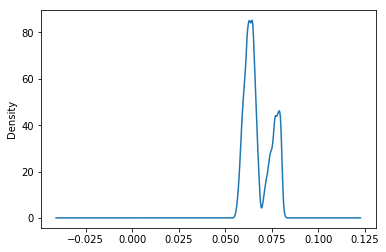

In [55]:
computePDF('SeriousDlqin2yrs',myLoanData)

The majority of the distribution is between 0.050 and 0.08. With two major peaks and a valley between them. The distribution also ranges from under -0.025 to about 0.125.